In [1]:
import scanpy as sc
import scIB

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
import warnings
warnings.filterwarnings('ignore')

scanpy==1.4.5.dev114+gd69832a anndata==0.7.1 umap==0.3.9 numpy==1.17.0 scipy==1.3.0 pandas==0.25.0 scikit-learn==0.22.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
exec(open("../../scIB/tests/test_metrics.py").read())

In [3]:
adata = utils.create_adata_dummy(pca=True, neighbors=True)

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


PCA
computing PCA with n_comps = 50
    finished (0:00:00)
Nearest Neigbours
computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)


In [4]:
adata

AnnData object with n_obs × n_vars = 2730 × 3451 
    obs: 'paul15_clusters', 'celltype', 'batch'
    uns: 'iroot', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'

In [5]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9978259  0.9936757  0.9786413  0.9775189  0.9696475
     0.9608218  0.95708084 0.94955087 0.9380223  0.92706764 0.9199976
     0.913004   0.903892   0.894238  ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


In [6]:
sc.tl.dpt(adata, n_branchings=1, n_dcs=10)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order', cell order (adata.obs) (0:00:00)


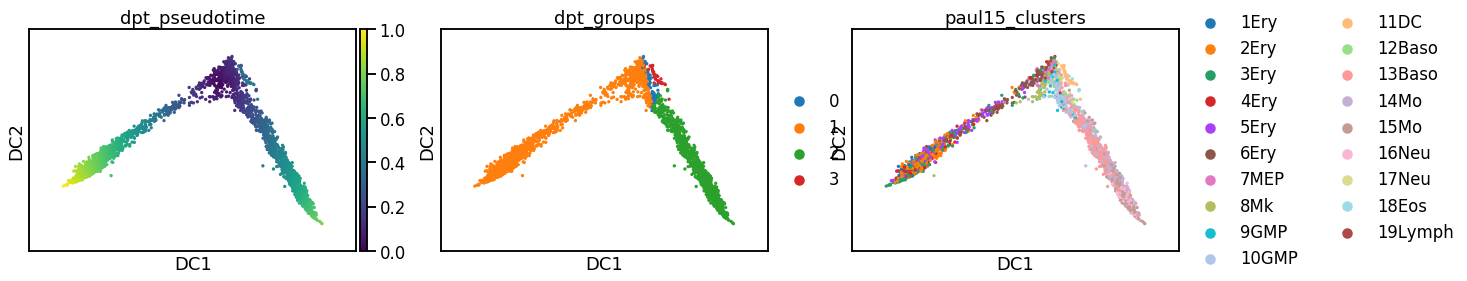

In [7]:
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'dpt_groups', 'paul15_clusters'])

In [8]:
pst = adata.obs["dpt_pseudotime"]

In [9]:
from scipy.stats import spearmanr

In [10]:
spearmanr(pst, pst)

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

## Immune cell Data

In [217]:
pre_file = "/storage/groups/ml01/workspace/group.daniela/immune_cells/Immune_ALL_human.h5ad"
post_file = "/storage/groups/ml01/workspace/group.daniela/immune_cells/output/Immune_ALL_human_scanorama_hvg0.h5ad"
adata_pre = sc.read(pre_file)
adata_post = sc.read(post_file)

Subset datasets

In [223]:
adata_pre.obs.head()

,batch,chemistry,data_type,dpt_pseudotime,final_annotation,mt_frac,n_counts,n_genes,sample_ID,size_factors,species,study,tissue
index,,,,,,,,,,,,,
AAACGGGCACCTCGGA-1-Oetjen_A,Oetjen_A,v2_10X,UMI,0.000000,HSPCs,0.032080,9227.0,2012.0,0,1.062189,Human,Oetjen,Bone_Marrow
AAACGGGCACGGATAG-1-Oetjen_A,Oetjen_A,v2_10X,UMI,0.271925,HSPCs,0.043496,17496.0,3207.0,0,2.257987,Human,Oetjen,Bone_Marrow
AAACGGGGTTTGACTG-1-Oetjen_A,Oetjen_A,v2_10X,UMI,0.708887,Erythrocytes,0.033148,17467.0,3017.0,0,2.000458,Human,Oetjen,Bone_Marrow
AACACGTTCCAAACAC-1-Oetjen_A,Oetjen_A,v2_10X,UMI,0.283791,HSPCs,0.030132,13441.0,2354.0,0,1.452374,Human,Oetjen,Bone_Marrow
AACCGCGTCATCTGTT-1-Oetjen_A,Oetjen_A,v2_10X,UMI,0.763296,Erythrocytes,0.023544,10151.0,1778.0,0,0.828024,Human,Oetjen,Bone_Marrow


In [222]:
adata_post.obs.index.strsplit()

,batch,chemistry,data_type,dpt_pseudotime,final_annotation,mt_frac,n_counts,n_genes,sample_ID,size_factors,species,study,tissue
index,,,,,,,,,,,,,
AAACCTGCAGCGAACA-1-Oetjen_A-0,0,v2_10X,UMI,NaN,CD16+ Monocytes,0.047970,6379.0,1862.0,0,0.957719,Human,Oetjen,Bone_Marrow
AAACCTGCATGTCCTC-1-Oetjen_A-0,0,v2_10X,UMI,NaN,CD4+ T cells,0.024928,4172.0,1082.0,0,0.425532,Human,Oetjen,Bone_Marrow
AAACCTGGTCGACTGC-1-Oetjen_A-0,0,v2_10X,UMI,NaN,CD14+ Monocytes,0.051907,6608.0,1618.0,0,0.773111,Human,Oetjen,Bone_Marrow
AAACCTGGTCGCTTCT-1-Oetjen_A-0,0,v2_10X,UMI,NaN,CD14+ Monocytes,0.041716,5034.0,1413.0,0,0.641188,Human,Oetjen,Bone_Marrow
AAACCTGTCCCGACTT-1-Oetjen_A-0,0,v2_10X,UMI,NaN,NKT cells,0.043522,3998.0,1127.0,0,0.452426,Human,Oetjen,Bone_Marrow


In [220]:
cell_subset = adata_pre.obs.index[adata_pre.obs["dpt_pseudotime"].notnull()]
adata_pre = adata_pre[cell_subset]
adata_post = adata_post[cell_subset]

KeyError: "Values ['AAACGGGCACCTCGGA-1-Oetjen_A', 'AAACGGGCACGGATAG-1-Oetjen_A', 'AAACGGGGTTTGACTG-1-Oetjen_A', 'AACACGTTCCAAACAC-1-Oetjen_A', 'AACCGCGTCATCTGTT-1-Oetjen_A', 'AACGTTGCAATGGATA-1-Oetjen_A', 'AACTCTTTCGACGGAA-1-Oetjen_A', 'AACTGGTTCCTGCAGG-1-Oetjen_A', 'AACTGGTTCGCCTGTT-1-Oetjen_A', 'AACTGGTTCTCACATT-1-Oetjen_A', 'AACTTTCAGACCACGA-1-Oetjen_A', 'AACTTTCGTGCAACTT-1-Oetjen_A', 'AAGCCGCAGGGTTTCT-1-Oetjen_A', 'AAGCCGCTCAGAGGTG-1-Oetjen_A', 'AAGGAGCAGGTGATTA-1-Oetjen_A', 'AAGGTTCAGCCTTGAT-1-Oetjen_A', 'AAGGTTCCAACAACCT-1-Oetjen_A', 'AAGGTTCGTTCCATGA-1-Oetjen_A', 'AAGTCTGTCATCGCTC-1-Oetjen_A', 'AATCCAGCACATGTGT-1-Oetjen_A', 'AATCGGTCAGGTGGAT-1-Oetjen_A', 'AATCGGTTCTTGCCGT-1-Oetjen_A', 'ACACCGGTCAGCTCTC-1-Oetjen_A', 'ACAGCCGCACGTAAGG-1-Oetjen_A', 'ACAGCCGGTCCGCTGA-1-Oetjen_A', 'ACAGCTAGTCTAGTGT-1-Oetjen_A', 'ACATACGCAAGAAGAG-1-Oetjen_A', 'ACATACGCACCAGTTA-1-Oetjen_A', 'ACATCAGAGACACTAA-1-Oetjen_A', 'ACATCAGGTGTTAAGA-1-Oetjen_A', 'ACATGGTAGAGCAATT-1-Oetjen_A', 'ACATGGTCACGGTAAG-1-Oetjen_A', 'ACATGGTGTTCATGGT-1-Oetjen_A', 'ACCAGTAAGCCAGTAG-1-Oetjen_A', 'ACCAGTAGTGCATCTA-1-Oetjen_A', 'ACCCACTGTGATAAAC-1-Oetjen_A', 'ACCGTAAAGGTGTGGT-1-Oetjen_A', 'ACCGTAAGTAGGAGTC-1-Oetjen_A', 'ACCTTTATCGGAAATA-1-Oetjen_A', 'ACGAGCCGTTCGGGCT-1-Oetjen_A', 'ACGAGCCTCTTGAGGT-1-Oetjen_A', 'ACGAGGACATTGGCGC-1-Oetjen_A', 'ACGAGGATCGTAGGAG-1-Oetjen_A', 'ACGATACCATATGAGA-1-Oetjen_A', 'ACGCAGCGTCTTCGTC-1-Oetjen_A', 'ACGCCAGAGCTCAACT-1-Oetjen_A', 'ACGGAGAAGTACGTAA-1-Oetjen_A', 'ACGGCCATCCGTTGCT-1-Oetjen_A', 'ACGGGCTCACGGACAA-1-Oetjen_A', 'ACTGAACTCAGGTAAA-1-Oetjen_A', 'ACTGATGCACTACAGT-1-Oetjen_A', 'ACTTACTAGGGTTCCC-1-Oetjen_A', 'ACTTACTTCGGAGGTA-1-Oetjen_A', 'ACTTGTTGTGAGTATA-1-Oetjen_A', 'ACTTTCACAGGAATGC-1-Oetjen_A', 'ACTTTCATCGTGACAT-1-Oetjen_A', 'AGAATAGTCATCGATG-1-Oetjen_A', 'AGAATAGTCCCGACTT-1-Oetjen_A', 'AGACGTTTCACCGTAA-1-Oetjen_A', 'AGACGTTTCAGCGATT-1-Oetjen_A', 'AGAGCTTTCAAACAAG-1-Oetjen_A', 'AGATCTGCACTTCGAA-1-Oetjen_A', 'AGCAGCCCACATTCGA-1-Oetjen_A', 'AGCAGCCCATTCTTAC-1-Oetjen_A', 'AGCATACCAGGGAGAG-1-Oetjen_A', 'AGCATACGTTAAGTAG-1-Oetjen_A', 'AGCCTAATCATCGATG-1-Oetjen_A', 'AGCGTATCATGCTAGT-1-Oetjen_A', 'AGCGTCGAGCTAACAA-1-Oetjen_A', 'AGCGTCGCAAGACACG-1-Oetjen_A', 'AGCTCTCAGATGCCAG-1-Oetjen_A', 'AGCTCTCCAATAAGCA-1-Oetjen_A', 'AGCTTGAAGCGGATCA-1-Oetjen_A', 'AGCTTGAAGTATCGAA-1-Oetjen_A', 'AGCTTGATCCGTAGTA-1-Oetjen_A', 'AGGCCACGTGATGCCC-1-Oetjen_A', 'AGGCCACTCGCCTGAG-1-Oetjen_A', 'AGGGAGTGTCAGAAGC-1-Oetjen_A', 'AGGGATGGTTTGACTG-1-Oetjen_A', 'AGGGTGACACAGCGTC-1-Oetjen_A', 'AGGTCATAGCTTATCG-1-Oetjen_A', 'AGGTCATCACGTAAGG-1-Oetjen_A', 'AGTCTTTGTAAACACA-1-Oetjen_A', 'AGTCTTTTCTATCCTA-1-Oetjen_A', 'AGTCTTTTCTGCAAGT-1-Oetjen_A', 'AGTGAGGAGACGACGT-1-Oetjen_A', 'AGTGAGGAGCTACCGC-1-Oetjen_A', 'AGTGGGATCATGTAGC-1-Oetjen_A', 'AGTGTCAGTATCTGCA-1-Oetjen_A', 'AGTGTCATCAGCGACC-1-Oetjen_A', 'AGTTGGTCAGACTCGC-1-Oetjen_A', 'AGTTGGTGTAGAAGGA-1-Oetjen_A', 'ATAACGCGTACCGCTG-1-Oetjen_A', 'ATAACGCGTCTAGGTT-1-Oetjen_A', 'ATAACGCTCCGCATCT-1-Oetjen_A', 'ATAAGAGAGAGCCCAA-1-Oetjen_A', 'ATAAGAGGTGATGCCC-1-Oetjen_A', 'ATAGACCGTTCACCTC-1-Oetjen_A', 'ATCCACCAGTATCTCG-1-Oetjen_A', 'ATCCACCCACTTCTGC-1-Oetjen_A', 'ATCCACCTCAATACCG-1-Oetjen_A', 'ATCCACCTCAGAAATG-1-Oetjen_A', 'ATCGAGTAGCAGACTG-1-Oetjen_A', 'ATCTACTCAAGCCTAT-1-Oetjen_A', 'ATCTGCCCACGAGAGT-1-Oetjen_A', 'ATCTGCCGTCTCCACT-1-Oetjen_A', 'ATCTGCCTCCTATGTT-1-Oetjen_A', 'ATGAGGGGTACCAGTT-1-Oetjen_A', 'ATGAGGGTCAACGGGA-1-Oetjen_A', 'ATGAGGGTCTTTACAC-1-Oetjen_A', 'ATGCGATCAGGACCCT-1-Oetjen_A', 'ATGGGAGCAGCTCCGA-1-Oetjen_A', 'ATGTGTGAGCGGCTTC-1-Oetjen_A', 'ATTACTCCAGTTTACG-1-Oetjen_A', 'ATTGGACCACCGCTAG-1-Oetjen_A', 'ATTGGACGTACCATCA-1-Oetjen_A', 'ATTGGACGTCTAGCCG-1-Oetjen_A', 'ATTGGTGAGCGATGAC-1-Oetjen_A', 'ATTTCTGGTTCTGGTA-1-Oetjen_A', 'CAACCTCCATATACCG-1-Oetjen_A', 'CAACCTCGTAGCGTAG-1-Oetjen_A', 'CAACCTCGTATAGGTA-1-Oetjen_A', 'CAACCTCGTTGGACCC-1-Oetjen_A', 'CAACTAGCATCGGAAG-1-Oetjen_A', 'CAACTAGGTCGAAAGC-1-Oetjen_A', 'CAAGAAACAGCCAGAA-1-Oetjen_A', 'CAAGAAAGTAATCGTC-1-Oetjen_A', 'CAAGAAATCGTTACGA-1-Oetjen_A', 'CAAGGCCTCCGCGGTA-1-Oetjen_A', 'CAAGTTGGTGCACGAA-1-Oetjen_A', 'CACAAACCACTTACGA-1-Oetjen_A', 'CACAAACTCTGTTGAG-1-Oetjen_A', 'CACACAATCTGTTGAG-1-Oetjen_A', 'CACACCTCACGAAAGC-1-Oetjen_A', 'CACACTCGTACCGTTA-1-Oetjen_A', 'CACACTCTCACGACTA-1-Oetjen_A', 'CACAGGCCAGGCGATA-1-Oetjen_A', 'CACAGGCGTCACCTAA-1-Oetjen_A', 'CACAGTATCTCGGACG-1-Oetjen_A', 'CACATAGAGCAATCTC-1-Oetjen_A', 'CACCACTCAGGATCGA-1-Oetjen_A', 'CACCTTGAGCCCTAAT-1-Oetjen_A', 'CACTCCAAGTGGGCTA-1-Oetjen_A', 'CACTCCATCATACGGT-1-Oetjen_A', 'CAGAGAGAGAGGTTAT-1-Oetjen_A', 'CAGAGAGAGGAGTTTA-1-Oetjen_A', 'CAGATCAGTGTGACCC-1-Oetjen_A', 'CAGCAGCCACCCAGTG-1-Oetjen_A', 'CAGCATAGTTGTACAC-1-Oetjen_A', 'CAGCCGACATAAAGGT-1-Oetjen_A', 'CAGCCGAGTTTGGGCC-1-Oetjen_A', 'CAGCGACCAAGCCCAC-1-Oetjen_A', 'CAGCGACGTCAGCTAT-1-Oetjen_A', 'CAGCGACGTGCAACGA-1-Oetjen_A', 'CAGCGACTCCGCATCT-1-Oetjen_A', 'CAGCTAAAGCGTGTCC-1-Oetjen_A', 'CAGGTGCAGCTGGAAC-1-Oetjen_A', 'CAGGTGCAGTTACCCA-1-Oetjen_A', 'CAGGTGCGTCTTGATG-1-Oetjen_A', 'CAGGTGCTCAGGCGAA-1-Oetjen_A', 'CAGGTGCTCTATCGCC-1-Oetjen_A', 'CAGTAACTCTGCGGCA-1-Oetjen_A', 'CAGTAACTCTGTCTCG-1-Oetjen_A', 'CAGTCCTGTTCGTCTC-1-Oetjen_A', 'CATATGGGTCTGATTG-1-Oetjen_A', 'CATATGGTCAGAGACG-1-Oetjen_A', 'CATATGGTCAGGATCT-1-Oetjen_A', 'CATATTCAGAAGAAGC-1-Oetjen_A', 'CATATTCTCAGTCCCT-1-Oetjen_A', 'CATCAAGCATATGCTG-1-Oetjen_A', 'CATCAAGTCAGCAACT-1-Oetjen_A', 'CATCCACTCGAGAACG-1-Oetjen_A', 'CATCGAAGTCTAGGTT-1-Oetjen_A', 'CATCGAAGTTCTGGTA-1-Oetjen_A', 'CATGACAAGGTGCTTT-1-Oetjen_A', 'CATTATCAGAGGTTGC-1-Oetjen_A', 'CATTATCGTCCCTTGT-1-Oetjen_A', 'CATTCGCGTGCATCTA-1-Oetjen_A', 'CATTCGCTCCGAACGC-1-Oetjen_A', 'CCAATCCCAAAGCAAT-1-Oetjen_A', 'CCACGGACATGGATGG-1-Oetjen_A', 'CCACGGAGTCAAAGAT-1-Oetjen_A', 'CCAGCGACAAGTCTAC-1-Oetjen_A', 'CCAGCGACAGACAAAT-1-Oetjen_A', 'CCATGTCTCTATCCTA-1-Oetjen_A', 'CCCAATCCACATCCGG-1-Oetjen_A', 'CCCAATCGTAACGTTC-1-Oetjen_A', 'CCCAATCGTCTGGTCG-1-Oetjen_A', 'CCCAGTTTCTATCGCC-1-Oetjen_A', 'CCCATACCACAGGAGT-1-Oetjen_A', 'CCCATACTCTTCGAGA-1-Oetjen_A', 'CCGGGATAGATATACG-1-Oetjen_A', 'CCGGTAGCACATGACT-1-Oetjen_A', 'CCGTACTCATGGATGG-1-Oetjen_A', 'CCGTTCACACGGTGTC-1-Oetjen_A', 'CCGTTCACATTGAGCT-1-Oetjen_A', 'CCGTTCAGTACTCTCC-1-Oetjen_A', 'CCTACACCACACTGCG-1-Oetjen_A', 'CCTACACGTGCACCAC-1-Oetjen_A', 'CCTACACTCTTGTCAT-1-Oetjen_A', 'CCTACCACACAGCCCA-1-Oetjen_A', 'CCTAGCTGTACCATCA-1-Oetjen_A', 'CCTAGCTGTTACTGAC-1-Oetjen_A', 'CCTCTGATCCAATGGT-1-Oetjen_A', 'CCTCTGATCGACAGCC-1-Oetjen_A', 'CCTCTGATCGTCTGCT-1-Oetjen_A', 'CCTTACGGTTCGTCTC-1-Oetjen_A', 'CCTTACGGTTGTGGCC-1-Oetjen_A', 'CCTTCCCAGAATTCCC-1-Oetjen_A', 'CCTTCCCCACCAGTTA-1-Oetjen_A', 'CCTTCGAGTCTTGATG-1-Oetjen_A', 'CCTTTCTAGCGCCTTG-1-Oetjen_A', 'CGAATGTCAGGTGCCT-1-Oetjen_A', 'CGACCTTCAATAGCGG-1-Oetjen_A', 'CGACCTTCATGGTTGT-1-Oetjen_A', 'CGACCTTGTCATTAGC-1-Oetjen_A', 'CGACTTCCAGCGAACA-1-Oetjen_A', 'CGACTTCCATTGAGCT-1-Oetjen_A', 'CGAGAAGTCGATAGAA-1-Oetjen_A', 'CGAGCACAGACACGAC-1-Oetjen_A', 'CGAGCACGTGTCTGAT-1-Oetjen_A', 'CGAGCACTCGTTTGCC-1-Oetjen_A', 'CGAGCCACATGGGACA-1-Oetjen_A', 'CGATGGCGTCTCCACT-1-Oetjen_A', 'CGATGGCTCAACACTG-1-Oetjen_A', 'CGATGGCTCCGCGCAA-1-Oetjen_A', 'CGATGTACAGACGTAG-1-Oetjen_A', 'CGATGTACATCGGTTA-1-Oetjen_A', 'CGATGTATCCATGAGT-1-Oetjen_A', 'CGATTGACACCGGAAA-1-Oetjen_A', 'CGATTGATCAGCGACC-1-Oetjen_A', 'CGCCAAGCAGGTCCAC-1-Oetjen_A', 'CGCGGTAAGCTCCTCT-1-Oetjen_A', 'CGCGGTACATCCCATC-1-Oetjen_A', 'CGCTATCAGGTGTTAA-1-Oetjen_A', 'CGCTGGAGTCAAAGCG-1-Oetjen_A', 'CGCTGGATCCATGCTC-1-Oetjen_A', 'CGCTTCATCAGGCGAA-1-Oetjen_A', 'CGGACACTCAGTTGAC-1-Oetjen_A', 'CGGACGTAGAAGGTTT-1-Oetjen_A', 'CGGACGTCATCCCATC-1-Oetjen_A', 'CGGACGTGTGGCAAAC-1-Oetjen_A', 'CGGACTGAGAAACGAG-1-Oetjen_A', 'CGGACTGCACTAAGTC-1-Oetjen_A', 'CGGAGCTCAGGGAGAG-1-Oetjen_A', 'CGGAGTCCAGCCTTTC-1-Oetjen_A', 'CGGAGTCGTTATCCGA-1-Oetjen_A', 'CGGAGTCGTTCAACCA-1-Oetjen_A', 'CGGAGTCTCACGAAGG-1-Oetjen_A', 'CGGGTCATCAGCTTAG-1-Oetjen_A', 'CGGGTCATCGGCGCTA-1-Oetjen_A', 'CGGTTAAAGAGCTTCT-1-Oetjen_A', 'CGGTTAACATGTTGAC-1-Oetjen_A', 'CGGTTAATCAAGAAGT-1-Oetjen_A', 'CGTAGCGCACTCGACG-1-Oetjen_A', 'CGTAGCGGTCGCTTTC-1-Oetjen_A', 'CGTAGCGGTTCATGGT-1-Oetjen_A', 'CGTAGCGTCTCGTTTA-1-Oetjen_A', 'CGTAGGCAGCACACAG-1-Oetjen_A', 'CGTAGGCAGGTACTCT-1-Oetjen_A', 'CGTAGGCCAGTAACGG-1-Oetjen_A', 'CGTCACTCAATCAGAA-1-Oetjen_A', 'CGTCACTCAGAGTGTG-1-Oetjen_A', 'CGTCACTGTATTAGCC-1-Oetjen_A', 'CGTCAGGCAATCAGAA-1-Oetjen_A', 'CGTCAGGTCGTTGCCT-1-Oetjen_A', 'CGTCCATCAATGGAAT-1-Oetjen_A', 'CGTCCATCAGGTCTCG-1-Oetjen_A', 'CGTGAGCCAGTATAAG-1-Oetjen_A', 'CGTGTAATCTGATTCT-1-Oetjen_A', 'CGTTCTGAGACTACAA-1-Oetjen_A', 'CGTTCTGAGGGCTTCC-1-Oetjen_A', 'CGTTCTGCATTTCACT-1-Oetjen_A', 'CGTTCTGTCCGTAGGC-1-Oetjen_A', 'CGTTGGGAGGCGTACA-1-Oetjen_A', 'CGTTGGGCACCTCGTT-1-Oetjen_A', 'CTAAGACCAGCTCGCA-1-Oetjen_A', 'CTAAGACGTCGATTGT-1-Oetjen_A', 'CTAATGGTCAGGCGAA-1-Oetjen_A', 'CTACACCAGTCTTGCA-1-Oetjen_A', 'CTACACCAGTGGCACA-1-Oetjen_A', 'CTACACCGTTCCAACA-1-Oetjen_A', 'CTACATTGTTCGAATC-1-Oetjen_A', 'CTACATTTCGTGGGAA-1-Oetjen_A', 'CTACCCAAGTGGACGT-1-Oetjen_A', 'CTAGTGAGTCTAACGT-1-Oetjen_A', 'CTCACACCATGCAATC-1-Oetjen_A', 'CTCACACGTGCCTTGG-1-Oetjen_A', 'CTCAGAAAGAAGGTTT-1-Oetjen_A', 'CTCATTACACGACGAA-1-Oetjen_A', 'CTCGAAAAGGATGGTC-1-Oetjen_A', 'CTCGAAAAGTGTACCT-1-Oetjen_A', 'CTCGGAGCACACCGAC-1-Oetjen_A', 'CTCGGGACAAAGTCAA-1-Oetjen_A', 'CTCGGGACACTGCCAG-1-Oetjen_A', 'CTCGTACCATGAAGTA-1-Oetjen_A', 'CTCGTACTCTAACTTC-1-Oetjen_A', 'CTCGTCAGTACAGACG-1-Oetjen_A', 'CTCGTCATCCTCATTA-1-Oetjen_A', 'CTCGTCATCTCCAGGG-1-Oetjen_A', 'CTCTAATCAGACAGGT-1-Oetjen_A', 'CTCTACGTCATTCACT-1-Oetjen_A', 'CTCTACGTCCGAACGC-1-Oetjen_A', 'CTGATAGAGTGGTAAT-1-Oetjen_A', 'CTGATAGCAATAGAGT-1-Oetjen_A', 'CTGATAGCACTGTCGG-1-Oetjen_A', 'CTGCCTAAGCTGGAAC-1-Oetjen_A', 'CTGCCTACACGGCCAT-1-Oetjen_A', 'CTGCGGACAGTATGCT-1-Oetjen_A', 'CTGCTGTGTTCAACCA-1-Oetjen_A', 'CTGCTGTTCCACGTGG-1-Oetjen_A', 'CTGGTCTGTCAGTGGA-1-Oetjen_A', 'CTGTTTAGTCTCCATC-1-Oetjen_A', 'CTTAACTAGCCTCGTG-1-Oetjen_A', 'CTTACCGTCAGCGATT-1-Oetjen_A', 'CTTAGGAAGCCCTAAT-1-Oetjen_A', 'CTTAGGATCGGTGTCG-1-Oetjen_A', 'CTTGGCTGTACCGTAT-1-Oetjen_A', 'CTTGGCTGTGGTACAG-1-Oetjen_A', 'CTTGGCTGTTGTTTGG-1-Oetjen_A', 'GAAACTCGTGACTCAT-1-Oetjen_A', 'GAACATCCACTGTGTA-1-Oetjen_A', 'GAACCTATCGACAGCC-1-Oetjen_A', 'GAAGCAGGTCAAAGAT-1-Oetjen_A', 'GAATAAGTCTCTAAGG-1-Oetjen_A', 'GAATGAATCTCCAACC-1-Oetjen_A', 'GACACGCAGGAGCGTT-1-Oetjen_A', 'GACACGCAGTATGACA-1-Oetjen_A', 'GACAGAGAGTGCCATT-1-Oetjen_A', 'GACAGAGCAAACAACA-1-Oetjen_A', 'GACAGAGCAGGCTGAA-1-Oetjen_A', 'GACCAATCACTTCTGC-1-Oetjen_A', 'GACCTGGGTTCCGTCT-1-Oetjen_A', 'GACCTGGTCATGGTCA-1-Oetjen_A', 'GACGCGTCATGTAAGA-1-Oetjen_A', 'GACGCGTTCACTTACT-1-Oetjen_A', 'GACGGCTGTTTGTGTG-1-Oetjen_A', 'GACGTGCAGTACGTAA-1-Oetjen_A', 'GACGTTACATCGGACC-1-Oetjen_A', 'GACTAACAGATGTGTA-1-Oetjen_A', 'GACTACAGTAAGTGTA-1-Oetjen_A', 'GACTGCGTCTTCCTTC-1-Oetjen_A', 'GAGCAGAGTCGCTTCT-1-Oetjen_A', 'GAGTCCGGTCTAACGT-1-Oetjen_A', 'GATCAGTAGAACAACT-1-Oetjen_A', 'GATCAGTTCGCAAGCC-1-Oetjen_A', 'GATCGATGTTAAAGTG-1-Oetjen_A', 'GATCGCGAGTTAGCGG-1-Oetjen_A', 'GATGCTAAGAGTACCG-1-Oetjen_A', 'GCAAACTAGACACTAA-1-Oetjen_A', 'GCACTCTAGCTATGCT-1-Oetjen_A', 'GCACTCTCACGAGGTA-1-Oetjen_A', 'GCACTCTGTAAATGAC-1-Oetjen_A', 'GCAGTTACACCAGGTC-1-Oetjen_A', 'GCATACAGTTCGTCTC-1-Oetjen_A', 'GCATGATCATACAGCT-1-Oetjen_A', 'GCATGCGTCCTCAATT-1-Oetjen_A', 'GCATGCGTCCTTCAAT-1-Oetjen_A', 'GCATGTACACTTGGAT-1-Oetjen_A', 'GCATGTAGTTCACGGC-1-Oetjen_A', 'GCATGTATCCTATGTT-1-Oetjen_A', 'GCCAAATTCGCCTGAG-1-Oetjen_A', 'GCCTCTAAGAAACCGC-1-Oetjen_A', 'GCCTCTAAGATAGCAT-1-Oetjen_A', 'GCCTCTACAGCGTAAG-1-Oetjen_A', 'GCGAGAATCGCTTGTC-1-Oetjen_A', 'GCGCAACCACCGAAAG-1-Oetjen_A', 'GCGCAACGTCTAAAGA-1-Oetjen_A', 'GCGCAGTGTACCGGCT-1-Oetjen_A', 'GCGCCAAAGCTACCGC-1-Oetjen_A', 'GCGCCAAGTAGCGTAG-1-Oetjen_A', 'GCGGGTTAGAGTGACC-1-Oetjen_A', 'GCTCCTAGTCCATCCT-1-Oetjen_A', 'GCTCTGTAGTGGGCTA-1-Oetjen_A', 'GCTGCAGAGACGCACA-1-Oetjen_A', 'GCTGCAGCATTGGTAC-1-Oetjen_A', 'GCTGCAGTCAGCAACT-1-Oetjen_A', 'GCTGGGTGTTCCACTC-1-Oetjen_A', 'GCTTGAACATGCCACG-1-Oetjen_A', 'GGAACTTAGCTCTCGG-1-Oetjen_A', 'GGAACTTAGTTAAGTG-1-Oetjen_A', 'GGAATAATCCACTGGG-1-Oetjen_A', 'GGACAAGAGATCTGAA-1-Oetjen_A', 'GGACAGATCGATCCCT-1-Oetjen_A', 'GGACATTTCATTCACT-1-Oetjen_A', 'GGACATTTCTCCGGTT-1-Oetjen_A', 'GGAGCAAAGAATCTCC-1-Oetjen_A', 'GGATGTTCATACTACG-1-Oetjen_A', 'GGATTACAGTGTGGCA-1-Oetjen_A', 'GGATTACTCAAACCGT-1-Oetjen_A', 'GGATTACTCTGGGCCA-1-Oetjen_A', 'GGCAATTCACTTCGAA-1-Oetjen_A', 'GGCCGATAGTGCTGCC-1-Oetjen_A', 'GGCGACTAGTGTTTGC-1-Oetjen_A', 'GGCTCGAAGATCACGG-1-Oetjen_A', 'GGCTGGTCAGGTGCCT-1-Oetjen_A', 'GGCTGGTTCATCTGCC-1-Oetjen_A', 'GGCTGGTTCCGTTGCT-1-Oetjen_A', 'GGGAATGTCGTTTAGG-1-Oetjen_A', 'GGGACCTAGAAGAAGC-1-Oetjen_A', 'GGGACCTCAATAACGA-1-Oetjen_A', 'GGGAGATAGTGCCATT-1-Oetjen_A', 'GGGATGACATCGTCGG-1-Oetjen_A', 'GGGCACTAGGGCATGT-1-Oetjen_A', 'GGGCACTCAGCGTTCG-1-Oetjen_A', 'GGGTTGCAGACCTTTG-1-Oetjen_A', 'GGGTTGCAGTGCTGCC-1-Oetjen_A', 'GGTGAAGGTGGCGAAT-1-Oetjen_A', 'GGTGCGTAGCAATATG-1-Oetjen_A', 'GGTGCGTGTCTTGCGG-1-Oetjen_A', 'GGTGCGTTCTCCAACC-1-Oetjen_A', 'GTAACGTAGGGTGTGT-1-Oetjen_A', 'GTAACGTGTGCATCTA-1-Oetjen_A', 'GTAACGTGTTCGCTAA-1-Oetjen_A', 'GTAACTGAGCAGACTG-1-Oetjen_A', 'GTAACTGAGTAATCCC-1-Oetjen_A', 'GTAACTGTCCCTTGCA-1-Oetjen_A', 'GTAACTGTCTTTACAC-1-Oetjen_A', 'GTACGTACAATAACGA-1-Oetjen_A', 'GTACTCCAGGCTCAGA-1-Oetjen_A', 'GTACTCCTCTGATTCT-1-Oetjen_A', 'GTAGGCCAGATGTCGG-1-Oetjen_A', 'GTATCTTCATGCCCGA-1-Oetjen_A', 'GTATTCTCAGGGCATA-1-Oetjen_A', 'GTCAAGTAGGTCATCT-1-Oetjen_A', 'GTCACAACAGCGTAAG-1-Oetjen_A', 'GTCACGGTCTTCGGTC-1-Oetjen_A', 'GTCGGGTAGGAGCGTT-1-Oetjen_A', 'GTCGTAATCTATCCCG-1-Oetjen_A', 'GTCTCGTAGTTTGCGT-1-Oetjen_A', 'GTGCAGCCATACCATG-1-Oetjen_A', 'GTGCAGCCATTTCAGG-1-Oetjen_A', 'GTGCAGCGTACCGAGA-1-Oetjen_A', 'GTGCATATCCTATGTT-1-Oetjen_A', 'GTGCGGTCACGCATCG-1-Oetjen_A', 'GTGCTTCAGCGATATA-1-Oetjen_A', 'GTGCTTCTCATCGCTC-1-Oetjen_A', 'GTGGGTCCATTCCTGC-1-Oetjen_A', 'GTGTGCGAGATATACG-1-Oetjen_A', 'GTGTGCGCAAGCGCTC-1-Oetjen_A', 'GTGTGCGTCAGGATCT-1-Oetjen_A', 'GTGTTAGTCGTGGTCG-1-Oetjen_A', 'GTTAAGCAGAGTAATC-1-Oetjen_A', 'GTTAAGCAGTCTCAAC-1-Oetjen_A', 'GTTACAGCAAAGCAAT-1-Oetjen_A', 'GTTACAGCACATCCAA-1-Oetjen_A', 'GTTACAGCATTCCTCG-1-Oetjen_A', 'GTTCGGGCATTCACTT-1-Oetjen_A', 'GTTCGGGTCACAGTAC-1-Oetjen_A', 'GTTCGGGTCTCGGACG-1-Oetjen_A', 'GTTCTCGAGATGTCGG-1-Oetjen_A', 'GTTCTCGAGGCTCTTA-1-Oetjen_A', 'GTTCTCGCAGCGATCC-1-Oetjen_A', 'GTTTCTACATGACATC-1-Oetjen_A', 'GTTTCTAGTTATGCGT-1-Oetjen_A', 'GTTTCTAGTTCAGTAC-1-Oetjen_A', 'GTTTCTATCGAATCCA-1-Oetjen_A', 'TAAACCGCATTTGCTT-1-Oetjen_A', 'TAAGAGACATCGGACC-1-Oetjen_A', 'TAAGAGATCTTGTATC-1-Oetjen_A', 'TAAGTGCCACGAGGTA-1-Oetjen_A', 'TAAGTGCCAGAAGCAC-1-Oetjen_A', 'TACACGAGTCCGAGTC-1-Oetjen_A', 'TACACGATCCGATATG-1-Oetjen_A', 'TACAGTGAGCTCAACT-1-Oetjen_A', 'TACAGTGGTACAGACG-1-Oetjen_A', 'TACCTATGTTCCCGAG-1-Oetjen_A', 'TACGGGCAGAAACCTA-1-Oetjen_A', 'TACGGGCCAGATGGCA-1-Oetjen_A', 'TACGGGCCATCCCACT-1-Oetjen_A', 'TACGGGCCATCTCGCT-1-Oetjen_A', 'TACGGGCTCACTCTTA-1-Oetjen_A', 'TACGGTATCTTACCTA-1-Oetjen_A', 'TACTCATAGCCCGAAA-1-Oetjen_A', 'TACTTACAGCTTCGCG-1-Oetjen_A', 'TACTTACCAAGTCTGT-1-Oetjen_A', 'TACTTGTTCGACCAGC-1-Oetjen_A', 'TAGAGCTAGTGGTAAT-1-Oetjen_A', 'TAGGCATAGTGGTAGC-1-Oetjen_A', 'TAGTGGTGTTACCAGT-1-Oetjen_A', 'TAGTGGTTCGTCGTTC-1-Oetjen_A', 'TATCAGGAGTTTGCGT-1-Oetjen_A', 'TATCAGGGTACTTAGC-1-Oetjen_A', 'TATCAGGGTGATGTCT-1-Oetjen_A', 'TATCTCAAGCCTCGTG-1-Oetjen_A', 'TATCTCACAGGTCGTC-1-Oetjen_A', 'TATGCCCCAGACAAGC-1-Oetjen_A', 'TATGCCCGTTAAGGGC-1-Oetjen_A', 'TATTACCAGATACACA-1-Oetjen_A', 'TCAACGAAGACCCACC-1-Oetjen_A', 'TCAATCTGTGTTGGGA-1-Oetjen_A', 'TCAATCTTCTGCGTAA-1-Oetjen_A', 'TCACAAGAGCTATGCT-1-Oetjen_A', 'TCACAAGCATGGTAGG-1-Oetjen_A', 'TCACAAGGTCCAGTTA-1-Oetjen_A', 'TCACGAACAAAGAATC-1-Oetjen_A', 'TCACGAATCGCCAAAT-1-Oetjen_A', 'TCAGATGAGTGGCACA-1-Oetjen_A', 'TCAGATGAGTTGTAGA-1-Oetjen_A', 'TCAGCAAGTCCTGCTT-1-Oetjen_A', 'TCAGCAAGTCTCCCTA-1-Oetjen_A', 'TCAGCAAGTTCCCTTG-1-Oetjen_A', 'TCAGCAATCCAGGGCT-1-Oetjen_A', 'TCAGCTCTCTGCTGTC-1-Oetjen_A', 'TCAGGTACAGTCGTGC-1-Oetjen_A', 'TCATTACCACAAGCCC-1-Oetjen_A', 'TCATTACTCGGTCTAA-1-Oetjen_A', 'TCATTTGGTGCCTGGT-1-Oetjen_A', 'TCCCGATCACATGGGA-1-Oetjen_A', 'TCCCGATCACTCGACG-1-Oetjen_A', 'TCCCGATGTTGATTGC-1-Oetjen_A', 'TCGCGAGAGGCTATCT-1-Oetjen_A', 'TCGCGAGAGTAGATGT-1-Oetjen_A', 'TCGCGAGAGTTTCCTT-1-Oetjen_A', 'TCGCGAGGTAAAGTCA-1-Oetjen_A', 'TCGCGTTTCAGAAATG-1-Oetjen_A', 'TCGGGACCATCTCGCT-1-Oetjen_A', 'TCGGGACTCTCCCTGA-1-Oetjen_A', 'TCTATTGGTATGCTTG-1-Oetjen_A', 'TCTATTGGTGTTAAGA-1-Oetjen_A', 'TCTATTGTCTACCAGA-1-Oetjen_A', 'TCTCATAAGTTTAGGA-1-Oetjen_A', 'TCTCATACAGCCAATT-1-Oetjen_A', 'TCTCTAAGTAAGAGAG-1-Oetjen_A', 'TCTCTAATCTGACCTC-1-Oetjen_A', 'TCTGGAAGTCATATGC-1-Oetjen_A', 'TCTTCGGCACATTCGA-1-Oetjen_A', 'TCTTTCCTCCGCATAA-1-Oetjen_A', 'TGAAAGAGTGAAGGCT-1-Oetjen_A', 'TGACAACGTATAGGTA-1-Oetjen_A', 'TGACAACGTCTAGCCG-1-Oetjen_A', 'TGACTAGCACCCATGG-1-Oetjen_A', 'TGACTAGTCTGCCAGG-1-Oetjen_A', 'TGACTTTCAGCTGGCT-1-Oetjen_A', 'TGAGCATAGATCTGCT-1-Oetjen_A', 'TGAGCATGTCACAAGG-1-Oetjen_A', 'TGAGCATGTCCTCTTG-1-Oetjen_A', 'TGAGCCGCACTGTTAG-1-Oetjen_A', 'TGAGGGACACTGTTAG-1-Oetjen_A', 'TGCACCTTCTATCGCC-1-Oetjen_A', 'TGCCAAATCTCAACTT-1-Oetjen_A', 'TGCCAAATCTTGTCAT-1-Oetjen_A', 'TGCCCATAGTCAATAG-1-Oetjen_A', 'TGCCCATCATTGCGGC-1-Oetjen_A', 'TGCCCATGTTTGGGCC-1-Oetjen_A', 'TGCCCTACAATGAAAC-1-Oetjen_A', 'TGCCCTACACAACGCC-1-Oetjen_A', 'TGCCCTACATGGTCTA-1-Oetjen_A', 'TGCTGCTCACCCTATC-1-Oetjen_A', 'TGGACGCAGTATCTCG-1-Oetjen_A', 'TGGACGCGTCGTTGTA-1-Oetjen_A', 'TGGCCAGAGGTGCTAG-1-Oetjen_A', 'TGGCGCAAGCGGCTTC-1-Oetjen_A', 'TGGCGCACATGCATGT-1-Oetjen_A', 'TGGCGCATCAGCATGT-1-Oetjen_A', 'TGGCTGGGTTCAGACT-1-Oetjen_A', 'TGGGCGTCAATGGTCT-1-Oetjen_A', 'TGGTTAGTCGTAGGAG-1-Oetjen_A', 'TGGTTCCAGTGACATA-1-Oetjen_A', 'TGGTTCCGTACAAGTA-1-Oetjen_A', 'TGTATTCGTGAGGGTT-1-Oetjen_A', 'TGTGGTATCCACTGGG-1-Oetjen_A', 'TGTGTTTGTGTTGAGG-1-Oetjen_A', 'TGTTCCGCAGTAGAGC-1-Oetjen_A', 'TTAACTCCATTGGGCC-1-Oetjen_A', 'TTAACTCGTGTAACGG-1-Oetjen_A', 'TTAGGACTCAGCGATT-1-Oetjen_A', 'TTAGGCAGTACGACCC-1-Oetjen_A', 'TTAGGCAGTGGTGTAG-1-Oetjen_A', 'TTAGGCATCCTTTCTC-1-Oetjen_A', 'TTAGTTCGTATAGGGC-1-Oetjen_A', 'TTAGTTCTCCGAAGAG-1-Oetjen_A', 'TTCGAAGCACGACGAA-1-Oetjen_A', 'TTCGAAGTCACTATTC-1-Oetjen_A', 'TTCGGTCGTGAGGCTA-1-Oetjen_A', 'TTCGGTCTCGGAGGTA-1-Oetjen_A', 'TTCTACACAAACGCGA-1-Oetjen_A', 'TTCTCAACAGTAAGCG-1-Oetjen_A', 'TTCTCAACATCGGTTA-1-Oetjen_A', 'TTCTCAAGTTCCCTTG-1-Oetjen_A', 'TTCTCAATCAACGCTA-1-Oetjen_A', 'TTCTTAGTCCCAAGAT-1-Oetjen_A', 'TTGACTTTCCTGCAGG-1-Oetjen_A', 'TTGCCGTAGACATAAC-1-Oetjen_A', 'TTGCCGTGTTGTACAC-1-Oetjen_A', 'TTGCCGTTCTAACGGT-1-Oetjen_A', 'TTGCGTCGTCTGCGGT-1-Oetjen_A', 'TTGCGTCTCGACAGCC-1-Oetjen_A', 'TTGGCAAAGAAAGTGG-1-Oetjen_A', 'TTGGCAAAGTCGTACT-1-Oetjen_A', 'TTGGCAACAGCTCCGA-1-Oetjen_A', 'TTGGCAATCCCTTGCA-1-Oetjen_A', 'TTTACTGCACGGCTAC-1-Oetjen_A', 'TTTATGCGTGTGCGTC-1-Oetjen_A', 'TTTCCTCAGGCAGGTT-1-Oetjen_A', 'TTTCCTCGTAGCACGA-1-Oetjen_A', 'TTTCCTCTCATACGGT-1-Oetjen_A', 'AAACGGGAGCTCCTCT-1-Oetjen_P', 'AAACGGGCAGACAAAT-1-Oetjen_P', 'AAACGGGGTATATGGA-1-Oetjen_P', 'AAAGATGAGCTAGTTC-1-Oetjen_P', 'AAAGATGCAGTATAAG-1-Oetjen_P', 'AAAGATGGTGTGGCTC-1-Oetjen_P', 'AAAGATGTCTTGTTTG-1-Oetjen_P', 'AAAGCAAAGGAACTGC-1-Oetjen_P', 'AAAGCAACAGTCTTCC-1-Oetjen_P', 'AAAGCAAGTACTCAAC-1-Oetjen_P', 'AAAGCAAGTCAAACTC-1-Oetjen_P', 'AAAGTAGCATGGTTGT-1-Oetjen_P', 'AAAGTAGGTAAACGCG-1-Oetjen_P', 'AAAGTAGGTTTGTGTG-1-Oetjen_P', 'AAAGTAGTCTCTTATG-1-Oetjen_P', 'AAATGCCAGGGTCGAT-1-Oetjen_P', 'AAATGCCCAAACAACA-1-Oetjen_P', 'AAATGCCCACATTTCT-1-Oetjen_P', 'AAATGCCCAGATCCAT-1-Oetjen_P', 'AAATGCCTCTTGCAAG-1-Oetjen_P', 'AACACGTAGCCCAACC-1-Oetjen_P', 'AACACGTAGTCAAGGC-1-Oetjen_P', 'AACACGTCATGAAGTA-1-Oetjen_P', 'AACACGTTCAGTGTTG-1-Oetjen_P', 'AACCATGAGCGTTCCG-1-Oetjen_P', 'AACCATGCACCAGTTA-1-Oetjen_P', 'AACCATGGTGTTGGGA-1-Oetjen_P', 'AACCATGGTTATGCGT-1-Oetjen_P', 'AACCGCGCACATGGGA-1-Oetjen_P', 'AACGTTGAGTCAATAG-1-Oetjen_P', 'AACGTTGTCCAAACTG-1-Oetjen_P', 'AACGTTGTCCTGCTTG-1-Oetjen_P', 'AACTCAGCAAGGCTCC-1-Oetjen_P', 'AACTCAGCAGGTCTCG-1-Oetjen_P', 'AACTCCCAGGTCATCT-1-Oetjen_P', 'AACTCCCAGGTTACCT-1-Oetjen_P', 'AACTCCCCACGTCTCT-1-Oetjen_P', 'AACTCCCTCAGCTGGC-1-Oetjen_P', 'AACTCCCTCATGCTCC-1-Oetjen_P', 'AACTCCCTCATTTGGG-1-Oetjen_P', 'AACTCTTAGTGATCGG-1-Oetjen_P', 'AACTCTTCAAAGCAAT-1-Oetjen_P', 'AACTCTTTCACAATGC-1-Oetjen_P', 'AACTCTTTCACGCATA-1-Oetjen_P', 'AACTCTTTCAGGTAAA-1-Oetjen_P', 'AACTCTTTCGCCATAA-1-Oetjen_P', 'AACTGGTAGTGTACTC-1-Oetjen_P', 'AACTTTCCAAGGACAC-1-Oetjen_P', 'AACTTTCCATTCACTT-1-Oetjen_P', 'AACTTTCCATTCGACA-1-Oetjen_P', 'AACTTTCTCCCTCAGT-1-Oetjen_P', 'AAGACCTTCCTTCAAT-1-Oetjen_P', 'AAGACCTTCTTTACGT-1-Oetjen_P', 'AAGCCGCCAACGATCT-1-Oetjen_P', 'AAGCCGCCATCCCATC-1-Oetjen_P', 'AAGCCGCTCCTTTCTC-1-Oetjen_P', 'AAGGAGCAGTAGCCGA-1-Oetjen_P', 'AAGGAGCCAGATAATG-1-Oetjen_P', 'AAGGAGCCAGGGCATA-1-Oetjen_P', 'AAGGAGCGTATGAATG-1-Oetjen_P', 'AAGGCAGCAATGGACG-1-Oetjen_P', 'AAGGCAGGTAGGCTGA-1-Oetjen_P', 'AAGTCTGAGCACACAG-1-Oetjen_P', 'AAGTCTGAGCCTATGT-1-Oetjen_P', 'AAGTCTGAGGGAGTAA-1-Oetjen_P', 'AAGTCTGCAGGAATGC-1-Oetjen_P', 'AAGTCTGCATGGTCTA-1-Oetjen_P', 'AAGTCTGGTACCTACA-1-Oetjen_P', 'AAGTCTGTCCAATGGT-1-Oetjen_P', 'AATCCAGAGACAATAC-1-Oetjen_P', 'AATCCAGAGCTACCGC-1-Oetjen_P', 'AATCCAGAGGTGACCA-1-Oetjen_P', 'AATCCAGTCATCGCTC-1-Oetjen_P', 'AATCGGTCACCAACCG-1-Oetjen_P', 'AATCGGTGTCTAGAGG-1-Oetjen_P', 'AATCGGTTCAAAGTAG-1-Oetjen_P', 'AATCGGTTCACTATTC-1-Oetjen_P', 'AATCGGTTCAGCTCTC-1-Oetjen_P', 'AATCGGTTCAGTTAGC-1-Oetjen_P', 'ACACCAAAGTACATGA-1-Oetjen_P', 'ACACCAAAGTTGAGAT-1-Oetjen_P', 'ACACCAAGTTCGGCAC-1-Oetjen_P', 'ACACCCTGTGTAACGG-1-Oetjen_P', 'ACACCCTTCTCACATT-1-Oetjen_P', 'ACACCGGTCAAACCGT-1-Oetjen_P', 'ACACCGGTCGGACAAG-1-Oetjen_P', 'ACACTGAAGGTGGGTT-1-Oetjen_P', 'ACACTGAAGTGACTCT-1-Oetjen_P', 'ACACTGACATGGTCTA-1-Oetjen_P', 'ACACTGAGTAATAGCA-1-Oetjen_P', 'ACACTGAGTACAAGTA-1-Oetjen_P', 'ACACTGATCCTTAATC-1-Oetjen_P', 'ACAGCCGAGATCTGCT-1-Oetjen_P', 'ACAGCCGAGCGTTTAC-1-Oetjen_P', 'ACAGCCGCAAGAGTCG-1-Oetjen_P', 'ACAGCCGGTCTCTCTG-1-Oetjen_P', 'ACAGCCGTCAGAAATG-1-Oetjen_P', 'ACAGCTAAGGCATTGG-1-Oetjen_P', 'ACAGCTAGTAGGACAC-1-Oetjen_P', 'ACAGCTAGTGCCTGTG-1-Oetjen_P', 'ACATACGAGTCATGCT-1-Oetjen_P', 'ACATACGGTAGGCATG-1-Oetjen_P', 'ACATACGGTCTCGTTC-1-Oetjen_P', 'ACATACGTCCCACTTG-1-Oetjen_P', 'ACATCAGCACAGACAG-1-Oetjen_P', 'ACATCAGCATCTCCCA-1-Oetjen_P', 'ACATCAGCATGCATGT-1-Oetjen_P', 'ACATGGTGTGGCAAAC-1-Oetjen_P', 'ACATGGTGTTGTCTTT-1-Oetjen_P', 'ACCAGTACATACGCCG-1-Oetjen_P', 'ACCAGTACATGACGGA-1-Oetjen_P', 'ACCAGTATCTCGTTTA-1-Oetjen_P', 'ACCCACTAGGCCCGTT-1-Oetjen_P', 'ACCCACTGTGCGAAAC-1-Oetjen_P', 'ACCCACTTCACCAGGC-1-Oetjen_P', 'ACCCACTTCCTCAATT-1-Oetjen_P', 'ACCTTTACAGATTGCT-1-Oetjen_P', 'ACGAGCCCAAAGTGCG-1-Oetjen_P', 'ACGAGCCCATAGTAAG-1-Oetjen_P', 'ACGAGCCCATGACATC-1-Oetjen_P', 'ACGAGCCTCGCAGGCT-1-Oetjen_P', 'ACGAGCCTCGTCCAGG-1-Oetjen_P', 'ACGAGGAAGCAGACTG-1-Oetjen_P', 'ACGAGGACAGTGACAG-1-Oetjen_P', 'ACGAGGACATTTGCCC-1-Oetjen_P', 'ACGATACCATGTCGAT-1-Oetjen_P', 'ACGATACGTGCAGTAG-1-Oetjen_P', 'ACGATACTCCGCAGTG-1-Oetjen_P', 'ACGATGTAGAGGTTGC-1-Oetjen_P', 'ACGATGTCATTTCAGG-1-Oetjen_P', 'ACGATGTTCCTAGGGC-1-Oetjen_P', 'ACGCAGCTCCGCAAGC-1-Oetjen_P', 'ACGCAGCTCGGCTTGG-1-Oetjen_P', 'ACGCAGCTCGGGAGTA-1-Oetjen_P', 'ACGCAGCTCGTTGCCT-1-Oetjen_P', 'ACGCCAGCAGCATACT-1-Oetjen_P', 'ACGCCAGGTTGGGACA-1-Oetjen_P', 'ACGCCGAAGACTCGGA-1-Oetjen_P', 'ACGCCGAAGGGCTTGA-1-Oetjen_P', 'ACGCCGACAGGTCGTC-1-Oetjen_P', 'ACGCCGACATCCTAGA-1-Oetjen_P', 'ACGCCGAGTCATGCAT-1-Oetjen_P', 'ACGCCGATCGTGGGAA-1-Oetjen_P', 'ACGGAGACAATGGAGC-1-Oetjen_P', 'ACGGAGAGTTTAAGCC-1-Oetjen_P', 'ACGGAGATCTAAGCCA-1-Oetjen_P', 'ACGGCCAAGCCACGTC-1-Oetjen_P', 'ACGGCCAAGGCTCAGA-1-Oetjen_P', 'ACGGGCTAGATGCCAG-1-Oetjen_P', 'ACGGGCTAGGAGTTTA-1-Oetjen_P', 'ACGGGCTCAAGTTGTC-1-Oetjen_P', 'ACGGGCTCATCGGACC-1-Oetjen_P', 'ACGGGCTTCACATGCA-1-Oetjen_P', 'ACGGGCTTCTGTCAAG-1-Oetjen_P', 'ACGGGTCAGACAGGCT-1-Oetjen_P', 'ACGGGTCAGCACACAG-1-Oetjen_P', 'ACGGGTCAGCGTGTCC-1-Oetjen_P', 'ACGGGTCCAAGTCTGT-1-Oetjen_P', 'ACGGGTCTCACTTCAT-1-Oetjen_P', 'ACGTCAAGTCAAAGAT-1-Oetjen_P', 'ACGTCAAGTCGAGTTT-1-Oetjen_P', 'ACGTCAAGTGCGGTAA-1-Oetjen_P', 'ACTATCTGTACATGTC-1-Oetjen_P', 'ACTGAACAGTGGTAGC-1-Oetjen_P', 'ACTGAACCATTGCGGC-1-Oetjen_P', 'ACTGAACGTCTGATTG-1-Oetjen_P', 'ACTGAACGTCTGGTCG-1-Oetjen_P', 'ACTGAACTCCGGCACA-1-Oetjen_P', 'ACTGAGTAGCCCAGCT-1-Oetjen_P', 'ACTGAGTCAAGCCTAT-1-Oetjen_P', 'ACTGAGTCAATAAGCA-1-Oetjen_P', 'ACTGAGTCACAGAGGT-1-Oetjen_P', 'ACTGAGTCAGTATCTG-1-Oetjen_P', 'ACTGAGTGTAGAAGGA-1-Oetjen_P', 'ACTGATGAGACTCGGA-1-Oetjen_P', 'ACTGATGGTTCGGGCT-1-Oetjen_P', 'ACTGATGGTTTACTCT-1-Oetjen_P', 'ACTGCTCCAAGCTGAG-1-Oetjen_P', 'ACTGCTCCACCTCGTT-1-Oetjen_P', 'ACTGCTCGTGGCGAAT-1-Oetjen_P', 'ACTGCTCGTTACGACT-1-Oetjen_P', 'ACTGCTCTCGCCGTGA-1-Oetjen_P', 'ACTGTCCCAACACCCG-1-Oetjen_P', 'ACTGTCCCAGCCTTGG-1-Oetjen_P', 'ACTGTCCCATATACCG-1-Oetjen_P', 'ACTGTCCGTCTTCTCG-1-Oetjen_P', 'ACTGTCCTCAACACAC-1-Oetjen_P', 'ACTTACTAGAATGTGT-1-Oetjen_P', 'ACTTACTAGTGACTCT-1-Oetjen_P', 'ACTTACTTCTACTCAT-1-Oetjen_P', 'ACTTACTTCTCCAGGG-1-Oetjen_P', 'ACTTGTTAGCGAGAAA-1-Oetjen_P', 'ACTTGTTAGTACACCT-1-Oetjen_P', 'ACTTTCAAGACAGACC-1-Oetjen_P', 'ACTTTCAAGCCTATGT-1-Oetjen_P', 'ACTTTCAAGGAATGGA-1-Oetjen_P', 'ACTTTCACAAACAACA-1-Oetjen_P', 'ACTTTCATCGCCTGAG-1-Oetjen_P', 'AGAATAGCACGAAAGC-1-Oetjen_P', 'AGAGCGAAGCTTTGGT-1-Oetjen_P', 'AGAGCGAGTGAGTATA-1-Oetjen_P', 'AGAGCTTCACGCGAAA-1-Oetjen_P', 'AGAGCTTTCATCGGAT-1-Oetjen_P', 'AGAGTGGAGTACTTGC-1-Oetjen_P', 'AGAGTGGCACCACGTG-1-Oetjen_P', 'AGAGTGGTCCTAAGTG-1-Oetjen_P', 'AGATCTGAGACACTAA-1-Oetjen_P', 'AGATCTGAGGGTTCCC-1-Oetjen_P', 'AGATTGCCATGCAATC-1-Oetjen_P', 'AGATTGCGTGGTAACG-1-Oetjen_P', 'AGCAGCCAGCGTGTCC-1-Oetjen_P', 'AGCAGCCAGGTGTTAA-1-Oetjen_P', 'AGCAGCCCATGGTCAT-1-Oetjen_P', 'AGCAGCCGTTTCCACC-1-Oetjen_P', 'AGCATACCATAGACTC-1-Oetjen_P', 'AGCATACGTGATGATA-1-Oetjen_P', 'AGCCTAAAGTCAAGGC-1-Oetjen_P', 'AGCCTAAGTAAGAGGA-1-Oetjen_P', 'AGCCTAAGTCTGATTG-1-Oetjen_P', 'AGCCTAAGTTGAGGTG-1-Oetjen_P', 'AGCCTAATCATCACCC-1-Oetjen_P', 'AGCGGTCCAGCTATTG-1-Oetjen_P', 'AGCGGTCTCTCTGTCG-1-Oetjen_P', 'AGCGTATAGGCGACAT-1-Oetjen_P', 'AGCGTATAGGGAAACA-1-Oetjen_P', 'AGCGTATGTATCACCA-1-Oetjen_P', 'AGCGTATTCGCACTCT-1-Oetjen_P', 'AGCGTCGAGACACTAA-1-Oetjen_P', 'AGCGTCGAGGAGCGAG-1-Oetjen_P', 'AGCGTCGCACCAGATT-1-Oetjen_P', 'AGCGTCGTCATATCGG-1-Oetjen_P', 'AGCGTCGTCCAACCAA-1-Oetjen_P', 'AGCTCCTGTGCCTTGG-1-Oetjen_P', 'AGCTCCTTCCGCTGTT-1-Oetjen_P', 'AGCTCTCAGATTACCC-1-Oetjen_P', 'AGCTCTCCACACCGCA-1-Oetjen_P', 'AGCTCTCCAGGTCCAC-1-Oetjen_P', 'AGCTCTCTCGGGAGTA-1-Oetjen_P', 'AGCTTGAAGCGAAGGG-1-Oetjen_P', 'AGCTTGACACGGTAGA-1-Oetjen_P', 'AGCTTGAGTCGCGTGT-1-Oetjen_P', 'AGGCCACCAATCCGAT-1-Oetjen_P', 'AGGCCACCACATGGGA-1-Oetjen_P', 'AGGCCACCACGCGAAA-1-Oetjen_P', 'AGGCCACCATAAAGGT-1-Oetjen_P', 'AGGCCACCATATGAGA-1-Oetjen_P', 'AGGGAGTAGAGAACAG-1-Oetjen_P', 'AGGGAGTAGATGTGGC-1-Oetjen_P', 'AGGGAGTCATCTACGA-1-Oetjen_P', 'AGGGATGAGACAAGCC-1-Oetjen_P', 'AGGGATGAGGAGTAGA-1-Oetjen_P', 'AGGGATGAGGCGCTCT-1-Oetjen_P', 'AGGGATGGTATAGGTA-1-Oetjen_P', 'AGGGATGGTCGAGTTT-1-Oetjen_P', 'AGGGTGATCATCGCTC-1-Oetjen_P', 'AGGTCATGTAGCCTCG-1-Oetjen_P', 'AGGTCATTCCAAGCCG-1-Oetjen_P', 'AGGTCATTCGGCGCTA-1-Oetjen_P', 'AGGTCCGAGCCGGTAA-1-Oetjen_P', 'AGGTCCGCAATCCAAC-1-Oetjen_P', 'AGGTCCGGTCCGTCAG-1-Oetjen_P', 'AGGTCCGGTCGAAAGC-1-Oetjen_P', 'AGTAGTCCATGCCCGA-1-Oetjen_P', 'AGTAGTCGTGAGTGAC-1-Oetjen_P', 'AGTAGTCTCCTCGCAT-1-Oetjen_P', 'AGTCTTTAGCTGCGAA-1-Oetjen_P', 'AGTCTTTAGGAGCGTT-1-Oetjen_P', 'AGTCTTTAGGATGCGT-1-Oetjen_P', 'AGTCTTTTCTCGCATC-1-Oetjen_P', 'AGTGAGGCAAGCCGTC-1-Oetjen_P', 'AGTGAGGCAGACGCTC-1-Oetjen_P', 'AGTGAGGGTAAATGTG-1-Oetjen_P', 'AGTGGGAAGTTAGGTA-1-Oetjen_P', 'AGTGGGACATGCGCAC-1-Oetjen_P', 'AGTGGGAGTAGGACAC-1-Oetjen_P', 'AGTGGGAGTGCACCAC-1-Oetjen_P', 'AGTGGGAGTTCTGAAC-1-Oetjen_P', 'AGTGGGATCAGTCCCT-1-Oetjen_P', 'AGTGGGATCTTCTGGC-1-Oetjen_P', 'AGTGTCAAGTCATGCT-1-Oetjen_P', 'AGTGTCACAGCGAACA-1-Oetjen_P', 'AGTGTCACAGGTGCCT-1-Oetjen_P', 'AGTGTCAGTAAGGATT-1-Oetjen_P', 'AGTGTCAGTATAGTAG-1-Oetjen_P', 'AGTGTCAGTTACGACT-1-Oetjen_P', 'AGTGTCATCCCAGGTG-1-Oetjen_P', 'AGTGTCATCGCAGGCT-1-Oetjen_P', 'AGTTGGTAGAATGTTG-1-Oetjen_P', 'AGTTGGTAGAGGTTAT-1-Oetjen_P', 'AGTTGGTAGCTCCTTC-1-Oetjen_P', 'AGTTGGTAGGTGATTA-1-Oetjen_P', 'AGTTGGTCAAGTTAAG-1-Oetjen_P', 'AGTTGGTGTCCTCCAT-1-Oetjen_P', 'AGTTGGTGTTGGACCC-1-Oetjen_P', 'AGTTGGTTCTCCGGTT-1-Oetjen_P', 'ATAACGCAGACCCACC-1-Oetjen_P', 'ATAACGCGTATGCTTG-1-Oetjen_P', 'ATAACGCGTGTTAAGA-1-Oetjen_P', 'ATAAGAGCAGCCACCA-1-Oetjen_P', 'ATAAGAGCATGGGAAC-1-Oetjen_P', 'ATAGACCAGCGGCTTC-1-Oetjen_P', 'ATAGACCCAGGAATGC-1-Oetjen_P', 'ATAGACCTCCTAGAAC-1-Oetjen_P', 'ATCACGACACGTAAGG-1-Oetjen_P', 'ATCACGATCATCGCTC-1-Oetjen_P', 'ATCATCTAGCGTGAAC-1-Oetjen_P', 'ATCATCTGTACAGTTC-1-Oetjen_P', 'ATCATCTTCAACGGCC-1-Oetjen_P', 'ATCATCTTCACTATTC-1-Oetjen_P', 'ATCATGGCAATAGAGT-1-Oetjen_P', 'ATCATGGGTCACCCAG-1-Oetjen_P', 'ATCATGGGTCCCTTGT-1-Oetjen_P', 'ATCATGGGTGCGATAG-1-Oetjen_P', 'ATCATGGGTGTTGGGA-1-Oetjen_P', 'ATCATGGGTTTGTTGG-1-Oetjen_P', 'ATCATGGTCGGGAGTA-1-Oetjen_P', 'ATCCACCAGCCGGTAA-1-Oetjen_P', 'ATCCACCAGCGTCAAG-1-Oetjen_P', 'ATCCACCTCAACGGCC-1-Oetjen_P', 'ATCCGAACAAGCGATG-1-Oetjen_P', 'ATCCGAACAGGGTTAG-1-Oetjen_P', 'ATCCGAACATGTCCTC-1-Oetjen_P', 'ATCCGAAGTATTAGCC-1-Oetjen_P', 'ATCCGAAGTCCAGTGC-1-Oetjen_P', 'ATCCGAATCTCGAGTA-1-Oetjen_P', 'ATCGAGTAGAAGGACA-1-Oetjen_P', 'ATCGAGTCAAGGTTTC-1-Oetjen_P', 'ATCGAGTGTCGCTTCT-1-Oetjen_P', 'ATCGAGTGTGGTCCGT-1-Oetjen_P', 'ATCTACTAGATGAGAG-1-Oetjen_P', 'ATCTACTAGGCAATTA-1-Oetjen_P', 'ATCTACTCACATGTGT-1-Oetjen_P', 'ATCTACTCAGCCTTTC-1-Oetjen_P', 'ATCTACTGTACCGAGA-1-Oetjen_P', 'ATCTGCCAGCCCGAAA-1-Oetjen_P', 'ATCTGCCAGCGTAGTG-1-Oetjen_P', 'ATCTGCCCACAGATTC-1-Oetjen_P', 'ATCTGCCCAGGAATCG-1-Oetjen_P', 'ATGAGGGGTGCACTTA-1-Oetjen_P', 'ATGAGGGTCATTGCCC-1-Oetjen_P', 'ATGAGGGTCTTGCCGT-1-Oetjen_P', 'ATGCGATGTAGCGTCC-1-Oetjen_P', 'ATGCGATGTCGCGAAA-1-Oetjen_P', 'ATGCGATTCCTAAGTG-1-Oetjen_P', 'ATGGGAGAGTGTTTGC-1-Oetjen_P', 'ATGGGAGCATAGACTC-1-Oetjen_P', 'ATGGGAGCATCGGAAG-1-Oetjen_P', 'ATGGGAGTCACGACTA-1-Oetjen_P', 'ATGGGAGTCAGTCAGT-1-Oetjen_P', 'ATGTGTGCACTAGTAC-1-Oetjen_P', 'ATGTGTGGTGGTAACG-1-Oetjen_P', 'ATTACTCAGAAGGCCT-1-Oetjen_P', 'ATTACTCAGAGTCTGG-1-Oetjen_P', 'ATTACTCAGTCTCGGC-1-Oetjen_P', 'ATTACTCAGTGCAAGC-1-Oetjen_P', 'ATTACTCCACATGGGA-1-Oetjen_P', 'ATTACTCCACGTGAGA-1-Oetjen_P', 'ATTACTCCATCCAACA-1-Oetjen_P', 'ATTACTCGTGCCTGCA-1-Oetjen_P', 'ATTATCCAGACAGGCT-1-Oetjen_P', 'ATTATCCAGCGCTTAT-1-Oetjen_P', 'ATTATCCAGGCGTACA-1-Oetjen_P', 'ATTATCCCAAGCCATT-1-Oetjen_P', 'ATTATCCTCCGCGCAA-1-Oetjen_P', 'ATTCTACAGCACACAG-1-Oetjen_P', 'ATTCTACAGTCCAGGA-1-Oetjen_P', 'ATTCTACCAAAGGAAG-1-Oetjen_P', 'ATTGGACCAGGGAGAG-1-Oetjen_P', 'ATTGGACGTATAATGG-1-Oetjen_P', 'ATTGGACGTCCAGTGC-1-Oetjen_P', 'ATTGGACTCGGATGTT-1-Oetjen_P', 'ATTGGTGCAAGCTGGA-1-Oetjen_P', 'ATTGGTGCACGAAGCA-1-Oetjen_P', 'ATTGGTGCAGACGCTC-1-Oetjen_P', 'ATTTCTGAGAGTAAGG-1-Oetjen_P', 'ATTTCTGCAAAGTGCG-1-Oetjen_P', 'ATTTCTGCATATACCG-1-Oetjen_P', 'ATTTCTGGTGTGCCTG-1-Oetjen_P', 'ATTTCTGTCGAGCCCA-1-Oetjen_P', 'CAACCAAGTCAGAATA-1-Oetjen_P', 'CAACCAATCTTACCTA-1-Oetjen_P', 'CAACCTCCAGGACGTA-1-Oetjen_P', 'CAACCTCGTGGTTTCA-1-Oetjen_P', 'CAACTAGAGTGTTAGA-1-Oetjen_P', 'CAACTAGCACAGAGGT-1-Oetjen_P', 'CAACTAGGTCAAACTC-1-Oetjen_P', 'CAACTAGTCTGTCAAG-1-Oetjen_P', 'CAAGAAAAGAGGTTAT-1-Oetjen_P', 'CAAGAAAAGGTGCACA-1-Oetjen_P', 'CAAGAAAGTAGAGCTG-1-Oetjen_P', 'CAAGAAATCATATCGG-1-Oetjen_P', 'CAAGAAATCCGTAGTA-1-Oetjen_P', 'CAAGATCAGGAGTACC-1-Oetjen_P', 'CAAGATCCAAGGACAC-1-Oetjen_P', 'CAAGATCCACCAGTTA-1-Oetjen_P', 'CAAGATCGTGAACCTT-1-Oetjen_P', 'CAAGGCCAGAACTGTA-1-Oetjen_P', 'CAAGGCCAGCCATCGC-1-Oetjen_P', 'CAAGGCCAGTCCTCCT-1-Oetjen_P', 'CAAGGCCCACACTGCG-1-Oetjen_P', 'CAAGGCCCATGACATC-1-Oetjen_P', 'CAAGGCCGTGCCTTGG-1-Oetjen_P', 'CAAGGCCGTTCCACGG-1-Oetjen_P', 'CAAGGCCTCGGAGGTA-1-Oetjen_P', 'CAAGGCCTCTCTGAGA-1-Oetjen_P', 'CAAGTTGAGTGAACAT-1-Oetjen_P', 'CAAGTTGGTCCTGCTT-1-Oetjen_P', 'CACAAACAGAGCCTAG-1-Oetjen_P', 'CACAAACTCACCGGGT-1-Oetjen_P', 'CACAAACTCAGAGACG-1-Oetjen_P', 'CACAAACTCTGTTTGT-1-Oetjen_P', 'CACACAAGTTCCATGA-1-Oetjen_P', 'CACACCTAGTTCCACA-1-Oetjen_P', 'CACACCTCACATTAGC-1-Oetjen_P', 'CACACCTGTTTGACAC-1-Oetjen_P', 'CACACCTTCAACACAC-1-Oetjen_P', 'CACACTCCACCAGCAC-1-Oetjen_P', 'CACACTCGTACACCGC-1-Oetjen_P', 'CACAGGCAGCGTGTCC-1-Oetjen_P', 'CACAGGCCACAACGTT-1-Oetjen_P', 'CACAGGCCAGCGAACA-1-Oetjen_P', 'CACAGGCCATACGCCG-1-Oetjen_P', 'CACAGGCGTGAGCGAT-1-Oetjen_P', 'CACAGGCTCTTGTTTG-1-Oetjen_P', 'CACAGTAAGTCAATAG-1-Oetjen_P', 'CACAGTACAGGCTGAA-1-Oetjen_P', 'CACAGTAGTATATGGA-1-Oetjen_P', 'CACATAGAGTCCAGGA-1-Oetjen_P', 'CACATAGCACAGGTTT-1-Oetjen_P', 'CACATAGTCAGCAACT-1-Oetjen_P', 'CACATAGTCCCAACGG-1-Oetjen_P', 'CACATTTCATGCAACT-1-Oetjen_P', 'CACATTTCATTGTGCA-1-Oetjen_P', 'CACATTTTCTGCGTAA-1-Oetjen_P', 'CACCACTAGCTGCCCA-1-Oetjen_P', 'CACCACTCACGTAAGG-1-Oetjen_P', 'CACCACTGTGTATGGG-1-Oetjen_P', 'CACCACTGTTGGAGGT-1-Oetjen_P', 'CACCACTTCGTTTAGG-1-Oetjen_P', 'CACCAGGCATGCAATC-1-Oetjen_P', 'CACCAGGTCTTTACAC-1-Oetjen_P', 'CACCTTGAGGATGGTC-1-Oetjen_P', 'CACCTTGAGTAACCCT-1-Oetjen_P', 'CACCTTGCAAGACGTG-1-Oetjen_P', 'CACCTTGGTCCTAGCG-1-Oetjen_P', 'CACTCCAAGCTCCTCT-1-Oetjen_P', 'CAGAATCAGTGGTAGC-1-Oetjen_P', 'CAGAATCCATTCACTT-1-Oetjen_P', 'CAGAATCTCGTACGGC-1-Oetjen_P', 'CAGAGAGGTCAGAATA-1-Oetjen_P', 'CAGATCAAGGCAGTCA-1-Oetjen_P', 'CAGATCACAAGTCTGT-1-Oetjen_P', 'CAGATCAGTTCCACTC-1-Oetjen_P', 'CAGATCAGTTTAGCTG-1-Oetjen_P', 'CAGCAGCCACGACGAA-1-Oetjen_P', 'CAGCAGCCATGCATGT-1-Oetjen_P', 'CAGCAGCCATTGTGCA-1-Oetjen_P', 'CAGCAGCGTCCCTACT-1-Oetjen_P', 'CAGCAGCGTCGAAAGC-1-Oetjen_P', 'CAGCAGCGTTCTCATT-1-Oetjen_P', 'CAGCAGCTCATCACCC-1-Oetjen_P', 'CAGCAGCTCCTCGCAT-1-Oetjen_P', 'CAGCATAAGATGAGAG-1-Oetjen_P', 'CAGCCGACAGCTGCTG-1-Oetjen_P', 'CAGCCGACAGGAACGT-1-Oetjen_P', 'CAGCCGACATCGGTTA-1-Oetjen_P', 'CAGCCGAGTACAGTGG-1-Oetjen_P', 'CAGCCGAGTAGCGTAG-1-Oetjen_P', 'CAGCCGATCACATAGC-1-Oetjen_P', 'CAGCCGATCGTTACGA-1-Oetjen_P', 'CAGCGACCATTTCACT-1-Oetjen_P', 'CAGCGACGTTAAGTAG-1-Oetjen_P', 'CAGCGACGTTCGCTAA-1-Oetjen_P', 'CAGCGACTCTCTTATG-1-Oetjen_P', 'CAGCTAACAAGGACTG-1-Oetjen_P', 'CAGCTAAGTCCAGTTA-1-Oetjen_P', 'CAGCTAATCTGCCCTA-1-Oetjen_P', 'CAGCTGGCACCGGAAA-1-Oetjen_P', 'CAGCTGGCAGCCTTTC-1-Oetjen_P', 'CAGCTGGCATGTAGTC-1-Oetjen_P', 'CAGCTGGTCACGGTTA-1-Oetjen_P', 'CAGCTGGTCCTACAGA-1-Oetjen_P', 'CAGCTGGTCTTTAGTC-1-Oetjen_P', 'CAGGTGCAGATGTGGC-1-Oetjen_P', 'CAGGTGCAGTCACGCC-1-Oetjen_P', 'CAGGTGCCAAAGCAAT-1-Oetjen_P', 'CAGGTGCTCGGAAATA-1-Oetjen_P', 'CAGTAACGTTATCCGA-1-Oetjen_P', 'CAGTCCTAGATATGCA-1-Oetjen_P', 'CAGTCCTCACCCAGTG-1-Oetjen_P', 'CAGTCCTTCACGCATA-1-Oetjen_P', 'CAGTCCTTCTCACATT-1-Oetjen_P', 'CATATGGAGCGATCCC-1-Oetjen_P', 'CATATGGTCTTAACCT-1-Oetjen_P', 'CATATTCAGGGCATGT-1-Oetjen_P', 'CATATTCCACATCCGG-1-Oetjen_P', 'CATATTCCACTTCTGC-1-Oetjen_P', 'CATATTCGTGATAAAC-1-Oetjen_P', 'CATATTCTCACGAAGG-1-Oetjen_P', 'CATCAAGAGAATGTGT-1-Oetjen_P', 'CATCAAGAGACGCTTT-1-Oetjen_P', 'CATCAAGAGGGATGGG-1-Oetjen_P', 'CATCAAGCAAGCGTAG-1-Oetjen_P', 'CATCAGAAGCGATCCC-1-Oetjen_P', 'CATCAGAAGGTAGCTG-1-Oetjen_P', 'CATCAGAGTGATGTCT-1-Oetjen_P', 'CATCAGATCCTGTACC-1-Oetjen_P', 'CATCAGATCTCGGACG-1-Oetjen_P', 'CATCCACAGTACTTGC-1-Oetjen_P', 'CATCCACCACAAGTAA-1-Oetjen_P', 'CATCCACCATCACGTA-1-Oetjen_P', 'CATCCACGTATAGTAG-1-Oetjen_P', 'CATCGAACACCGGAAA-1-Oetjen_P', 'CATCGAACAGGGTTAG-1-Oetjen_P', 'CATCGAACATCGGGTC-1-Oetjen_P', 'CATCGAAGTAGCGCTC-1-Oetjen_P', 'CATCGAATCGAGCCCA-1-Oetjen_P', 'CATCGAATCGTTGCCT-1-Oetjen_P', 'CATCGGGAGCTAACAA-1-Oetjen_P', 'CATCGGGAGTGGTAAT-1-Oetjen_P', 'CATCGGGGTCACACGC-1-Oetjen_P', 'CATCGGGTCTCGTATT-1-Oetjen_P', 'CATGACAAGGCATTGG-1-Oetjen_P', 'CATGACACAACACGCC-1-Oetjen_P', 'CATGACAGTCCATCCT-1-Oetjen_P', 'CATGACAGTGCCTGGT-1-Oetjen_P', 'CATGACAGTTCCTCCA-1-Oetjen_P', 'CATGCCTAGAAGGACA-1-Oetjen_P', 'CATGCCTAGCCAGAAC-1-Oetjen_P', 'CATGCCTCATAACCTG-1-Oetjen_P', 'CATGCCTTCACCTCGT-1-Oetjen_P', 'CATGCCTTCCGTACAA-1-Oetjen_P', 'CATTATCAGAGACGAA-1-Oetjen_P', 'CATTATCAGTCCGGTC-1-Oetjen_P', 'CATTATCCAAACGCGA-1-Oetjen_P', 'CATTATCCAAGGTTCT-1-Oetjen_P', 'CATTCGCCAAGTCTAC-1-Oetjen_P', 'CATTCGCGTACTTAGC-1-Oetjen_P', 'CATTCGCGTCGCCATG-1-Oetjen_P', 'CATTCGCTCGCAAACT-1-Oetjen_P', 'CCAATCCCAGGCTCAC-1-Oetjen_P', 'CCACCTAAGATGAGAG-1-Oetjen_P', 'CCACCTAAGCTAAACA-1-Oetjen_P', 'CCACCTACATCCTAGA-1-Oetjen_P', 'CCACCTATCACTTACT-1-Oetjen_P', 'CCACGGAAGTGGGCTA-1-Oetjen_P', 'CCACGGAAGTTAGCGG-1-Oetjen_P', 'CCACGGACATGCAACT-1-Oetjen_P', 'CCACGGAGTAGAAGGA-1-Oetjen_P', 'CCACGGAGTCAGAGGT-1-Oetjen_P', 'CCACGGAGTTCGAATC-1-Oetjen_P', 'CCACGGATCACAACGT-1-Oetjen_P', 'CCACTACAGCACGCCT-1-Oetjen_P', 'CCACTACAGTGCGATG-1-Oetjen_P', 'CCACTACCACGTTGGC-1-Oetjen_P', 'CCACTACCACTCGACG-1-Oetjen_P', 'CCACTACCATTATCTC-1-Oetjen_P', 'CCACTACGTCCGAATT-1-Oetjen_P', 'CCAGCGAAGCGATCCC-1-Oetjen_P', 'CCAGCGAAGGATTCGG-1-Oetjen_P', 'CCAGCGAAGGGTCGAT-1-Oetjen_P', 'CCAGCGAAGGTAGCTG-1-Oetjen_P', 'CCAGCGACACTGAAGG-1-Oetjen_P', 'CCAGCGATCATTTGGG-1-Oetjen_P', 'CCAGCGATCGGATGGA-1-Oetjen_P', 'CCATGTCAGCCACCTG-1-Oetjen_P', 'CCATGTCGTGCCTGCA-1-Oetjen_P', 'CCATGTCTCGAGAGCA-1-Oetjen_P', 'CCATTCGGTACCGCTG-1-Oetjen_P', 'CCATTCGGTCCAGTTA-1-Oetjen_P', 'CCATTCGTCTCGTTTA-1-Oetjen_P', 'CCCAATCAGCTTTGGT-1-Oetjen_P', 'CCCAATCAGTTCGATC-1-Oetjen_P', 'CCCAATCCACTGCCAG-1-Oetjen_P', 'CCCAGTTAGGTCATCT-1-Oetjen_P', 'CCCAGTTAGGTTCCTA-1-Oetjen_P', 'CCCAGTTCAATTCCTT-1-Oetjen_P', 'CCCAGTTGTAGCGTGA-1-Oetjen_P', 'CCCAGTTTCATTCACT-1-Oetjen_P', 'CCCATACAGTTCGCAT-1-Oetjen_P', 'CCCATACCATGGAATA-1-Oetjen_P', 'CCCATACGTCGACTGC-1-Oetjen_P', 'CCCATACTCAGCTGGC-1-Oetjen_P', 'CCCTCCTCACATCTTT-1-Oetjen_P', 'CCCTCCTCATGCAATC-1-Oetjen_P', 'CCCTCCTGTTCGTCTC-1-Oetjen_P', 'CCCTCCTTCCACTCCA-1-Oetjen_P', 'CCCTCCTTCTTGTCAT-1-Oetjen_P', 'CCGGGATAGCCTTGAT-1-Oetjen_P', 'CCGGTAGAGCAGCCTC-1-Oetjen_P', 'CCGGTAGCATCTCGCT-1-Oetjen_P', 'CCGGTAGTCGCGTTTC-1-Oetjen_P', 'CCGGTAGTCTATCCTA-1-Oetjen_P', 'CCGTACTAGTCACGCC-1-Oetjen_P', 'CCGTACTCATGCAATC-1-Oetjen_P', 'CCGTACTGTACAGTTC-1-Oetjen_P', 'CCGTACTGTAGCAAAT-1-Oetjen_P', 'CCGTACTTCGACCAGC-1-Oetjen_P', 'CCGTACTTCTATGTGG-1-Oetjen_P', 'CCGTGGATCTGCTTGC-1-Oetjen_P', 'CCGTTCAAGGAGCGAG-1-Oetjen_P', 'CCGTTCATCTCCCTGA-1-Oetjen_P', 'CCTAAAGAGAATTCCC-1-Oetjen_P', 'CCTAAAGAGCCCAGCT-1-Oetjen_P', 'CCTAAAGGTCGACTAT-1-Oetjen_P', 'CCTACACGTAAGAGGA-1-Oetjen_P', 'CCTACACTCACCTCGT-1-Oetjen_P', 'CCTACCAAGTGGGTTG-1-Oetjen_P', 'CCTACCACAAGGCTCC-1-Oetjen_P', 'CCTACCACAGTGAGTG-1-Oetjen_P', 'CCTAGCTCACCGAATT-1-Oetjen_P', 'CCTAGCTCACTTCGAA-1-Oetjen_P', 'CCTAGCTCATGGGAAC-1-Oetjen_P', 'CCTAGCTGTTATCACG-1-Oetjen_P', 'CCTAGCTTCGAACTGT-1-Oetjen_P', 'CCTATTATCGTGGACC-1-Oetjen_P', 'CCTCAGTAGCCCTAAT-1-Oetjen_P', 'CCTCAGTCAGTGAGTG-1-Oetjen_P', 'CCTCAGTGTCGATTGT-1-Oetjen_P', 'CCTCAGTGTGACTCAT-1-Oetjen_P', 'CCTCTGAAGCCTCGTG-1-Oetjen_P', 'CCTCTGACAGATGAGC-1-Oetjen_P', 'CCTCTGAGTCTGGTCG-1-Oetjen_P', 'CCTCTGAGTTCGTTGA-1-Oetjen_P', 'CCTCTGATCCGTACAA-1-Oetjen_P', 'CCTCTGATCGTTTGCC-1-Oetjen_P', 'CCTTACGCATACGCTA-1-Oetjen_P', 'CCTTACGGTAGCAAAT-1-Oetjen_P', 'CCTTACGGTAGCGATG-1-Oetjen_P', 'CCTTCCCAGGCCGAAT-1-Oetjen_P', 'CCTTCCCCACAGGTTT-1-Oetjen_P', 'CCTTCCCGTGGTTTCA-1-Oetjen_P', 'CCTTCCCTCAAACGGG-1-Oetjen_P', 'CCTTCCCTCAACTCTT-1-Oetjen_P', 'CCTTCCCTCAGCTTAG-1-Oetjen_P', 'CCTTCCCTCGCCTGTT-1-Oetjen_P', 'CCTTCGAAGAGCAATT-1-Oetjen_P', 'CCTTCGAGTATTAGCC-1-Oetjen_P', 'CCTTCGATCGGATGGA-1-Oetjen_P', 'CCTTCGATCTCTGAGA-1-Oetjen_P', 'CCTTTCTCAAGTCATC-1-Oetjen_P', 'CGAACATCACGACTCG-1-Oetjen_P', 'CGAACATCAGTATAAG-1-Oetjen_P', 'CGAACATGTATCTGCA-1-Oetjen_P', 'CGAACATGTGTAAGTA-1-Oetjen_P', 'CGAACATTCAATCACG-1-Oetjen_P', 'CGAACATTCATAAAGG-1-Oetjen_P', 'CGAATGTCAAGCCTAT-1-Oetjen_P', 'CGAATGTTCAGTGCAT-1-Oetjen_P', 'CGAATGTTCCCAAGAT-1-Oetjen_P', 'CGAATGTTCTGCGTAA-1-Oetjen_P', 'CGACTTCAGGGTGTGT-1-Oetjen_P', 'CGACTTCAGTGTCTCA-1-Oetjen_P', 'CGAGAAGAGAACTGTA-1-Oetjen_P', 'CGAGAAGCACTAAGTC-1-Oetjen_P', 'CGAGCACCAAGGTGTG-1-Oetjen_P', 'CGAGCACCATGCCACG-1-Oetjen_P', 'CGAGCACGTCCGAATT-1-Oetjen_P', 'CGAGCCAGTAAATGTG-1-Oetjen_P', 'CGATCGGAGTGTTAGA-1-Oetjen_P', 'CGATCGGTCAGATAAG-1-Oetjen_P', 'CGATGGCGTACCCAAT-1-Oetjen_P', 'CGATGGCTCCTGCAGG-1-Oetjen_P', 'CGATGGCTCTTGGGTA-1-Oetjen_P', 'CGATGTAAGTCGTACT-1-Oetjen_P', 'CGATGTACAAACGCGA-1-Oetjen_P', 'CGATGTACAGGGTATG-1-Oetjen_P', 'CGATGTACATACAGCT-1-Oetjen_P', 'CGATGTATCACTCCTG-1-Oetjen_P', 'CGATTGAGTCGGCACT-1-Oetjen_P', 'CGCCAAGAGCGATATA-1-Oetjen_P', 'CGCCAAGCATGGATGG-1-Oetjen_P', 'CGCCAAGGTCCATCCT-1-Oetjen_P', 'CGCCAAGTCGTTGCCT-1-Oetjen_P', 'CGCGGTAAGCAGCCTC-1-Oetjen_P', 'CGCGGTAAGCTGAACG-1-Oetjen_P', 'CGCGTTTAGGATTCGG-1-Oetjen_P', 'CGCGTTTAGGCCGAAT-1-Oetjen_P', 'CGCGTTTGTCGACTAT-1-Oetjen_P', 'CGCGTTTTCTACTTAC-1-Oetjen_P', 'CGCTATCAGCGGATCA-1-Oetjen_P', 'CGCTATCAGTGTCCAT-1-Oetjen_P', 'CGCTATCTCAAGAAGT-1-Oetjen_P', 'CGCTGGAGTGGACGAT-1-Oetjen_P', 'CGCTGGAGTTACCAGT-1-Oetjen_P', 'CGCTGGATCACTTACT-1-Oetjen_P', 'CGCTGGATCCCAACGG-1-Oetjen_P', 'CGCTGGATCGTTTGCC-1-Oetjen_P', 'CGCTTCAAGTCAAGCG-1-Oetjen_P', 'CGCTTCAGTCATCGGC-1-Oetjen_P', 'CGGACACGTAACGCGA-1-Oetjen_P', 'CGGACACTCACGCATA-1-Oetjen_P', 'CGGACACTCTGCGTAA-1-Oetjen_P', 'CGGACTGAGCGAGAAA-1-Oetjen_P', 'CGGACTGCAATAAGCA-1-Oetjen_P', 'CGGACTGGTCCCGACA-1-Oetjen_P', 'CGGAGTCCATTCGACA-1-Oetjen_P', 'CGGCTAGCACAGACTT-1-Oetjen_P', 'CGGCTAGGTGCCTGTG-1-Oetjen_P', 'CGGGTCAAGAACTGTA-1-Oetjen_P', 'CGGGTCAGTGCACGAA-1-Oetjen_P', 'CGGGTCATCAAAGACA-1-Oetjen_P', 'CGGTTAAAGCCACGTC-1-Oetjen_P', 'CGGTTAACACTTAACG-1-Oetjen_P', 'CGGTTAACATTGGCGC-1-Oetjen_P', 'CGGTTAAGTACCCAAT-1-Oetjen_P', 'CGTAGCGAGGAGCGAG-1-Oetjen_P', 'CGTAGGCAGCAGGCTA-1-Oetjen_P', 'CGTAGGCAGGCATGTG-1-Oetjen_P', 'CGTAGGCAGTGAACGC-1-Oetjen_P', 'CGTAGGCCACTCAGGC-1-Oetjen_P', 'CGTCACTGTACATCCA-1-Oetjen_P', 'CGTCAGGAGCAATATG-1-Oetjen_P', 'CGTCAGGGTCGCGGTT-1-Oetjen_P', 'CGTCAGGGTTCCAACA-1-Oetjen_P', 'CGTCAGGGTTTACTCT-1-Oetjen_P', 'CGTCCATAGCCGATTT-1-Oetjen_P', 'CGTCTACAGCCAGAAC-1-Oetjen_P', 'CGTCTACAGTTGAGAT-1-Oetjen_P', 'CGTCTACGTCAACTGT-1-Oetjen_P', 'CGTCTACTCCCTTGTG-1-Oetjen_P', 'CGTGAGCCAAGTCATC-1-Oetjen_P', 'CGTGAGCGTTGAGTTC-1-Oetjen_P', 'CGTGTAATCCTCCTAG-1-Oetjen_P', 'CGTGTAATCTCCAACC-1-Oetjen_P', 'CGTGTCTGTTCCATGA-1-Oetjen_P', 'CGTGTCTTCCTGCCAT-1-Oetjen_P', 'CGTTAGAGTGCGATAG-1-Oetjen_P', 'CGTTAGAGTTGTGGCC-1-Oetjen_P', 'CGTTAGATCACTCTTA-1-Oetjen_P', 'CGTTCTGAGTCCTCCT-1-Oetjen_P', 'CGTTCTGCACACGCTG-1-Oetjen_P', 'CGTTCTGGTACCAGTT-1-Oetjen_P', 'CGTTCTGTCGCGGATC-1-Oetjen_P', 'CGTTGGGAGAATAGGG-1-Oetjen_P', 'CGTTGGGAGTTGTAGA-1-Oetjen_P', 'CGTTGGGCACGTCAGC-1-Oetjen_P', 'CGTTGGGCATTGGGCC-1-Oetjen_P', 'CGTTGGGGTCTGCCAG-1-Oetjen_P', 'CGTTGGGGTGACCAAG-1-Oetjen_P', 'CGTTGGGTCCAAGCCG-1-Oetjen_P', 'CGTTGGGTCGTTTGCC-1-Oetjen_P', 'CTAACTTAGCTAGGCA-1-Oetjen_P', 'CTAACTTCAATCAGAA-1-Oetjen_P', 'CTAACTTCATACTACG-1-Oetjen_P', 'CTAACTTGTCACACGC-1-Oetjen_P', 'CTAACTTGTCGACTAT-1-Oetjen_P', 'CTAAGACAGCGTGTCC-1-Oetjen_P', 'CTAAGACCAAGCTGTT-1-Oetjen_P', 'CTAAGACGTGTTAAGA-1-Oetjen_P', 'CTAAGACTCAACGGCC-1-Oetjen_P', 'CTAATGGAGGACATTA-1-Oetjen_P', 'CTAATGGCAGTTCATG-1-Oetjen_P', 'CTAATGGTCGTCTGAA-1-Oetjen_P', 'CTACACCGTAGCTGCC-1-Oetjen_P', 'CTACACCGTGTTCGAT-1-Oetjen_P', 'CTACACCTCCATTCTA-1-Oetjen_P', 'CTACACCTCCCACTTG-1-Oetjen_P', 'CTACATTAGTGTACGG-1-Oetjen_P', 'CTACATTCATTACGAC-1-Oetjen_P', 'CTACATTGTACATGTC-1-Oetjen_P', 'CTACATTGTTCATGGT-1-Oetjen_P', 'CTACCCAAGGTCATCT-1-Oetjen_P', 'CTACCCACACGACTCG-1-Oetjen_P', 'CTACCCACATGTCGAT-1-Oetjen_P', 'CTACCCAGTGACTCAT-1-Oetjen_P', 'CTACCCATCCAACCAA-1-Oetjen_P', 'CTACCCATCCGCGTTT-1-Oetjen_P', 'CTACGTCAGCGGCTTC-1-Oetjen_P', 'CTACGTCAGTTGAGAT-1-Oetjen_P', 'CTACGTCCAAGGTTCT-1-Oetjen_P', 'CTACGTCGTCACAAGG-1-Oetjen_P', 'CTACGTCGTCCCTTGT-1-Oetjen_P', 'CTACGTCTCGGTGTTA-1-Oetjen_P', 'CTAGAGTAGAAACCGC-1-Oetjen_P', 'CTAGAGTCAAACCCAT-1-Oetjen_P', 'CTAGAGTGTAGCTCCG-1-Oetjen_P', 'CTAGAGTTCGTCTGAA-1-Oetjen_P', 'CTAGCCTCATCCGGGT-1-Oetjen_P', 'CTAGCCTGTCATGCAT-1-Oetjen_P', 'CTAGCCTTCGCTTAGA-1-Oetjen_P', 'CTAGTGAGTGGTGTAG-1-Oetjen_P', 'CTCACACAGCTGCGAA-1-Oetjen_P', 'CTCAGAAAGAGGGATA-1-Oetjen_P', 'CTCAGAAAGGTTACCT-1-Oetjen_P', 'CTCAGAAAGTTACCCA-1-Oetjen_P', 'CTCAGAAGTCCGAGTC-1-Oetjen_P', 'CTCAGAATCGCCAGCA-1-Oetjen_P', 'CTCATTACACATCTTT-1-Oetjen_P', 'CTCATTACACCATCCT-1-Oetjen_P', 'CTCATTACAGCTGTAT-1-Oetjen_P', 'CTCATTAGTCTAAACC-1-Oetjen_P', 'CTCATTATCGGAGGTA-1-Oetjen_P', 'CTCCTAGAGAGCTTCT-1-Oetjen_P', 'CTCCTAGAGCCTTGAT-1-Oetjen_P', 'CTCCTAGCATCATCCC-1-Oetjen_P', 'CTCCTAGCATGCCTTC-1-Oetjen_P', 'CTCCTAGGTAAGAGGA-1-Oetjen_P', 'CTCCTAGTCCCATTAT-1-Oetjen_P', 'CTCCTAGTCCTGCCAT-1-Oetjen_P', 'CTCCTAGTCGGAGGTA-1-Oetjen_P', 'CTCGAAAAGCTCAACT-1-Oetjen_P', 'CTCGAAAAGGTGACCA-1-Oetjen_P', 'CTCGAGGAGCTACCGC-1-Oetjen_P', 'CTCGAGGGTCGCATCG-1-Oetjen_P', 'CTCGAGGTCACAACGT-1-Oetjen_P', 'CTCGAGGTCCTGCTTG-1-Oetjen_P', 'CTCGGAGCAGGACCCT-1-Oetjen_P', 'CTCGGAGGTGGGTCAA-1-Oetjen_P', 'CTCGGAGTCGGCCGAT-1-Oetjen_P', 'CTCGGGAAGGGCTTCC-1-Oetjen_P', 'CTCGGGAGTACCCAAT-1-Oetjen_P', 'CTCGGGAGTCCGCTGA-1-Oetjen_P', 'CTCGTACAGTCATCCA-1-Oetjen_P', 'CTCGTACCAAGGTGTG-1-Oetjen_P', 'CTCGTACCAGACAAAT-1-Oetjen_P', 'CTCGTACCAGGCTGAA-1-Oetjen_P', 'CTCGTACGTCGTGGCT-1-Oetjen_P', 'CTCGTACGTGTAAGTA-1-Oetjen_P', 'CTCGTACTCCAGTATG-1-Oetjen_P', 'CTCGTCAAGATGGGTC-1-Oetjen_P', 'CTCGTCACATCTGGTA-1-Oetjen_P', 'CTCGTCAGTTGTGGCC-1-Oetjen_P', 'CTCGTCATCCACGTGG-1-Oetjen_P', 'CTCGTCATCCGCGTTT-1-Oetjen_P', 'CTCTAATCAAACTGTC-1-Oetjen_P', 'CTCTAATGTCATGCCG-1-Oetjen_P', 'CTCTAATTCTTATCTG-1-Oetjen_P', 'CTCTACGCAACGATCT-1-Oetjen_P', 'CTCTACGGTGTGTGCC-1-Oetjen_P', 'CTCTACGGTTGGACCC-1-Oetjen_P', 'CTCTACGTCTTCGGTC-1-Oetjen_P', 'CTCTGGTAGTCTCGGC-1-Oetjen_P', 'CTCTGGTGTTTACTCT-1-Oetjen_P', 'CTGAAACAGCATCATC-1-Oetjen_P', 'CTGAAACTCCAAACTG-1-Oetjen_P', 'CTGAAACTCCTTGCCA-1-Oetjen_P', 'CTGAAGTGTACTTCTT-1-Oetjen_P', 'CTGATAGAGAAGATTC-1-Oetjen_P', 'CTGATAGAGGCCCTTG-1-Oetjen_P', 'CTGATAGGTGAGGCTA-1-Oetjen_P', 'CTGATAGTCACATAGC-1-Oetjen_P', 'CTGATAGTCTCCAGGG-1-Oetjen_P', 'CTGATCCCAATCCGAT-1-Oetjen_P', 'CTGATCCCACCATGTA-1-Oetjen_P', 'CTGATCCCATGGGACA-1-Oetjen_P', 'CTGATCCGTACAGACG-1-Oetjen_P', 'CTGATCCTCCACGTGG-1-Oetjen_P', 'CTGATCCTCCTGTAGA-1-Oetjen_P', 'CTGCCTAGTCACTTCC-1-Oetjen_P', 'CTGCCTAGTTAAGATG-1-Oetjen_P', 'CTGCCTATCGCCAAAT-1-Oetjen_P', 'CTGCGGACATACGCTA-1-Oetjen_P', 'CTGCGGAGTAAAGGAG-1-Oetjen_P', 'CTGCTGTCACCTGGTG-1-Oetjen_P', 'CTGCTGTTCCATTCTA-1-Oetjen_P', 'CTGGTCTCATTGTGCA-1-Oetjen_P', 'CTGGTCTGTAAAGGAG-1-Oetjen_P', 'CTGGTCTGTACCGTTA-1-Oetjen_P', 'CTGGTCTTCTCGTATT-1-Oetjen_P', 'CTGGTCTTCTGTCAAG-1-Oetjen_P', 'CTGTGCTAGACAAGCC-1-Oetjen_P', 'CTGTGCTGTACCGGCT-1-Oetjen_P', 'CTGTTTAAGCGTTCCG-1-Oetjen_P', 'CTGTTTATCCAGATCA-1-Oetjen_P', 'CTTAACTCAAGTAGTA-1-Oetjen_P', 'CTTAACTGTAAATGTG-1-Oetjen_P', 'CTTAACTTCGTGGGAA-1-Oetjen_P', 'CTTACCGAGCTACCGC-1-Oetjen_P', 'CTTACCGCACCGGAAA-1-Oetjen_P', 'CTTACCGGTAGCGCAA-1-Oetjen_P', 'CTTACCGTCGGCGGTT-1-Oetjen_P', 'CTTAGGACAACGATCT-1-Oetjen_P', 'CTTCTCTAGCGCCTCA-1-Oetjen_P', 'CTTCTCTCAGGGATTG-1-Oetjen_P', 'CTTCTCTCATTGGTAC-1-Oetjen_P', 'CTTGGCTAGGCAGGTT-1-Oetjen_P', 'CTTGGCTCATGTAGTC-1-Oetjen_P', 'CTTGGCTGTGACTCAT-1-Oetjen_P', 'CTTGGCTGTTGTACAC-1-Oetjen_P', 'CTTTGCGAGCGATAGC-1-Oetjen_P', 'CTTTGCGAGGGTTTCT-1-Oetjen_P', 'CTTTGCGCAAACTGCT-1-Oetjen_P', 'CTTTGCGCAAGAAAGG-1-Oetjen_P', 'CTTTGCGGTAAGAGGA-1-Oetjen_P', 'GAAACTCAGACCTTTG-1-Oetjen_P', 'GAAATGAAGACAAAGG-1-Oetjen_P', 'GAAATGACATCTCGCT-1-Oetjen_P', 'GAAATGAGTCCAAGTT-1-Oetjen_P', 'GAACATCAGTGTTTGC-1-Oetjen_P', 'GAACATCCACTGCCAG-1-Oetjen_P', 'GAACATCGTACCGTAT-1-Oetjen_P', 'GAACATCTCAATCACG-1-Oetjen_P', 'GAACATCTCGAGAGCA-1-Oetjen_P', 'GAACCTACAGCTGGCT-1-Oetjen_P', 'GAACCTAGTACCAGTT-1-Oetjen_P', 'GAACGGAAGGCATTGG-1-Oetjen_P', 'GAACGGAAGGGCATGT-1-Oetjen_P', 'GAAGCAGCAGACGCAA-1-Oetjen_P', 'GAAGCAGGTGCCTGCA-1-Oetjen_P', 'GAAGCAGGTTATCACG-1-Oetjen_P', 'GAATAAGCATTGCGGC-1-Oetjen_P', 'GAATAAGGTGGCAAAC-1-Oetjen_P', 'GAATAAGGTTTGGCGC-1-Oetjen_P', 'GAATGAACAGATCCAT-1-Oetjen_P', 'GAATGAACATGCAATC-1-Oetjen_P', 'GACACGCAGTGCGATG-1-Oetjen_P', 'GACACGCCATCGGAAG-1-Oetjen_P', 'GACACGCGTAGCTAAA-1-Oetjen_P', 'GACACGCGTCAAACTC-1-Oetjen_P', 'GACAGAGGTACCATCA-1-Oetjen_P', 'GACAGAGTCCATGAAC-1-Oetjen_P', 'GACAGAGTCGCCTGAG-1-Oetjen_P', 'GACAGAGTCTTCCTTC-1-Oetjen_P', 'GACCAATAGATCCCGC-1-Oetjen_P', 'GACCAATCACCGAAAG-1-Oetjen_P', 'GACCAATTCCGTACAA-1-Oetjen_P', 'GACCAATTCTGTACGA-1-Oetjen_P', 'GACCTGGAGGACAGCT-1-Oetjen_P', 'GACCTGGGTAACGTTC-1-Oetjen_P', 'GACCTGGGTTACTGAC-1-Oetjen_P', 'GACGCGTCAACACCTA-1-Oetjen_P', 'GACGCGTCATCTACGA-1-Oetjen_P', 'GACGCGTTCATTGCGA-1-Oetjen_P', 'GACGGCTGTCGATTGT-1-Oetjen_P', 'GACGGCTTCGGCTTGG-1-Oetjen_P', 'GACGGCTTCTTATCTG-1-Oetjen_P', 'GACGTGCAGGACAGAA-1-Oetjen_P', 'GACGTGCTCACGGTTA-1-Oetjen_P', 'GACGTGCTCTCAAGTG-1-Oetjen_P', 'GACGTTAAGAATGTTG-1-Oetjen_P', 'GACGTTACAAACGCGA-1-Oetjen_P', 'GACGTTACAATGGAAT-1-Oetjen_P', 'GACGTTACACTGTGTA-1-Oetjen_P', 'GACGTTAGTAGCGCTC-1-Oetjen_P', 'GACTAACAGTGCTGCC-1-Oetjen_P', 'GACTAACCAGCATGAG-1-Oetjen_P', 'GACTAACGTCGCGGTT-1-Oetjen_P', 'GACTAACTCGGACAAG-1-Oetjen_P', 'GACTACACAAGGGTCA-1-Oetjen_P', 'GACTACACATGTAGTC-1-Oetjen_P', 'GACTACAGTATCGCAT-1-Oetjen_P', 'GACTGCGAGGTTACCT-1-Oetjen_P', 'GACTGCGCAATGTTGC-1-Oetjen_P', 'GACTGCGCACGCTTTC-1-Oetjen_P', 'GACTGCGCAGACGCTC-1-Oetjen_P', 'GACTGCGCATTCGACA-1-Oetjen_P', 'GACTGCGGTTTCCACC-1-Oetjen_P', 'GACTGCGTCAGAAATG-1-Oetjen_P', 'GAGCAGAAGACAGGCT-1-Oetjen_P', 'GAGCAGAAGGTGACCA-1-Oetjen_P', 'GAGCAGAGTTCTGGTA-1-Oetjen_P', 'GAGGTGAAGCCCAGCT-1-Oetjen_P', 'GAGGTGAAGGGATACC-1-Oetjen_P', 'GAGGTGATCGAGAACG-1-Oetjen_P', 'GAGTCCGAGCGATGAC-1-Oetjen_P', 'GAGTCCGTCGGCTTGG-1-Oetjen_P', 'GATCAGTAGTGTCCAT-1-Oetjen_P', 'GATCAGTGTATCAGTC-1-Oetjen_P', 'GATCAGTGTGCCTGGT-1-Oetjen_P', 'GATCAGTGTGGCAAAC-1-Oetjen_P', 'GATCGATAGCGTTTAC-1-Oetjen_P', 'GATCGATCACCGATAT-1-Oetjen_P', 'GATCGATTCTCGAGTA-1-Oetjen_P', 'GATCGCGAGATCTGAA-1-Oetjen_P', 'GATCGCGGTCTAGAGG-1-Oetjen_P', 'GATCGCGTCTGTCCGT-1-Oetjen_P', 'GATCGTAAGACGCACA-1-Oetjen_P', 'GATCGTAGTCTTGATG-1-Oetjen_P', 'GATCTAGAGGCCCTCA-1-Oetjen_P', 'GATCTAGAGGCTCAGA-1-Oetjen_P', 'GATGAAAAGAGTGAGA-1-Oetjen_P', 'GATGAAAAGATGTGGC-1-Oetjen_P', 'GATGAAAAGGCTAGCA-1-Oetjen_P', 'GATGAAACAACTGGCC-1-Oetjen_P', 'GATGAAACATCAGTAC-1-Oetjen_P', 'GATGAAAGTCTTCTCG-1-Oetjen_P', 'GATGAAATCCAGTATG-1-Oetjen_P', 'GATGAAATCGCAAGCC-1-Oetjen_P', 'GATGCTAAGCAGATCG-1-Oetjen_P', 'GATGCTAAGGTGCTAG-1-Oetjen_P', 'GATGCTACACATCCAA-1-Oetjen_P', 'GATGCTAGTCGACTAT-1-Oetjen_P', 'GATGCTAGTTTAAGCC-1-Oetjen_P', 'GATGCTATCGCGCCAA-1-Oetjen_P', 'GATTCAGAGAGGTAGA-1-Oetjen_P', 'GATTCAGAGATGGCGT-1-Oetjen_P', 'GATTCAGAGCCACGCT-1-Oetjen_P', 'GATTCAGCACCCAGTG-1-Oetjen_P', 'GATTCAGCATGGTAGG-1-Oetjen_P', 'GATTCAGGTGGAAAGA-1-Oetjen_P', 'GATTCAGTCCACTCCA-1-Oetjen_P', 'GCAAACTAGCACACAG-1-Oetjen_P', 'GCAAACTAGGCGACAT-1-Oetjen_P', 'GCAAACTAGGGCATGT-1-Oetjen_P', 'GCAAACTCATTCTTAC-1-Oetjen_P', 'GCAAACTGTTATGTGC-1-Oetjen_P', 'GCAAACTGTTGCGCAC-1-Oetjen_P', 'GCAATCAAGTACCGGA-1-Oetjen_P', 'GCAATCACACCGATAT-1-Oetjen_P', 'GCAATCACACCGGAAA-1-Oetjen_P', 'GCAATCAGTCAAAGCG-1-Oetjen_P', 'GCAATCATCCTTGCCA-1-Oetjen_P', 'GCACATAAGCCAGAAC-1-Oetjen_P', 'GCACATAAGCTAGTTC-1-Oetjen_P', 'GCACATAGTCGGCATC-1-Oetjen_P', 'GCACATAGTGGCGAAT-1-Oetjen_P', 'GCACATATCCGCGTTT-1-Oetjen_P', 'GCACTCTAGATATGGT-1-Oetjen_P', 'GCACTCTAGGTGACCA-1-Oetjen_P', 'GCACTCTCACGGACAA-1-Oetjen_P', 'GCACTCTCACTACAGT-1-Oetjen_P', 'GCACTCTTCAAAGTAG-1-Oetjen_P', 'GCACTCTTCTGTCCGT-1-Oetjen_P', 'GCAGCCAAGCGGATCA-1-Oetjen_P', 'GCAGCCACATAGACTC-1-Oetjen_P', 'GCAGCCAGTCTTCGTC-1-Oetjen_P', 'GCAGCCATCACTGGGC-1-Oetjen_P', 'GCAGTTAAGGTAAACT-1-Oetjen_P', 'GCATACAAGGTTCCTA-1-Oetjen_P', 'GCATACACACTGTGTA-1-Oetjen_P', 'GCATACACAGTATGCT-1-Oetjen_P', 'GCATACATCTCCCTGA-1-Oetjen_P', 'GCATGATTCACTTACT-1-Oetjen_P', 'GCATGCGGTCAGAGGT-1-Oetjen_P', 'GCATGTACAGACGCTC-1-Oetjen_P', 'GCCAAATGTTCACGGC-1-Oetjen_P', 'GCCAAATTCTCCCTGA-1-Oetjen_P', 'GCCTCTAAGAAGGCCT-1-Oetjen_P', 'GCCTCTAAGCACCGCT-1-Oetjen_P', 'GCCTCTAAGCCCTAAT-1-Oetjen_P', 'GCCTCTAAGGACATTA-1-Oetjen_P', 'GCCTCTACACAGGTTT-1-Oetjen_P', 'GCCTCTACAGGATTGG-1-Oetjen_P', 'GCCTCTACATGGTCAT-1-Oetjen_P', 'GCCTCTAGTCGACTAT-1-Oetjen_P', 'GCCTCTATCGCATGGC-1-Oetjen_P', 'GCCTCTATCTGCGACG-1-Oetjen_P', 'GCGACCAAGGTGCTAG-1-Oetjen_P', 'GCGACCACACACCGCA-1-Oetjen_P', 'GCGACCAGTAGAGGAA-1-Oetjen_P', 'GCGACCATCGATGAGG-1-Oetjen_P', 'GCGACCATCGTTTGCC-1-Oetjen_P', 'GCGACCATCTAGCACA-1-Oetjen_P', 'GCGAGAAAGACTCGGA-1-Oetjen_P', 'GCGAGAAAGTCTCAAC-1-Oetjen_P', 'GCGAGAACACACCGAC-1-Oetjen_P', 'GCGAGAACATATACGC-1-Oetjen_P', 'GCGCAACAGACAGACC-1-Oetjen_P', 'GCGCAACAGAGTGACC-1-Oetjen_P', 'GCGCAACAGCAGCGTA-1-Oetjen_P', 'GCGCAACGTGAGGGTT-1-Oetjen_P', 'GCGCAACGTTACGGAG-1-Oetjen_P', 'GCGCAACTCAACGGCC-1-Oetjen_P', 'GCGCAACTCACAAACC-1-Oetjen_P', 'GCGCAACTCTCAAGTG-1-Oetjen_P', 'GCGCAGTCAAACGTGG-1-Oetjen_P', 'GCGCAGTCAGGGCATA-1-Oetjen_P', 'GCGCAGTGTCATGCAT-1-Oetjen_P', 'GCGCCAATCAACTCTT-1-Oetjen_P', 'GCGCGATAGGCCATAG-1-Oetjen_P', 'GCGCGATTCAACGGGA-1-Oetjen_P', 'GCGGGTTAGCGGATCA-1-Oetjen_P', 'GCTCCTAAGAAGGTTT-1-Oetjen_P', 'GCTCCTAAGTAACCCT-1-Oetjen_P', 'GCTCCTAAGTAGGTGC-1-Oetjen_P', 'GCTCCTACACATCCGG-1-Oetjen_P', 'GCTCCTAGTCACACGC-1-Oetjen_P', 'GCTCCTATCCTGCTTG-1-Oetjen_P', 'GCTCTGTAGGCTAGGT-1-Oetjen_P', 'GCTCTGTGTACCTACA-1-Oetjen_P', 'GCTGCAGTCAACCATG-1-Oetjen_P', 'GCTGCAGTCACTGGGC-1-Oetjen_P', 'GCTGCAGTCGCCAGCA-1-Oetjen_P', 'GCTGCAGTCGCTTGTC-1-Oetjen_P', 'GCTGCGAAGCACGCCT-1-Oetjen_P', 'GCTGCGAAGTGCCAGA-1-Oetjen_P', 'GCTGCGAGTAAACGCG-1-Oetjen_P', 'GCTGCGATCTGCAGTA-1-Oetjen_P', 'GCTGCGATCTGTCCGT-1-Oetjen_P', 'GCTGCTTAGCTACCGC-1-Oetjen_P', 'GCTGCTTAGGCTCATT-1-Oetjen_P', 'GCTGCTTCACCAGGTC-1-Oetjen_P', 'GCTGGGTAGCACGCCT-1-Oetjen_P', 'GCTGGGTCAATGAAAC-1-Oetjen_P', 'GCTGGGTCATCGACGC-1-Oetjen_P', 'GCTGGGTGTGGGTCAA-1-Oetjen_P', 'GCTGGGTTCGCCATAA-1-Oetjen_P', 'GCTTCCAAGACAGGCT-1-Oetjen_P', 'GCTTCCATCTTCGGTC-1-Oetjen_P', 'GCTTGAACACGTCAGC-1-Oetjen_P', 'GCTTGAACAGTTCATG-1-Oetjen_P', 'GCTTGAATCAACACGT-1-Oetjen_P', 'GCTTGAATCAACTCTT-1-Oetjen_P', 'GCTTGAATCTAACTTC-1-Oetjen_P', 'GGAAAGCAGACTTTCG-1-Oetjen_P', 'GGAAAGCAGCACAGGT-1-Oetjen_P', 'GGAAAGCTCAAGGTAA-1-Oetjen_P', 'GGAACTTGTCGGCTCA-1-Oetjen_P', 'GGAACTTGTGTGCGTC-1-Oetjen_P', 'GGAATAAGTTCTGGTA-1-Oetjen_P', 'GGACAAGAGTCCATAC-1-Oetjen_P', 'GGACAAGCACATGTGT-1-Oetjen_P', 'GGACAAGCATTGGCGC-1-Oetjen_P', 'GGACAAGGTTGTCGCG-1-Oetjen_P', 'GGACAAGTCTTGAGAC-1-Oetjen_P', 'GGACAGAAGACTTTCG-1-Oetjen_P', 'GGACAGACACGTCAGC-1-Oetjen_P', 'GGACAGATCCGTAGGC-1-Oetjen_P', 'GGACATTGTAGCTCCG-1-Oetjen_P', 'GGACATTTCATTGCCC-1-Oetjen_P', 'GGACGTCAGGATTCGG-1-Oetjen_P', 'GGACGTCCATCACCCT-1-Oetjen_P', 'GGACGTCTCCAAAGTC-1-Oetjen_P', 'GGACGTCTCTTGTTTG-1-Oetjen_P', 'GGAGCAAAGAGTTGGC-1-Oetjen_P', 'GGAGCAAAGCGTGTCC-1-Oetjen_P', 'GGATGTTAGACTAGGC-1-Oetjen_P', 'GGATGTTAGTACGATA-1-Oetjen_P', 'GGATGTTTCAGGCCCA-1-Oetjen_P', 'GGATTACCACCCATGG-1-Oetjen_P', 'GGATTACTCCTCGCAT-1-Oetjen_P', 'GGATTACTCGACCAGC-1-Oetjen_P', 'GGCAATTAGTACTTGC-1-Oetjen_P', 'GGCAATTGTGGACGAT-1-Oetjen_P', 'GGCCGATCATACTACG-1-Oetjen_P', 'GGCGACTAGGTCATCT-1-Oetjen_P', 'GGCGACTCAGTTCCCT-1-Oetjen_P', 'GGCGACTCATGAACCT-1-Oetjen_P', 'GGCGACTTCCATGAAC-1-Oetjen_P', 'GGCGTGTAGCGGATCA-1-Oetjen_P', 'GGCGTGTGTCGAGTTT-1-Oetjen_P', 'GGCGTGTTCGACAGCC-1-Oetjen_P', 'GGCGTGTTCGGCTTGG-1-Oetjen_P', 'GGCTCGACATACGCCG-1-Oetjen_P', 'GGCTGGTCACCCATTC-1-Oetjen_P', 'GGCTGGTTCGGCGCTA-1-Oetjen_P', 'GGGAATGCAGATGGGT-1-Oetjen_P', 'GGGAATGGTACGCACC-1-Oetjen_P', 'GGGAATGTCGCGTTTC-1-Oetjen_P', 'GGGACCTAGATCCGAG-1-Oetjen_P', 'GGGACCTTCGTTTAGG-1-Oetjen_P', 'GGGATGACAACACGCC-1-Oetjen_P', 'GGGATGAGTCCAACTA-1-Oetjen_P', 'GGGATGATCGGCTTGG-1-Oetjen_P', 'GGGATGATCTGATACG-1-Oetjen_P', 'GGGCACTAGACAGGCT-1-Oetjen_P', 'GGGCACTAGTACGTTC-1-Oetjen_P', 'GGGCACTGTAACGACG-1-Oetjen_P', 'GGGCACTTCGCCAAAT-1-Oetjen_P', 'GGGCATCAGCAGATCG-1-Oetjen_P', 'GGGCATCCATTTGCTT-1-Oetjen_P', 'GGGCATCTCCCAACGG-1-Oetjen_P', 'GGGCATCTCCGTAGTA-1-Oetjen_P', 'GGGCATCTCTTAACCT-1-Oetjen_P', 'GGGTCTGCAAAGTGCG-1-Oetjen_P', 'GGGTCTGCATCCTTGC-1-Oetjen_P', 'GGGTCTGGTTTGGGCC-1-Oetjen_P', 'GGGTTGCAGCCGGTAA-1-Oetjen_P', 'GGGTTGCAGGAGTTTA-1-Oetjen_P', 'GGTATTGGTAGGCATG-1-Oetjen_P', 'GGTATTGGTCCGTGAC-1-Oetjen_P', 'GGTATTGGTTAGTGGG-1-Oetjen_P', 'GGTGAAGGTAGAGGAA-1-Oetjen_P', 'GGTGAAGTCACATAGC-1-Oetjen_P', 'GGTGCGTAGTGCCAGA-1-Oetjen_P', 'GGTGCGTAGTGTTGAA-1-Oetjen_P', 'GGTGCGTTCACAATGC-1-Oetjen_P', 'GGTGTTAAGTACGACG-1-Oetjen_P', 'GGTGTTACAGTCTTCC-1-Oetjen_P', 'GGTGTTACATCCGGGT-1-Oetjen_P', 'GTAACGTAGAAGGGTA-1-Oetjen_P', 'GTAACTGGTGCTGTAT-1-Oetjen_P', 'GTAACTGTCTTCCTTC-1-Oetjen_P', 'GTACGTACAACCGCCA-1-Oetjen_P', 'GTACGTACACATTCGA-1-Oetjen_P', 'GTACTCCAGGTTACCT-1-Oetjen_P', 'GTACTCCAGTTATCGC-1-Oetjen_P', 'GTACTCCGTATAAACG-1-Oetjen_P', 'GTACTCCGTGCGCTTG-1-Oetjen_P', 'GTACTCCGTTCCACAA-1-Oetjen_P', 'GTACTTTAGCTAGTTC-1-Oetjen_P', 'GTACTTTGTGTAATGA-1-Oetjen_P', 'GTAGGCCAGGTGATAT-1-Oetjen_P', 'GTAGGCCCACATTCGA-1-Oetjen_P', 'GTAGGCCCAGCTTCGG-1-Oetjen_P', 'GTAGGCCTCCTGCCAT-1-Oetjen_P', 'GTAGTCAAGAGTTGGC-1-Oetjen_P', 'GTAGTCAAGCACGCCT-1-Oetjen_P', 'GTAGTCAAGTGCGATG-1-Oetjen_P', 'GTAGTCAAGTTAACGA-1-Oetjen_P', 'GTAGTCACAATCAGAA-1-Oetjen_P', 'GTATCTTAGGACATTA-1-Oetjen_P', 'GTATCTTCACGCTTTC-1-Oetjen_P', 'GTATCTTGTTGTCTTT-1-Oetjen_P', 'GTATCTTTCTTGGGTA-1-Oetjen_P', 'GTATTCTCACGACTCG-1-Oetjen_P', 'GTATTCTCACTTCTGC-1-Oetjen_P', 'GTCAAGTAGACTTTCG-1-Oetjen_P', 'GTCAAGTTCCCTGACT-1-Oetjen_P', 'GTCAAGTTCTTAGCCC-1-Oetjen_P', 'GTCAAGTTCTTGTTTG-1-Oetjen_P', 'GTCACAACAAAGAATC-1-Oetjen_P', 'GTCACAACACGAGAGT-1-Oetjen_P', 'GTCACAAGTAAACACA-1-Oetjen_P', 'GTCACAATCATCGCTC-1-Oetjen_P', 'GTCACAATCATGTCTT-1-Oetjen_P', 'GTCACAATCCACGAAT-1-Oetjen_P', 'GTCACGGAGCCACGCT-1-Oetjen_P', 'GTCACGGCAGACACTT-1-Oetjen_P', 'GTCACGGGTAGCACGA-1-Oetjen_P', 'GTCACGGGTAGTAGTA-1-Oetjen_P', 'GTCACGGGTGCAGGTA-1-Oetjen_P', 'GTCACGGTCGCGCCAA-1-Oetjen_P', 'GTCACGGTCGTGGGAA-1-Oetjen_P', 'GTCATTTAGGCTCATT-1-Oetjen_P', 'GTCATTTCATCGATTG-1-Oetjen_P', 'GTCATTTGTCCGAAGA-1-Oetjen_P', 'GTCATTTGTGATGCCC-1-Oetjen_P', 'GTCATTTGTTACCGAT-1-Oetjen_P', 'GTCATTTGTTGTGGCC-1-Oetjen_P', 'GTCATTTTCGTAGATC-1-Oetjen_P', 'GTCGGGTAGAATTGTG-1-Oetjen_P', 'GTCGGGTAGGGAGTAA-1-Oetjen_P', 'GTCGGGTCACACAGAG-1-Oetjen_P', 'GTCGGGTGTGTTGAGG-1-Oetjen_P', 'GTCGTAACATCACGAT-1-Oetjen_P', 'GTCGTAAGTCCGAGTC-1-Oetjen_P', 'GTCTCGTAGCCGTCGT-1-Oetjen_P', 'GTCTCGTCATTTCACT-1-Oetjen_P', 'GTCTCGTTCAACGAAA-1-Oetjen_P', 'GTCTCGTTCTGGAGCC-1-Oetjen_P', 'GTCTTCGAGTAAGTAC-1-Oetjen_P', 'GTCTTCGCACGAAACG-1-Oetjen_P', 'GTCTTCGCATGCCCGA-1-Oetjen_P', 'GTCTTCGGTAGAGGAA-1-Oetjen_P', 'GTGCAGCCAATCTACG-1-Oetjen_P', 'GTGCAGCCATAACCTG-1-Oetjen_P', 'GTGCAGCGTGACGCCT-1-Oetjen_P', 'GTGCAGCTCACAGTAC-1-Oetjen_P', 'GTGCAGCTCGCGTTTC-1-Oetjen_P', 'GTGCATAAGTGTACCT-1-Oetjen_P', 'GTGCATACACCTTGTC-1-Oetjen_P', 'GTGCATAGTAGCGTGA-1-Oetjen_P', 'GTGCATAGTCCAGTGC-1-Oetjen_P', 'GTGCATATCAGCTTAG-1-Oetjen_P', 'GTGCGGTCACCAGGTC-1-Oetjen_P', 'GTGCGGTGTGCAACTT-1-Oetjen_P', 'GTGCGGTTCGCCTGTT-1-Oetjen_P', 'GTGCTTCAGCTGTCTA-1-Oetjen_P', 'GTGCTTCCATATGAGA-1-Oetjen_P', 'GTGCTTCCATTAGCCA-1-Oetjen_P', 'GTGCTTCGTTAAGTAG-1-Oetjen_P', 'GTGCTTCGTTGACGTT-1-Oetjen_P', 'GTGCTTCTCATCGATG-1-Oetjen_P', 'GTGGGTCAGCATCATC-1-Oetjen_P', 'GTGGGTCCACAGAGGT-1-Oetjen_P', 'GTGGGTCGTATCAGTC-1-Oetjen_P', 'GTGGGTCTCATGTAGC-1-Oetjen_P', 'GTGGGTCTCGACCAGC-1-Oetjen_P', 'GTGTTAGAGGGAACGG-1-Oetjen_P', 'GTGTTAGAGTGTACGG-1-Oetjen_P', 'GTGTTAGCACAAGTAA-1-Oetjen_P', 'GTGTTAGGTACAGACG-1-Oetjen_P', 'GTGTTAGGTTGGTGGA-1-Oetjen_P', 'GTGTTAGTCATATCGG-1-Oetjen_P', 'GTTAAGCAGGAATGGA-1-Oetjen_P', 'GTTAAGCCACGAGGTA-1-Oetjen_P', 'GTTAAGCCATGTCGAT-1-Oetjen_P', 'GTTAAGCTCGAACTGT-1-Oetjen_P', 'GTTACAGAGACAGAGA-1-Oetjen_P', 'GTTACAGCAATAGAGT-1-Oetjen_P', 'GTTACAGCATTTGCTT-1-Oetjen_P', 'GTTACAGGTGCACCAC-1-Oetjen_P', 'GTTACAGGTTTGTTGG-1-Oetjen_P', 'GTTCATTTCAGCATGT-1-Oetjen_P', 'GTTCATTTCGTTACAG-1-Oetjen_P', 'GTTCGGGTCCCTTGTG-1-Oetjen_P', 'GTTCTCGAGACGCAAC-1-Oetjen_P', 'GTTCTCGGTGAGGGTT-1-Oetjen_P', 'GTTTCTAAGACGCACA-1-Oetjen_P', 'GTTTCTAAGATGCCTT-1-Oetjen_P', 'GTTTCTAAGTACGACG-1-Oetjen_P', 'GTTTCTACATCCGTGG-1-Oetjen_P', 'TAAACCGAGAGATGAG-1-Oetjen_P', 'TAAACCGTCTTTACAC-1-Oetjen_P', 'TAAGAGAAGCTTCGCG-1-Oetjen_P', 'TAAGAGATCGGCCGAT-1-Oetjen_P', 'TAAGCGTAGTTGTAGA-1-Oetjen_P', 'TAAGCGTGTGGTAACG-1-Oetjen_P', 'TAAGTGCAGTTTGCGT-1-Oetjen_P', 'TACACGACAATGGAAT-1-Oetjen_P', 'TACACGACACAGACTT-1-Oetjen_P', 'TACACGACATCCGTGG-1-Oetjen_P', 'TACACGAGTATCTGCA-1-Oetjen_P', 'TACACGAGTCAGAAGC-1-Oetjen_P', 'TACAGTGAGTACATGA-1-Oetjen_P', 'TACAGTGCAAAGGCGT-1-Oetjen_P', 'TACAGTGCAGCCTGTG-1-Oetjen_P', 'TACAGTGGTGTGACCC-1-Oetjen_P', 'TACAGTGGTTCAGGCC-1-Oetjen_P', 'TACAGTGTCGTTGCCT-1-Oetjen_P', 'TACCTATCATGCTAGT-1-Oetjen_P', 'TACCTATGTGAAATCA-1-Oetjen_P', 'TACCTATTCCTCATTA-1-Oetjen_P', 'TACCTTACACTCGACG-1-Oetjen_P', 'TACCTTACATCGTCGG-1-Oetjen_P', 'TACCTTACATTTCAGG-1-Oetjen_P', 'TACCTTAGTCCAGTTA-1-Oetjen_P', 'TACCTTATCGGATGTT-1-Oetjen_P', 'TACCTTATCGGCGCAT-1-Oetjen_P', 'TACGGATGTTACCGAT-1-Oetjen_P', 'TACGGGCGTCGGCACT-1-Oetjen_P', 'TACGGGCTCCTCTAGC-1-Oetjen_P', 'TACGGTATCCTACAGA-1-Oetjen_P', 'TACTCATAGATCCGAG-1-Oetjen_P', 'TACTCATAGGCGCTCT-1-Oetjen_P', 'TACTCATGTGCAACGA-1-Oetjen_P', 'TACTCATTCTGGAGCC-1-Oetjen_P', 'TACTCGCCACGTCAGC-1-Oetjen_P', 'TACTCGCGTCGCATCG-1-Oetjen_P', 'TACTTACAGGGTTTCT-1-Oetjen_P', 'TACTTACAGTGTCCAT-1-Oetjen_P', 'TACTTACCATCACCCT-1-Oetjen_P', 'TACTTACGTTGCGCAC-1-Oetjen_P', 'TACTTACTCACGACTA-1-Oetjen_P', 'TACTTGTAGATGCCAG-1-Oetjen_P', 'TACTTGTAGGATCGCA-1-Oetjen_P', 'TACTTGTAGTGAACAT-1-Oetjen_P', 'TACTTGTCACATTTCT-1-Oetjen_P', 'TACTTGTGTTGAACTC-1-Oetjen_P', 'TACTTGTTCCTTGCCA-1-Oetjen_P', 'TACTTGTTCTAAGCCA-1-Oetjen_P', 'TACTTGTTCTGCGACG-1-Oetjen_P', 'TAGACCACAGCCAGAA-1-Oetjen_P', 'TAGACCACATGGTAGG-1-Oetjen_P', 'TAGACCAGTGTTTGGT-1-Oetjen_P', 'TAGAGCTGTAATCGTC-1-Oetjen_P', 'TAGAGCTGTGACAAAT-1-Oetjen_P', 'TAGAGCTGTGCACTTA-1-Oetjen_P', 'TAGAGCTGTGCGATAG-1-Oetjen_P', 'TAGAGCTGTTGCTCCT-1-Oetjen_P', 'TAGAGCTTCCCAACGG-1-Oetjen_P', 'TAGCCGGAGTGCTGCC-1-Oetjen_P', 'TAGCCGGCAAGGACTG-1-Oetjen_P', 'TAGCCGGCATTACCTT-1-Oetjen_P', 'TAGCCGGCATTGTGCA-1-Oetjen_P', 'TAGCCGGGTACAAGTA-1-Oetjen_P', 'TAGCCGGTCAGGTAAA-1-Oetjen_P', 'TAGCCGGTCGTCCGTT-1-Oetjen_P', 'TAGGCATAGACTAAGT-1-Oetjen_P', 'TAGGCATAGCGATGAC-1-Oetjen_P', 'TAGGCATAGGTGACCA-1-Oetjen_P', 'TAGGCATCAGCTCCGA-1-Oetjen_P', 'TAGGCATGTATTACCG-1-Oetjen_P', 'TAGGCATGTCTACCTC-1-Oetjen_P', 'TAGTGGTCATGCAATC-1-Oetjen_P', 'TAGTGGTGTCAGGACA-1-Oetjen_P', 'TAGTGGTTCAGCTTAG-1-Oetjen_P', 'TAGTTGGGTGTGACCC-1-Oetjen_P', 'TAGTTGGTCTGCTTGC-1-Oetjen_P', 'TATCAGGAGTCGAGTG-1-Oetjen_P', 'TATCAGGCAGTCAGAG-1-Oetjen_P', 'TATCAGGCAGTTTACG-1-Oetjen_P', 'TATCAGGCATTTCACT-1-Oetjen_P', 'TATCAGGGTTTCCACC-1-Oetjen_P', 'TATCTCAAGATACACA-1-Oetjen_P', 'TATCTCAAGTGAACAT-1-Oetjen_P', 'TATCTCACACCCATTC-1-Oetjen_P', 'TATCTCACATATACCG-1-Oetjen_P', 'TATCTCATCTAGAGTC-1-Oetjen_P', 'TATGCCCAGCCGTCGT-1-Oetjen_P', 'TATGCCCCAAACCTAC-1-Oetjen_P', 'TATGCCCCACGCCAGT-1-Oetjen_P', 'TATGCCCTCAAGCCTA-1-Oetjen_P', 'TATGCCCTCGTTTGCC-1-Oetjen_P', 'TCAACGAAGACAGGCT-1-Oetjen_P', 'TCAACGAAGCGTAATA-1-Oetjen_P', 'TCAACGACAGCGTTCG-1-Oetjen_P', 'TCAACGATCCCTAATT-1-Oetjen_P', 'TCAACGATCGTTGCCT-1-Oetjen_P', 'TCAATCTAGCACCGTC-1-Oetjen_P', 'TCAATCTAGGGATACC-1-Oetjen_P', 'TCAATCTTCTGCTGTC-1-Oetjen_P', 'TCACAAGCATTTGCCC-1-Oetjen_P', 'TCACGAAAGGACATTA-1-Oetjen_P', 'TCACGAACAAGAAGAG-1-Oetjen_P', 'TCACGAAGTCAGATAA-1-Oetjen_P', 'TCAGATGAGGCACATG-1-Oetjen_P', 'TCAGATGGTCGGCTCA-1-Oetjen_P', 'TCAGATGGTTGAGGTG-1-Oetjen_P', 'TCAGCAAAGGAACTGC-1-Oetjen_P', 'TCAGCAAGTAAAGTCA-1-Oetjen_P', 'TCAGCAAGTCCTCTTG-1-Oetjen_P', 'TCAGCAATCAACACGT-1-Oetjen_P', 'TCAGCAATCCAAACTG-1-Oetjen_P', 'TCAGCAATCGTAGATC-1-Oetjen_P', 'TCAGCTCAGGTGCTTT-1-Oetjen_P', 'TCAGCTCCAGTTAACC-1-Oetjen_P', 'TCAGCTCCATCGGACC-1-Oetjen_P', 'TCAGCTCGTCCGTTAA-1-Oetjen_P', 'TCAGCTCGTGGCGAAT-1-Oetjen_P', 'TCAGCTCTCGACCAGC-1-Oetjen_P', 'TCAGCTCTCTGCTGCT-1-Oetjen_P', 'TCAGGATGTCCAGTAT-1-Oetjen_P', 'TCAGGATGTTTGACTG-1-Oetjen_P', 'TCAGGATTCTGAGGGA-1-Oetjen_P', 'TCAGGTAAGCCAGTAG-1-Oetjen_P', 'TCAGGTACAAGCCGCT-1-Oetjen_P', 'TCAGGTAGTCAACATC-1-Oetjen_P', 'TCAGGTATCCGTAGGC-1-Oetjen_P', 'TCATTACAGTCCCACG-1-Oetjen_P', 'TCATTACGTGGTCCGT-1-Oetjen_P', 'TCATTACTCCTGCAGG-1-Oetjen_P', 'TCCACACAGGCTAGCA-1-Oetjen_P', 'TCCACACAGGTCGGAT-1-Oetjen_P', 'TCCACACAGTCTCGGC-1-Oetjen_P', 'TCCACACGTATTCTCT-1-Oetjen_P', 'TCCACACGTCAAAGCG-1-Oetjen_P', 'TCCACACGTTGTCGCG-1-Oetjen_P', 'TCCACACTCACGAAGG-1-Oetjen_P', 'TCCCGATCACGTCAGC-1-Oetjen_P', 'TCGAGGCCACTTAACG-1-Oetjen_P', 'TCGAGGCCATGCTAGT-1-Oetjen_P', 'TCGAGGCCATGGGACA-1-Oetjen_P', 'TCGAGGCCATGTCCTC-1-Oetjen_P', 'TCGCGAGAGGCAGGTT-1-Oetjen_P', 'TCGCGAGAGTGTACCT-1-Oetjen_P', 'TCGCGAGCATTTCACT-1-Oetjen_P', 'TCGCGTTGTCAGTGGA-1-Oetjen_P', 'TCGCGTTGTCGAACAG-1-Oetjen_P', 'TCGCGTTGTCTTGATG-1-Oetjen_P', 'TCGCGTTTCCGCAAGC-1-Oetjen_P', 'TCGCGTTTCTACGAGT-1-Oetjen_P', 'TCGGGACGTCCTGCTT-1-Oetjen_P', 'TCGGTAACAAACAACA-1-Oetjen_P', 'TCGGTAACACTCAGGC-1-Oetjen_P', 'TCGGTAACAGCATGAG-1-Oetjen_P', 'TCGGTAACATGTAAGA-1-Oetjen_P', 'TCGGTAATCAACCATG-1-Oetjen_P', 'TCGGTAATCCCAGGTG-1-Oetjen_P', 'TCGGTAATCTTACCGC-1-Oetjen_P', 'TCGTACCAGCCAGTAG-1-Oetjen_P', 'TCGTACCTCGTACGGC-1-Oetjen_P', 'TCTATTGAGGCGTACA-1-Oetjen_P', 'TCTATTGTCAGTGCAT-1-Oetjen_P', 'TCTCATAGTAGCGCAA-1-Oetjen_P', 'TCTCATATCGGAAATA-1-Oetjen_P', 'TCTCTAAAGAATCTCC-1-Oetjen_P', 'TCTCTAATCAACGAAA-1-Oetjen_P', 'TCTGAGACACAAGTAA-1-Oetjen_P', 'TCTGGAAAGCAGGCTA-1-Oetjen_P', 'TCTGGAAAGTCGCCGT-1-Oetjen_P', 'TCTGGAAGTACCGTAT-1-Oetjen_P', 'TCTGGAAGTTACGGAG-1-Oetjen_P', 'TCTTCGGAGACCGGAT-1-Oetjen_P', 'TCTTCGGCAAGCTGAG-1-Oetjen_P', 'TCTTCGGGTCGAACAG-1-Oetjen_P', 'TCTTCGGTCTTCTGGC-1-Oetjen_P', 'TCTTTCCAGAACAATC-1-Oetjen_P', 'TCTTTCCAGGTACTCT-1-Oetjen_P', 'TCTTTCCTCATCGATG-1-Oetjen_P', 'TGAAAGAAGATGGGTC-1-Oetjen_P', 'TGAAAGACAATGGACG-1-Oetjen_P', 'TGAAAGAGTAGAAGGA-1-Oetjen_P', 'TGAAAGAGTAGCGTAG-1-Oetjen_P', 'TGAAAGAGTGAGGGTT-1-Oetjen_P', 'TGAAAGATCAGGCCCA-1-Oetjen_P', 'TGACAACCAATGACCT-1-Oetjen_P', 'TGACAACCAGCTGTAT-1-Oetjen_P', 'TGACGGCAGCCGATTT-1-Oetjen_P', 'TGACGGCCAATTGCTG-1-Oetjen_P', 'TGACTAGTCATTTGGG-1-Oetjen_P', 'TGACTAGTCGTTTAGG-1-Oetjen_P', 'TGACTTTAGTGAAGTT-1-Oetjen_P', 'TGACTTTTCGAGAGCA-1-Oetjen_P', 'TGACTTTTCTCACATT-1-Oetjen_P', 'TGAGAGGAGGAGTACC-1-Oetjen_P', 'TGAGAGGAGGCAATTA-1-Oetjen_P', 'TGAGAGGGTACAGACG-1-Oetjen_P', 'TGAGCATAGGTGATTA-1-Oetjen_P', 'TGAGCATCAAGACACG-1-Oetjen_P', 'TGAGCATCACGGCCAT-1-Oetjen_P', 'TGAGCATGTTTAGCTG-1-Oetjen_P', 'TGAGCATTCGGCGCAT-1-Oetjen_P', 'TGAGCCGAGGAATGGA-1-Oetjen_P', 'TGAGCCGGTCCTGCTT-1-Oetjen_P', 'TGAGCCGTCATACGGT-1-Oetjen_P', 'TGAGGGAAGAAGAAGC-1-Oetjen_P', 'TGAGGGACAAAGGAAG-1-Oetjen_P', 'TGAGGGACAATCTGCA-1-Oetjen_P', 'TGATTTCCATCTATGG-1-Oetjen_P', 'TGATTTCGTAACGTTC-1-Oetjen_P', 'TGATTTCGTGCACTTA-1-Oetjen_P', 'TGCACCTAGAGTAAGG-1-Oetjen_P', 'TGCACCTGTACCGTTA-1-Oetjen_P', 'TGCACCTGTCATCGGC-1-Oetjen_P', 'TGCACCTTCAGAGACG-1-Oetjen_P', 'TGCCAAAAGAGCAATT-1-Oetjen_P', 'TGCCCATAGCTCCTTC-1-Oetjen_P', 'TGCCCATCACACAGAG-1-Oetjen_P', 'TGCCCATCATTAACCG-1-Oetjen_P', 'TGCCCATGTGTGGTTT-1-Oetjen_P', 'TGCCCATTCCGTAGTA-1-Oetjen_P', 'TGCCCTATCGGTCTAA-1-Oetjen_P', 'TGCGCAGAGACCCACC-1-Oetjen_P', 'TGCGCAGTCGCCATAA-1-Oetjen_P', 'TGCGGGTAGGCACATG-1-Oetjen_P', 'TGCGGGTGTAAAGTCA-1-Oetjen_P', 'TGCGTGGAGGCCATAG-1-Oetjen_P', 'TGCGTGGGTAGATTAG-1-Oetjen_P', 'TGCGTGGTCCCATTTA-1-Oetjen_P', 'TGCGTGGTCTTACCTA-1-Oetjen_P', 'TGCGTGGTCTTCGGTC-1-Oetjen_P', 'TGCTACCAGCCACTAT-1-Oetjen_P', 'TGCTACCGTCGAAAGC-1-Oetjen_P', 'TGCTACCGTGAAATCA-1-Oetjen_P', 'TGCTACCTCAACGAAA-1-Oetjen_P', 'TGCTGCTAGTTCGCGC-1-Oetjen_P', 'TGCTGCTCATGCTAGT-1-Oetjen_P', 'TGCTGCTGTCGACTAT-1-Oetjen_P', 'TGCTGCTGTGTAATGA-1-Oetjen_P', 'TGCTGCTGTTAAGGGC-1-Oetjen_P', 'TGCTGCTTCTGAAAGA-1-Oetjen_P', 'TGGACGCCAAGTCTAC-1-Oetjen_P', 'TGGACGCGTCAACTGT-1-Oetjen_P', 'TGGACGCGTTCCACAA-1-Oetjen_P', 'TGGACGCTCATCGGAT-1-Oetjen_P', 'TGGCTGGAGCGATATA-1-Oetjen_P', 'TGGCTGGCAGACTCGC-1-Oetjen_P', 'TGGCTGGGTCGCGGTT-1-Oetjen_P', 'TGGCTGGGTGCACGAA-1-Oetjen_P', 'TGGCTGGGTTTAGGAA-1-Oetjen_P', 'TGGCTGGTCGCCAAAT-1-Oetjen_P', 'TGGGAAGCACGGACAA-1-Oetjen_P', 'TGGGAAGTCAAGGTAA-1-Oetjen_P', 'TGGGAAGTCACAGTAC-1-Oetjen_P', 'TGGGAAGTCGGAATCT-1-Oetjen_P', 'TGGGCGTCATAGAAAC-1-Oetjen_P', 'TGGGCGTGTCAGATAA-1-Oetjen_P', 'TGGGCGTGTTCGTCTC-1-Oetjen_P', 'TGGGCGTTCATGTGGT-1-Oetjen_P', 'TGGGCGTTCTGCCCTA-1-Oetjen_P', 'TGGTTAGAGAAGGACA-1-Oetjen_P', 'TGGTTAGAGGCCCTCA-1-Oetjen_P', 'TGGTTAGCATCTACGA-1-Oetjen_P', 'TGGTTAGGTTCAGCGC-1-Oetjen_P', 'TGGTTAGTCCGCGTTT-1-Oetjen_P', 'TGGTTCCAGCCGTCGT-1-Oetjen_P', 'TGTATTCCAATTGCTG-1-Oetjen_P', 'TGTATTCCAGATCCAT-1-Oetjen_P', 'TGTATTCGTTCCTCCA-1-Oetjen_P', 'TGTCCCACAACTTGAC-1-Oetjen_P', 'TGTCCCAGTCTAAAGA-1-Oetjen_P', 'TGTCCCATCCGATATG-1-Oetjen_P', 'TGTCCCATCGCCTGAG-1-Oetjen_P', 'TGTGGTAAGTTGAGAT-1-Oetjen_P', 'TGTGTTTAGCTAAGAT-1-Oetjen_P', 'TGTTCCGAGCTGAAAT-1-Oetjen_P', 'TGTTCCGAGGTAAACT-1-Oetjen_P', 'TGTTCCGCAGCCTATA-1-Oetjen_P', 'TGTTCCGCATGACATC-1-Oetjen_P', 'TGTTCCGGTCGCGAAA-1-Oetjen_P', 'TTAACTCAGAGCCCAA-1-Oetjen_P', 'TTAACTCCAGCCTTTC-1-Oetjen_P', 'TTAACTCGTAGGGACT-1-Oetjen_P', 'TTAGGACCATGCCTTC-1-Oetjen_P', 'TTAGGACGTTTGTGTG-1-Oetjen_P', 'TTAGGACTCCGAGCCA-1-Oetjen_P', 'TTAGGCAAGTCCCACG-1-Oetjen_P', 'TTAGGCACAAAGGAAG-1-Oetjen_P', 'TTAGGCACAAAGGTGC-1-Oetjen_P', 'TTAGGCAGTAGGCATG-1-Oetjen_P', 'TTAGTTCGTTCCGTCT-1-Oetjen_P', 'TTAGTTCTCTGGGCCA-1-Oetjen_P', 'TTATGCTAGCTCTCGG-1-Oetjen_P', 'TTATGCTAGTACGCCC-1-Oetjen_P', 'TTATGCTGTTCACCTC-1-Oetjen_P', 'TTATGCTGTTGTCGCG-1-Oetjen_P', 'TTCCCAGGTATCTGCA-1-Oetjen_P', 'TTCCCAGGTCTAGCGC-1-Oetjen_P', 'TTCCCAGTCGGTGTCG-1-Oetjen_P', 'TTCGAAGAGGCAATTA-1-Oetjen_P', 'TTCGAAGCAACGATCT-1-Oetjen_P', 'TTCGAAGCAATCAGAA-1-Oetjen_P', 'TTCGAAGCATGTCTCC-1-Oetjen_P', 'TTCGAAGTCGACGGAA-1-Oetjen_P', 'TTCGGTCCAGCTCGAC-1-Oetjen_P', 'TTCTACAGTCCGAAGA-1-Oetjen_P', 'TTCTACAGTGATGCCC-1-Oetjen_P', 'TTCTACAGTGTTTGGT-1-Oetjen_P', 'TTCTACATCCTACAGA-1-Oetjen_P', 'TTCTACATCGCCATAA-1-Oetjen_P', 'TTCTCAACAGATCTGT-1-Oetjen_P', 'TTCTCAACATACGCTA-1-Oetjen_P', 'TTCTCAAGTGAAGGCT-1-Oetjen_P', 'TTCTCAAGTGACTCAT-1-Oetjen_P', 'TTCTCAAGTTCCGTCT-1-Oetjen_P', 'TTCTCCTAGACATAAC-1-Oetjen_P', 'TTCTCCTAGACGCTTT-1-Oetjen_P', 'TTCTCCTAGGTAAACT-1-Oetjen_P', 'TTCTCCTCAAAGAATC-1-Oetjen_P', 'TTCTTAGGTAGCGTCC-1-Oetjen_P', 'TTCTTAGGTTTGCATG-1-Oetjen_P', 'TTCTTAGTCCGTAGTA-1-Oetjen_P', 'TTGAACGCACAAGACG-1-Oetjen_P', 'TTGAACGCAGATGAGC-1-Oetjen_P', 'TTGAACGGTCGTGGCT-1-Oetjen_P', 'TTGAACGTCAAGAAGT-1-Oetjen_P', 'TTGAACGTCCTATTCA-1-Oetjen_P', 'TTGAACGTCGAGAGCA-1-Oetjen_P', 'TTGACTTCAGTACACT-1-Oetjen_P', 'TTGACTTGTGACGCCT-1-Oetjen_P', 'TTGACTTTCTCGGACG-1-Oetjen_P', 'TTGCCGTCAGTGAGTG-1-Oetjen_P', 'TTGCCGTGTACGCTGC-1-Oetjen_P', 'TTGCCGTGTCAGAGGT-1-Oetjen_P', 'TTGCCGTTCGCAAACT-1-Oetjen_P', 'TTGCGTCAGATAGCAT-1-Oetjen_P', 'TTGCGTCTCTGCAAGT-1-Oetjen_P', 'TTGCGTCTCTGCGGCA-1-Oetjen_P', 'TTGGAACAGGCGATAC-1-Oetjen_P', 'TTGGAACTCCTGCAGG-1-Oetjen_P', 'TTGGCAAAGTGTTAGA-1-Oetjen_P', 'TTGGCAACAGCTATTG-1-Oetjen_P', 'TTGGCAAGTTCGCTAA-1-Oetjen_P', 'TTGGCAATCAACGAAA-1-Oetjen_P', 'TTGTAGGCATACCATG-1-Oetjen_P', 'TTGTAGGGTCTCTTTA-1-Oetjen_P', 'TTGTAGGGTGGTCTCG-1-Oetjen_P', 'TTGTAGGTCACTGGGC-1-Oetjen_P', 'TTGTAGGTCGATCCCT-1-Oetjen_P', 'TTGTAGGTCTTGACGA-1-Oetjen_P', 'TTTACTGCAGTCAGAG-1-Oetjen_P', 'TTTACTGCATGGTCAT-1-Oetjen_P', 'TTTATGCAGTGCCAGA-1-Oetjen_P', 'TTTATGCCATGAAGTA-1-Oetjen_P', 'TTTATGCCATGGGAAC-1-Oetjen_P', 'TTTATGCTCGGCATCG-1-Oetjen_P', 'TTTATGCTCGGCTTGG-1-Oetjen_P', 'TTTCCTCAGGCCCTCA-1-Oetjen_P', 'TTTCCTCCAAGTTGTC-1-Oetjen_P', 'TTTCCTCCACGCTTTC-1-Oetjen_P', 'TTTCCTCGTCACCTAA-1-Oetjen_P', 'TTTCCTCGTCAGAGGT-1-Oetjen_P', 'TTTCCTCGTCCAGTAT-1-Oetjen_P', 'TTTCCTCGTTCTCATT-1-Oetjen_P', 'TTTGCGCAGAATGTGT-1-Oetjen_P', 'TTTGCGCAGAGACTAT-1-Oetjen_P', 'TTTGCGCAGTCGATAA-1-Oetjen_P', 'TTTGCGCCACCAGATT-1-Oetjen_P', 'TTTGCGCCACGAGGTA-1-Oetjen_P', 'TTTGCGCTCCTTTCGG-1-Oetjen_P', 'TTTGGTTGTGGCTCCA-1-Oetjen_P', 'TTTGTCAAGAGCTATA-1-Oetjen_P', 'TTTGTCAAGCTGCGAA-1-Oetjen_P', 'TTTGTCAAGTTAGCGG-1-Oetjen_P', 'TTTGTCATCTGGAGCC-1-Oetjen_P', 'AAATGCCTCTAACTGG-1-Oetjen_U', 'AACACGTGTCGAATCT-1-Oetjen_U', 'AACTCCCAGGATGGAA-1-Oetjen_U', 'AACTTTCCATAGACTC-1-Oetjen_U', 'AAGACCTGTTCCGGCA-1-Oetjen_U', 'AAGCCGCAGATGAGAG-1-Oetjen_U', 'AAGCCGCAGTACGTTC-1-Oetjen_U', 'AAGCCGCTCCCTTGCA-1-Oetjen_U', 'AAGGCAGAGACCCACC-1-Oetjen_U', 'AAGGCAGAGATTACCC-1-Oetjen_U', 'AAGGTTCGTAGGACAC-1-Oetjen_U', 'AAGGTTCGTCAGTGGA-1-Oetjen_U', 'AAGTCTGAGTTGTCGT-1-Oetjen_U', 'AAGTCTGCAACGATGG-1-Oetjen_U', 'ACACCAAAGAGTACCG-1-Oetjen_U', 'ACACCAAAGCGTTTAC-1-Oetjen_U', 'ACACCAACATGCGCAC-1-Oetjen_U', 'ACACCAATCATGCATG-1-Oetjen_U', 'ACAGCTACAATGAATG-1-Oetjen_U', 'ACATACGAGACCACGA-1-Oetjen_U', 'ACCCACTGTATATGGA-1-Oetjen_U', 'ACCGTAAAGACAGAGA-1-Oetjen_U', 'ACCGTAAGTGATGCCC-1-Oetjen_U', 'ACGATACTCGCACTCT-1-Oetjen_U', 'ACGCCAGCATTCTTAC-1-Oetjen_U', 'ACGCCGACAAAGGCGT-1-Oetjen_U', 'ACGCCGATCATTATCC-1-Oetjen_U', 'ACGGAGAAGCGCCTTG-1-Oetjen_U', 'ACGGAGATCAGAGCTT-1-Oetjen_U', 'ACGGCCATCCTCAACC-1-Oetjen_U', 'ACGGGCTGTTATGTGC-1-Oetjen_U', 'ACTATCTGTCGCATCG-1-Oetjen_U', 'ACTGAACAGAGTACCG-1-Oetjen_U', 'ACTGAACCAAGGTTTC-1-Oetjen_U', 'ACTGAGTCACAGGTTT-1-Oetjen_U', 'ACTGTCCAGAGCTGGT-1-Oetjen_U', 'ACTTTCATCGGATGTT-1-Oetjen_U', 'AGACGTTCAGAAGCAC-1-Oetjen_U', 'AGACGTTTCTCGGACG-1-Oetjen_U', 'AGAGCGACATCAGTAC-1-Oetjen_U', 'AGAGCTTAGACTACAA-1-Oetjen_U', 'AGAGCTTCAAGAAGAG-1-Oetjen_U', 'AGATCTGGTTACTGAC-1-Oetjen_U', 'AGCAGCCAGGCCCGTT-1-Oetjen_U', 'AGCGGTCCAAAGGTGC-1-Oetjen_U', 'AGCGGTCCAACAACCT-1-Oetjen_U', 'AGCGTATTCCCATTAT-1-Oetjen_U', 'AGCGTCGCAAACTGCT-1-Oetjen_U', 'AGCGTCGGTGGCTCCA-1-Oetjen_U', 'AGCTCTCAGTATTGGA-1-Oetjen_U', 'AGCTCTCCACGTTGGC-1-Oetjen_U', 'AGCTTGAGTTTAGCTG-1-Oetjen_U', 'AGGCCGTGTTTAGGAA-1-Oetjen_U', 'AGGGAGTCATTCTTAC-1-Oetjen_U', 'AGGGAGTTCACGAAGG-1-Oetjen_U', 'AGGGATGAGACCTTTG-1-Oetjen_U', 'AGGGATGCACTGAAGG-1-Oetjen_U', 'AGGTCCGGTCAGAGGT-1-Oetjen_U', 'AGTCTTTAGCGTGAAC-1-Oetjen_U', 'AGTGAGGCAGGAACGT-1-Oetjen_U', 'AGTGAGGCATTACGAC-1-Oetjen_U', 'AGTGGGAAGTCGTACT-1-Oetjen_U', 'AGTGTCAGTGCACTTA-1-Oetjen_U', 'AGTTGGTTCATGTCTT-1-Oetjen_U', 'ATAAGAGAGACATAAC-1-Oetjen_U', 'ATAAGAGTCTAACTTC-1-Oetjen_U', 'ATAGACCTCCTCCTAG-1-Oetjen_U', 'ATCATCTCAGCGTAAG-1-Oetjen_U', 'ATCCACCAGGAACTGC-1-Oetjen_U', 'ATCCACCCAATGAAAC-1-Oetjen_U', 'ATCCACCCACGCCAGT-1-Oetjen_U', 'ATCGAGTAGGATGGAA-1-Oetjen_U', 'ATCTACTCACTTAAGC-1-Oetjen_U', 'ATCTACTCAGGATCGA-1-Oetjen_U', 'ATCTACTCATCAGTCA-1-Oetjen_U', 'ATGAGGGCACCAGGCT-1-Oetjen_U', 'ATGAGGGGTCTTGATG-1-Oetjen_U', 'ATGGGAGAGATCCCGC-1-Oetjen_U', 'ATGGGAGGTCAGAAGC-1-Oetjen_U', 'ATGGGAGGTGTGAAAT-1-Oetjen_U', 'ATGTGTGTCGACCAGC-1-Oetjen_U', 'ATTACTCTCTTCCTTC-1-Oetjen_U', 'ATTGGACGTTACCGAT-1-Oetjen_U', 'ATTGGACTCACATACG-1-Oetjen_U', 'ATTGGTGAGCCGCCTA-1-Oetjen_U', 'CAACCAAAGCGTTTAC-1-Oetjen_U', 'CAACCAACAGCTGCAC-1-Oetjen_U', 'CAACTAGAGAAGGCCT-1-Oetjen_U', 'CAAGAAATCACCTTAT-1-Oetjen_U', 'CAAGATCGTCGGCATC-1-Oetjen_U', 'CAAGGCCCAGCTCCGA-1-Oetjen_U', 'CAAGGCCGTCACAAGG-1-Oetjen_U', 'CAAGTTGCATTCCTGC-1-Oetjen_U', 'CACAAACCATGGTCAT-1-Oetjen_U', 'CACACAAAGAGTTGGC-1-Oetjen_U', 'CACACAAAGTGTACGG-1-Oetjen_U', 'CACACTCTCTGGCGAC-1-Oetjen_U', 'CACAGGCAGCCATCGC-1-Oetjen_U', 'CACAGTACAGTGACAG-1-Oetjen_U', 'CACATAGCAGATAATG-1-Oetjen_U', 'CACCACTAGAATAGGG-1-Oetjen_U', 'CACCACTGTTCACGGC-1-Oetjen_U', 'CACTCCAAGTTACGGG-1-Oetjen_U', 'CAGAATCCATCTGGTA-1-Oetjen_U', 'CAGATCAAGTCGCCGT-1-Oetjen_U', 'CAGATCACAAGCCATT-1-Oetjen_U', 'CAGCAGCGTCCCTTGT-1-Oetjen_U', 'CAGCATAAGTGCGATG-1-Oetjen_U', 'CAGCTAAGTACAGTTC-1-Oetjen_U', 'CAGCTGGAGCTCAACT-1-Oetjen_U', 'CAGTCCTGTCTTGTCC-1-Oetjen_U', 'CATATGGAGCAGATCG-1-Oetjen_U', 'CATATGGGTGGCGAAT-1-Oetjen_U', 'CATCAAGAGAACAATC-1-Oetjen_U', 'CATCAGAAGAATTGTG-1-Oetjen_U', 'CATGACATCCTATGTT-1-Oetjen_U', 'CATTATCAGAAAGTGG-1-Oetjen_U', 'CCATGTCGTTTCGCTC-1-Oetjen_U', 'CCCAATCAGTGGTAAT-1-Oetjen_U', 'CCCAATCCATGAGCGA-1-Oetjen_U', 'CCCATACAGACACTAA-1-Oetjen_U', 'CCCATACCATTCCTGC-1-Oetjen_U', 'CCGGGATAGCACACAG-1-Oetjen_U', 'CCGGTAGAGTAAGTAC-1-Oetjen_U', 'CCGGTAGTCCGCTGTT-1-Oetjen_U', 'CCGTACTGTCGAATCT-1-Oetjen_U', 'CCGTACTTCAATAAGG-1-Oetjen_U', 'CCGTTCATCGTCACGG-1-Oetjen_U', 'CCTACCAAGCAGACTG-1-Oetjen_U', 'CCTACCACACTTCGAA-1-Oetjen_U', 'CCTAGCTAGCCCAGCT-1-Oetjen_U', 'CCTCAGTAGAGTTGGC-1-Oetjen_U', 'CCTCTGAGTGGTACAG-1-Oetjen_U', 'CCTTACGAGTCCATAC-1-Oetjen_U', 'CCTTACGTCACGCATA-1-Oetjen_U', 'CGAACATCATGTAAGA-1-Oetjen_U', 'CGACTTCCATTGGGCC-1-Oetjen_U', 'CGACTTCGTTCCATGA-1-Oetjen_U', 'CGACTTCTCCCAACGG-1-Oetjen_U', 'CGATGTAAGGGAGTAA-1-Oetjen_U', 'CGATTGACATCTACGA-1-Oetjen_U', 'CGATTGAGTTAAGGGC-1-Oetjen_U', 'CGATTGATCGTTTATC-1-Oetjen_U', 'CGATTGATCTCTGAGA-1-Oetjen_U', 'CGCCAAGAGTCAAGGC-1-Oetjen_U', 'CGCCAAGCACAGGAGT-1-Oetjen_U', 'CGCGGTACATTCCTGC-1-Oetjen_U', 'CGCTATCAGATCGGGT-1-Oetjen_U', 'CGCTTCAAGGTTACCT-1-Oetjen_U', 'CGCTTCACAGTGGGAT-1-Oetjen_U', 'CGCTTCATCAGCGACC-1-Oetjen_U', 'CGGACACAGCTCAACT-1-Oetjen_U', 'CGGACACCATAGGATA-1-Oetjen_U', 'CGGACACCATTCTTAC-1-Oetjen_U', 'CGGACACGTACCGGCT-1-Oetjen_U', 'CGGAGCTGTATAGGGC-1-Oetjen_U', 'CGGTTAACAGGGTATG-1-Oetjen_U', 'CGGTTAAGTCTACCTC-1-Oetjen_U', 'CGGTTAATCGGATGTT-1-Oetjen_U', 'CGTCACTCAATCAGAA-1-Oetjen_U', 'CGTCACTTCTCCTATA-1-Oetjen_U', 'CGTCCATCATACGCCG-1-Oetjen_U', 'CGTCCATGTAGCGCAA-1-Oetjen_U', 'CGTCCATGTCTCTTAT-1-Oetjen_U', 'CGTGAGCCAGTTAACC-1-Oetjen_U', 'CTAATGGTCCACGTGG-1-Oetjen_U', 'CTACATTCAAACCTAC-1-Oetjen_U', 'CTACATTCATTCCTGC-1-Oetjen_U', 'CTACCCAAGGCCGAAT-1-Oetjen_U', 'CTACGTCGTTTGGCGC-1-Oetjen_U', 'CTAGAGTCACGGTAGA-1-Oetjen_U', 'CTAGAGTTCTCGTTTA-1-Oetjen_U', 'CTAGTGACAGCTGCTG-1-Oetjen_U', 'CTCACACAGATGAGAG-1-Oetjen_U', 'CTCAGAAGTATCACCA-1-Oetjen_U', 'CTCGAGGAGGAGTAGA-1-Oetjen_U', 'CTCGGAGAGTGTGGCA-1-Oetjen_U', 'CTCGTACAGACAAAGG-1-Oetjen_U', 'CTCGTCAAGCTGCGAA-1-Oetjen_U', 'CTCTGGTAGTACGCCC-1-Oetjen_U', 'CTGAAACCAGACAGGT-1-Oetjen_U', 'CTGATAGAGACAGACC-1-Oetjen_U', 'CTGATAGGTATCAGTC-1-Oetjen_U', 'CTGCTGTAGATGTGTA-1-Oetjen_U', 'CTGCTGTAGTGTTTGC-1-Oetjen_U', 'CTTAACTGTCTTGATG-1-Oetjen_U', 'CTTTGCGCAACTGGCC-1-Oetjen_U', 'GAAATGAGTCTGGTCG-1-Oetjen_U', 'GAACATCGTCACAAGG-1-Oetjen_U', 'GAACATCTCAACCATG-1-Oetjen_U', 'GAATGAACACAGACAG-1-Oetjen_U', 'GAATGAATCACAAACC-1-Oetjen_U', 'GACAGAGAGTTCCACA-1-Oetjen_U', 'GACAGAGTCTCTGTCG-1-Oetjen_U', 'GACCAATGTCACTTCC-1-Oetjen_U', 'GACGCGTCAGGCTGAA-1-Oetjen_U', 'GACGCGTTCCGCATAA-1-Oetjen_U', 'GACGTGCAGATCCCGC-1-Oetjen_U', 'GACGTGCAGTCTCCTC-1-Oetjen_U', 'GACTGCGAGTTGAGAT-1-Oetjen_U', 'GACTGCGGTACATCCA-1-Oetjen_U', 'GAGCAGACATGGGACA-1-Oetjen_U', 'GAGTCCGTCGGACAAG-1-Oetjen_U', 'GATCGATCAATCTGCA-1-Oetjen_U', 'GATCGATGTGCCTGCA-1-Oetjen_U', 'GATCGCGCATTGGCGC-1-Oetjen_U', 'GATGAGGAGCTAAACA-1-Oetjen_U', 'GATGAGGTCACCGTAA-1-Oetjen_U', 'GATTCAGCATGGGAAC-1-Oetjen_U', 'GATTCAGTCACCAGGC-1-Oetjen_U', 'GCAAACTAGATTACCC-1-Oetjen_U', 'GCAAACTGTTGGTAAA-1-Oetjen_U', 'GCAATCATCCTAGGGC-1-Oetjen_U', 'GCAATCATCCTGCCAT-1-Oetjen_U', 'GCACATATCAATCACG-1-Oetjen_U', 'GCACTCTTCATCGATG-1-Oetjen_U', 'GCACTCTTCGGCTACG-1-Oetjen_U', 'GCAGTTAGTCGGCTCA-1-Oetjen_U', 'GCATACACACCGTTGG-1-Oetjen_U', 'GCCAAATGTCTCTCGT-1-Oetjen_U', 'GCCTCTAAGATCGATA-1-Oetjen_U', 'GCCTCTACACGGTAGA-1-Oetjen_U', 'GCGACCAAGCTCAACT-1-Oetjen_U', 'GCGACCAGTGTTCGAT-1-Oetjen_U', 'GCGACCATCCGTCAAA-1-Oetjen_U', 'GCGCAACGTGACAAAT-1-Oetjen_U', 'GCGCCAACATGCGCAC-1-Oetjen_U', 'GCGCCAAGTCAGGACA-1-Oetjen_U', 'GCGGGTTAGCTGATAA-1-Oetjen_U', 'GCTCCTAAGCGTCTAT-1-Oetjen_U', 'GCTCCTAGTAAGTGGC-1-Oetjen_U', 'GCTGCAGAGAGACTTA-1-Oetjen_U', 'GCTGCGACAAAGCGGT-1-Oetjen_U', 'GCTGCGATCTTACCTA-1-Oetjen_U', 'GCTGCTTCAAGCCATT-1-Oetjen_U', 'GCTGGGTGTGGTACAG-1-Oetjen_U', 'GCTTCCAAGATAGGAG-1-Oetjen_U', 'GCTTCCAAGGATTCGG-1-Oetjen_U', 'GCTTCCACAGGACCCT-1-Oetjen_U', 'GGAACTTGTCTCTTTA-1-Oetjen_U', 'GGAACTTTCGCTAGCG-1-Oetjen_U', 'GGAATAACACTGCCAG-1-Oetjen_U', 'GGAATAATCCGTTGCT-1-Oetjen_U', 'GGATGTTTCGATGAGG-1-Oetjen_U', 'GGATTACCAAGACACG-1-Oetjen_U', 'GGCAATTCACTCTGTC-1-Oetjen_U', 'GGCCGATCATCGATTG-1-Oetjen_U', 'GGCGACTAGTAGATGT-1-Oetjen_U', 'GGCGTGTTCGGTTCGG-1-Oetjen_U', 'GGCTCGAGTCGAGTTT-1-Oetjen_U', 'GGCTGGTAGGCGCTCT-1-Oetjen_U', 'GGGAATGTCACCCTCA-1-Oetjen_U', 'GGGACCTCAAGGACAC-1-Oetjen_U', 'GGGATGATCATTGCGA-1-Oetjen_U', 'GGGCACTAGGCCCTCA-1-Oetjen_U', 'GGGCACTCAGGCAGTA-1-Oetjen_U', 'GGGCACTGTGCTTCTC-1-Oetjen_U', 'GGGCATCGTCATATGC-1-Oetjen_U', 'GGGCATCGTTTCGCTC-1-Oetjen_U', 'GGTATTGGTAGCGTCC-1-Oetjen_U', 'GGTGAAGGTTACGTCA-1-Oetjen_U', 'GGTGAAGTCAGTGCAT-1-Oetjen_U', 'GGTGCGTAGCCTTGAT-1-Oetjen_U', 'GTAACGTGTCTTCTCG-1-Oetjen_U', 'GTACTCCAGGCTAGGT-1-Oetjen_U', 'GTACTCCGTCTGGAGA-1-Oetjen_U', 'GTATTCTTCCGAGCCA-1-Oetjen_U', 'GTCAAGTAGGATATAC-1-Oetjen_U', 'GTCACGGCAGCATACT-1-Oetjen_U', 'GTCATTTAGAGGGATA-1-Oetjen_U', 'GTCCTCAAGGCCCTCA-1-Oetjen_U', 'GTCCTCAAGTCAATAG-1-Oetjen_U', 'GTCGGGTTCTCCCTGA-1-Oetjen_U', 'GTGAAGGAGGGAACGG-1-Oetjen_U', 'GTGCATACAGGGTATG-1-Oetjen_U', 'GTGCGGTTCTGTCCGT-1-Oetjen_U', 'GTGCTTCAGTTGTAGA-1-Oetjen_U', 'GTGCTTCCATTTCAGG-1-Oetjen_U', 'GTGGGTCAGGGTCTCC-1-Oetjen_U', 'GTGGGTCTCAAACAAG-1-Oetjen_U', 'GTGTGCGTCACTCTTA-1-Oetjen_U', 'GTTACAGAGTGTGAAT-1-Oetjen_U', 'GTTACAGGTTGTGGAG-1-Oetjen_U', 'GTTACAGTCATGTAGC-1-Oetjen_U', 'GTTCATTGTTTAAGCC-1-Oetjen_U', 'GTTCGGGCACAGCCCA-1-Oetjen_U', 'GTTCTCGCATTAACCG-1-Oetjen_U', 'GTTCTCGTCTCTTATG-1-Oetjen_U', 'GTTTCTAGTTCATGGT-1-Oetjen_U', 'TAAGTGCAGTCGTTTG-1-Oetjen_U', 'TAAGTGCCATACTACG-1-Oetjen_U', 'TACAGTGAGGGAAACA-1-Oetjen_U', 'TACCTATCAAACGTGG-1-Oetjen_U', 'TACCTTAGTTTCCACC-1-Oetjen_U', 'TACGGGCTCAGTGCAT-1-Oetjen_U', 'TACGGGCTCCAAGTAC-1-Oetjen_U', 'TACTCGCAGACCACGA-1-Oetjen_U', 'TACTCGCTCGTGGGAA-1-Oetjen_U', 'TACTTACTCATTTGGG-1-Oetjen_U', 'TACTTACTCTTGTTTG-1-Oetjen_U', 'TCAACGAAGTAGCGGT-1-Oetjen_U', 'TCAACGACACTGCCAG-1-Oetjen_U', 'TCAACGATCCGCATAA-1-Oetjen_U', 'TCAATCTTCACAGTAC-1-Oetjen_U', 'TCACAAGTCCGCGCAA-1-Oetjen_U', 'TCACGAATCACCGGGT-1-Oetjen_U', 'TCAGGATTCAGGTAAA-1-Oetjen_U', 'TCCCGATTCGCCAGCA-1-Oetjen_U', 'TCGTAGAGTCTAGCCG-1-Oetjen_U', 'TCTATTGAGGCGTACA-1-Oetjen_U', 'TCTCATAAGGCAAAGA-1-Oetjen_U', 'TCTCATAAGTAGTGCG-1-Oetjen_U', 'TCTCTAATCATGTCTT-1-Oetjen_U', 'TCTGGAAGTACTCGCG-1-Oetjen_U', 'TCTTCGGCACAGGAGT-1-Oetjen_U', 'TCTTCGGCAGGCAGTA-1-Oetjen_U', 'TCTTCGGGTGCACTTA-1-Oetjen_U', 'TCTTTCCGTCAATGTC-1-Oetjen_U', 'TCTTTCCTCAGCAACT-1-Oetjen_U', 'TGAAAGAAGCAGCGTA-1-Oetjen_U', 'TGACAACCATTGTGCA-1-Oetjen_U', 'TGACTAGCACAAGTAA-1-Oetjen_U', 'TGAGCCGCAGCTCGAC-1-Oetjen_U', 'TGAGGGAGTATCACCA-1-Oetjen_U', 'TGCACCTGTCCAGTTA-1-Oetjen_U', 'TGCCAAAGTGCTAGCC-1-Oetjen_U', 'TGCCAAAGTGTGACGA-1-Oetjen_U', 'TGCCCATGTGACTCAT-1-Oetjen_U', 'TGCGCAGTCCGAGCCA-1-Oetjen_U', 'TGCGGGTCAGACAGGT-1-Oetjen_U', 'TGCGTGGCAACTGCGC-1-Oetjen_U', 'TGGACGCTCGAACTGT-1-Oetjen_U', 'TGGCGCATCATTCACT-1-Oetjen_U', 'TGGCGCATCGGCGGTT-1-Oetjen_U', 'TGGCTGGCATGGTCAT-1-Oetjen_U', 'TGGGAAGAGGTCGGAT-1-Oetjen_U', 'TGGGCGTAGGTGCTTT-1-Oetjen_U', 'TGTATTCTCATAGCAC-1-Oetjen_U', 'TGTCCCACAGTGAGTG-1-Oetjen_U', 'TGTGGTAAGCGTTCCG-1-Oetjen_U', 'TGTGGTAGTTCACGGC-1-Oetjen_U', 'TGTTCCGAGTACCGGA-1-Oetjen_U', 'TTAACTCAGCGCCTTG-1-Oetjen_U', 'TTAACTCGTCATCGGC-1-Oetjen_U', 'TTAGGACAGTTCGCGC-1-Oetjen_U', 'TTAGGACGTAGGAGTC-1-Oetjen_U', 'TTAGGCAGTCCGCTGA-1-Oetjen_U', 'TTAGGCATCTGCAAGT-1-Oetjen_U', 'TTAGTTCGTAACGACG-1-Oetjen_U', 'TTAGTTCGTGTGTGCC-1-Oetjen_U', 'TTCCCAGAGGGATGGG-1-Oetjen_U', 'TTCCCAGGTACTTGAC-1-Oetjen_U', 'TTCGAAGGTCATACTG-1-Oetjen_U', 'TTCGAAGGTGAGCGAT-1-Oetjen_U', 'TTCTACAGTCTAGGTT-1-Oetjen_U', 'TTCTCCTTCTCTGAGA-1-Oetjen_U', 'TTCTTAGCATCCTAGA-1-Oetjen_U', 'TTGAACGAGTCATGCT-1-Oetjen_U', 'TTGAACGTCCATTCTA-1-Oetjen_U', 'TTGGAACAGGACATTA-1-Oetjen_U', 'TTGGAACGTTTGTTGG-1-Oetjen_U', 'TTGGCAAGTTTGGCGC-1-Oetjen_U', 'TTGGCAATCAGCTCGG-1-Oetjen_U', 'TTGTAGGAGGGCTCTC-1-Oetjen_U', 'TTGTAGGCAAGGACAC-1-Oetjen_U', 'TTGTAGGCACTGCCAG-1-Oetjen_U', 'TTGTAGGGTCATGCAT-1-Oetjen_U', 'TTGTAGGTCACTTATC-1-Oetjen_U', 'TTTACTGAGGGAACGG-1-Oetjen_U', 'TTTATGCAGCCATCGC-1-Oetjen_U', 'TTTCCTCGTTGGTTTG-1-Oetjen_U', 'TTTGCGCCAGCTTAAC-1-Oetjen_U', 'TTTGCGCTCAAGGCTT-1-Oetjen_U', 'TTTGTCAAGACATAAC-1-Oetjen_U'], from ['AAACGGGCACCTCGGA-1-Oetjen_A', 'AAACGGGCACGGATAG-1-Oetjen_A', 'AAACGGGGTTTGACTG-1-Oetjen_A', 'AACACGTTCCAAACAC-1-Oetjen_A', 'AACCGCGTCATCTGTT-1-Oetjen_A', 'AACGTTGCAATGGATA-1-Oetjen_A', 'AACTCTTTCGACGGAA-1-Oetjen_A', 'AACTGGTTCCTGCAGG-1-Oetjen_A', 'AACTGGTTCGCCTGTT-1-Oetjen_A', 'AACTGGTTCTCACATT-1-Oetjen_A', 'AACTTTCAGACCACGA-1-Oetjen_A', 'AACTTTCGTGCAACTT-1-Oetjen_A', 'AAGCCGCAGGGTTTCT-1-Oetjen_A', 'AAGCCGCTCAGAGGTG-1-Oetjen_A', 'AAGGAGCAGGTGATTA-1-Oetjen_A', 'AAGGTTCAGCCTTGAT-1-Oetjen_A', 'AAGGTTCCAACAACCT-1-Oetjen_A', 'AAGGTTCGTTCCATGA-1-Oetjen_A', 'AAGTCTGTCATCGCTC-1-Oetjen_A', 'AATCCAGCACATGTGT-1-Oetjen_A', 'AATCGGTCAGGTGGAT-1-Oetjen_A', 'AATCGGTTCTTGCCGT-1-Oetjen_A', 'ACACCGGTCAGCTCTC-1-Oetjen_A', 'ACAGCCGCACGTAAGG-1-Oetjen_A', 'ACAGCCGGTCCGCTGA-1-Oetjen_A', 'ACAGCTAGTCTAGTGT-1-Oetjen_A', 'ACATACGCAAGAAGAG-1-Oetjen_A', 'ACATACGCACCAGTTA-1-Oetjen_A', 'ACATCAGAGACACTAA-1-Oetjen_A', 'ACATCAGGTGTTAAGA-1-Oetjen_A', 'ACATGGTAGAGCAATT-1-Oetjen_A', 'ACATGGTCACGGTAAG-1-Oetjen_A', 'ACATGGTGTTCATGGT-1-Oetjen_A', 'ACCAGTAAGCCAGTAG-1-Oetjen_A', 'ACCAGTAGTGCATCTA-1-Oetjen_A', 'ACCCACTGTGATAAAC-1-Oetjen_A', 'ACCGTAAAGGTGTGGT-1-Oetjen_A', 'ACCGTAAGTAGGAGTC-1-Oetjen_A', 'ACCTTTATCGGAAATA-1-Oetjen_A', 'ACGAGCCGTTCGGGCT-1-Oetjen_A', 'ACGAGCCTCTTGAGGT-1-Oetjen_A', 'ACGAGGACATTGGCGC-1-Oetjen_A', 'ACGAGGATCGTAGGAG-1-Oetjen_A', 'ACGATACCATATGAGA-1-Oetjen_A', 'ACGCAGCGTCTTCGTC-1-Oetjen_A', 'ACGCCAGAGCTCAACT-1-Oetjen_A', 'ACGGAGAAGTACGTAA-1-Oetjen_A', 'ACGGCCATCCGTTGCT-1-Oetjen_A', 'ACGGGCTCACGGACAA-1-Oetjen_A', 'ACTGAACTCAGGTAAA-1-Oetjen_A', 'ACTGATGCACTACAGT-1-Oetjen_A', 'ACTTACTAGGGTTCCC-1-Oetjen_A', 'ACTTACTTCGGAGGTA-1-Oetjen_A', 'ACTTGTTGTGAGTATA-1-Oetjen_A', 'ACTTTCACAGGAATGC-1-Oetjen_A', 'ACTTTCATCGTGACAT-1-Oetjen_A', 'AGAATAGTCATCGATG-1-Oetjen_A', 'AGAATAGTCCCGACTT-1-Oetjen_A', 'AGACGTTTCACCGTAA-1-Oetjen_A', 'AGACGTTTCAGCGATT-1-Oetjen_A', 'AGAGCTTTCAAACAAG-1-Oetjen_A', 'AGATCTGCACTTCGAA-1-Oetjen_A', 'AGCAGCCCACATTCGA-1-Oetjen_A', 'AGCAGCCCATTCTTAC-1-Oetjen_A', 'AGCATACCAGGGAGAG-1-Oetjen_A', 'AGCATACGTTAAGTAG-1-Oetjen_A', 'AGCCTAATCATCGATG-1-Oetjen_A', 'AGCGTATCATGCTAGT-1-Oetjen_A', 'AGCGTCGAGCTAACAA-1-Oetjen_A', 'AGCGTCGCAAGACACG-1-Oetjen_A', 'AGCTCTCAGATGCCAG-1-Oetjen_A', 'AGCTCTCCAATAAGCA-1-Oetjen_A', 'AGCTTGAAGCGGATCA-1-Oetjen_A', 'AGCTTGAAGTATCGAA-1-Oetjen_A', 'AGCTTGATCCGTAGTA-1-Oetjen_A', 'AGGCCACGTGATGCCC-1-Oetjen_A', 'AGGCCACTCGCCTGAG-1-Oetjen_A', 'AGGGAGTGTCAGAAGC-1-Oetjen_A', 'AGGGATGGTTTGACTG-1-Oetjen_A', 'AGGGTGACACAGCGTC-1-Oetjen_A', 'AGGTCATAGCTTATCG-1-Oetjen_A', 'AGGTCATCACGTAAGG-1-Oetjen_A', 'AGTCTTTGTAAACACA-1-Oetjen_A', 'AGTCTTTTCTATCCTA-1-Oetjen_A', 'AGTCTTTTCTGCAAGT-1-Oetjen_A', 'AGTGAGGAGACGACGT-1-Oetjen_A', 'AGTGAGGAGCTACCGC-1-Oetjen_A', 'AGTGGGATCATGTAGC-1-Oetjen_A', 'AGTGTCAGTATCTGCA-1-Oetjen_A', 'AGTGTCATCAGCGACC-1-Oetjen_A', 'AGTTGGTCAGACTCGC-1-Oetjen_A', 'AGTTGGTGTAGAAGGA-1-Oetjen_A', 'ATAACGCGTACCGCTG-1-Oetjen_A', 'ATAACGCGTCTAGGTT-1-Oetjen_A', 'ATAACGCTCCGCATCT-1-Oetjen_A', 'ATAAGAGAGAGCCCAA-1-Oetjen_A', 'ATAAGAGGTGATGCCC-1-Oetjen_A', 'ATAGACCGTTCACCTC-1-Oetjen_A', 'ATCCACCAGTATCTCG-1-Oetjen_A', 'ATCCACCCACTTCTGC-1-Oetjen_A', 'ATCCACCTCAATACCG-1-Oetjen_A', 'ATCCACCTCAGAAATG-1-Oetjen_A', 'ATCGAGTAGCAGACTG-1-Oetjen_A', 'ATCTACTCAAGCCTAT-1-Oetjen_A', 'ATCTGCCCACGAGAGT-1-Oetjen_A', 'ATCTGCCGTCTCCACT-1-Oetjen_A', 'ATCTGCCTCCTATGTT-1-Oetjen_A', 'ATGAGGGGTACCAGTT-1-Oetjen_A', 'ATGAGGGTCAACGGGA-1-Oetjen_A', 'ATGAGGGTCTTTACAC-1-Oetjen_A', 'ATGCGATCAGGACCCT-1-Oetjen_A', 'ATGGGAGCAGCTCCGA-1-Oetjen_A', 'ATGTGTGAGCGGCTTC-1-Oetjen_A', 'ATTACTCCAGTTTACG-1-Oetjen_A', 'ATTGGACCACCGCTAG-1-Oetjen_A', 'ATTGGACGTACCATCA-1-Oetjen_A', 'ATTGGACGTCTAGCCG-1-Oetjen_A', 'ATTGGTGAGCGATGAC-1-Oetjen_A', 'ATTTCTGGTTCTGGTA-1-Oetjen_A', 'CAACCTCCATATACCG-1-Oetjen_A', 'CAACCTCGTAGCGTAG-1-Oetjen_A', 'CAACCTCGTATAGGTA-1-Oetjen_A', 'CAACCTCGTTGGACCC-1-Oetjen_A', 'CAACTAGCATCGGAAG-1-Oetjen_A', 'CAACTAGGTCGAAAGC-1-Oetjen_A', 'CAAGAAACAGCCAGAA-1-Oetjen_A', 'CAAGAAAGTAATCGTC-1-Oetjen_A', 'CAAGAAATCGTTACGA-1-Oetjen_A', 'CAAGGCCTCCGCGGTA-1-Oetjen_A', 'CAAGTTGGTGCACGAA-1-Oetjen_A', 'CACAAACCACTTACGA-1-Oetjen_A', 'CACAAACTCTGTTGAG-1-Oetjen_A', 'CACACAATCTGTTGAG-1-Oetjen_A', 'CACACCTCACGAAAGC-1-Oetjen_A', 'CACACTCGTACCGTTA-1-Oetjen_A', 'CACACTCTCACGACTA-1-Oetjen_A', 'CACAGGCCAGGCGATA-1-Oetjen_A', 'CACAGGCGTCACCTAA-1-Oetjen_A', 'CACAGTATCTCGGACG-1-Oetjen_A', 'CACATAGAGCAATCTC-1-Oetjen_A', 'CACCACTCAGGATCGA-1-Oetjen_A', 'CACCTTGAGCCCTAAT-1-Oetjen_A', 'CACTCCAAGTGGGCTA-1-Oetjen_A', 'CACTCCATCATACGGT-1-Oetjen_A', 'CAGAGAGAGAGGTTAT-1-Oetjen_A', 'CAGAGAGAGGAGTTTA-1-Oetjen_A', 'CAGATCAGTGTGACCC-1-Oetjen_A', 'CAGCAGCCACCCAGTG-1-Oetjen_A', 'CAGCATAGTTGTACAC-1-Oetjen_A', 'CAGCCGACATAAAGGT-1-Oetjen_A', 'CAGCCGAGTTTGGGCC-1-Oetjen_A', 'CAGCGACCAAGCCCAC-1-Oetjen_A', 'CAGCGACGTCAGCTAT-1-Oetjen_A', 'CAGCGACGTGCAACGA-1-Oetjen_A', 'CAGCGACTCCGCATCT-1-Oetjen_A', 'CAGCTAAAGCGTGTCC-1-Oetjen_A', 'CAGGTGCAGCTGGAAC-1-Oetjen_A', 'CAGGTGCAGTTACCCA-1-Oetjen_A', 'CAGGTGCGTCTTGATG-1-Oetjen_A', 'CAGGTGCTCAGGCGAA-1-Oetjen_A', 'CAGGTGCTCTATCGCC-1-Oetjen_A', 'CAGTAACTCTGCGGCA-1-Oetjen_A', 'CAGTAACTCTGTCTCG-1-Oetjen_A', 'CAGTCCTGTTCGTCTC-1-Oetjen_A', 'CATATGGGTCTGATTG-1-Oetjen_A', 'CATATGGTCAGAGACG-1-Oetjen_A', 'CATATGGTCAGGATCT-1-Oetjen_A', 'CATATTCAGAAGAAGC-1-Oetjen_A', 'CATATTCTCAGTCCCT-1-Oetjen_A', 'CATCAAGCATATGCTG-1-Oetjen_A', 'CATCAAGTCAGCAACT-1-Oetjen_A', 'CATCCACTCGAGAACG-1-Oetjen_A', 'CATCGAAGTCTAGGTT-1-Oetjen_A', 'CATCGAAGTTCTGGTA-1-Oetjen_A', 'CATGACAAGGTGCTTT-1-Oetjen_A', 'CATTATCAGAGGTTGC-1-Oetjen_A', 'CATTATCGTCCCTTGT-1-Oetjen_A', 'CATTCGCGTGCATCTA-1-Oetjen_A', 'CATTCGCTCCGAACGC-1-Oetjen_A', 'CCAATCCCAAAGCAAT-1-Oetjen_A', 'CCACGGACATGGATGG-1-Oetjen_A', 'CCACGGAGTCAAAGAT-1-Oetjen_A', 'CCAGCGACAAGTCTAC-1-Oetjen_A', 'CCAGCGACAGACAAAT-1-Oetjen_A', 'CCATGTCTCTATCCTA-1-Oetjen_A', 'CCCAATCCACATCCGG-1-Oetjen_A', 'CCCAATCGTAACGTTC-1-Oetjen_A', 'CCCAATCGTCTGGTCG-1-Oetjen_A', 'CCCAGTTTCTATCGCC-1-Oetjen_A', 'CCCATACCACAGGAGT-1-Oetjen_A', 'CCCATACTCTTCGAGA-1-Oetjen_A', 'CCGGGATAGATATACG-1-Oetjen_A', 'CCGGTAGCACATGACT-1-Oetjen_A', 'CCGTACTCATGGATGG-1-Oetjen_A', 'CCGTTCACACGGTGTC-1-Oetjen_A', 'CCGTTCACATTGAGCT-1-Oetjen_A', 'CCGTTCAGTACTCTCC-1-Oetjen_A', 'CCTACACCACACTGCG-1-Oetjen_A', 'CCTACACGTGCACCAC-1-Oetjen_A', 'CCTACACTCTTGTCAT-1-Oetjen_A', 'CCTACCACACAGCCCA-1-Oetjen_A', 'CCTAGCTGTACCATCA-1-Oetjen_A', 'CCTAGCTGTTACTGAC-1-Oetjen_A', 'CCTCTGATCCAATGGT-1-Oetjen_A', 'CCTCTGATCGACAGCC-1-Oetjen_A', 'CCTCTGATCGTCTGCT-1-Oetjen_A', 'CCTTACGGTTCGTCTC-1-Oetjen_A', 'CCTTACGGTTGTGGCC-1-Oetjen_A', 'CCTTCCCAGAATTCCC-1-Oetjen_A', 'CCTTCCCCACCAGTTA-1-Oetjen_A', 'CCTTCGAGTCTTGATG-1-Oetjen_A', 'CCTTTCTAGCGCCTTG-1-Oetjen_A', 'CGAATGTCAGGTGCCT-1-Oetjen_A', 'CGACCTTCAATAGCGG-1-Oetjen_A', 'CGACCTTCATGGTTGT-1-Oetjen_A', 'CGACCTTGTCATTAGC-1-Oetjen_A', 'CGACTTCCAGCGAACA-1-Oetjen_A', 'CGACTTCCATTGAGCT-1-Oetjen_A', 'CGAGAAGTCGATAGAA-1-Oetjen_A', 'CGAGCACAGACACGAC-1-Oetjen_A', 'CGAGCACGTGTCTGAT-1-Oetjen_A', 'CGAGCACTCGTTTGCC-1-Oetjen_A', 'CGAGCCACATGGGACA-1-Oetjen_A', 'CGATGGCGTCTCCACT-1-Oetjen_A', 'CGATGGCTCAACACTG-1-Oetjen_A', 'CGATGGCTCCGCGCAA-1-Oetjen_A', 'CGATGTACAGACGTAG-1-Oetjen_A', 'CGATGTACATCGGTTA-1-Oetjen_A', 'CGATGTATCCATGAGT-1-Oetjen_A', 'CGATTGACACCGGAAA-1-Oetjen_A', 'CGATTGATCAGCGACC-1-Oetjen_A', 'CGCCAAGCAGGTCCAC-1-Oetjen_A', 'CGCGGTAAGCTCCTCT-1-Oetjen_A', 'CGCGGTACATCCCATC-1-Oetjen_A', 'CGCTATCAGGTGTTAA-1-Oetjen_A', 'CGCTGGAGTCAAAGCG-1-Oetjen_A', 'CGCTGGATCCATGCTC-1-Oetjen_A', 'CGCTTCATCAGGCGAA-1-Oetjen_A', 'CGGACACTCAGTTGAC-1-Oetjen_A', 'CGGACGTAGAAGGTTT-1-Oetjen_A', 'CGGACGTCATCCCATC-1-Oetjen_A', 'CGGACGTGTGGCAAAC-1-Oetjen_A', 'CGGACTGAGAAACGAG-1-Oetjen_A', 'CGGACTGCACTAAGTC-1-Oetjen_A', 'CGGAGCTCAGGGAGAG-1-Oetjen_A', 'CGGAGTCCAGCCTTTC-1-Oetjen_A', 'CGGAGTCGTTATCCGA-1-Oetjen_A', 'CGGAGTCGTTCAACCA-1-Oetjen_A', 'CGGAGTCTCACGAAGG-1-Oetjen_A', 'CGGGTCATCAGCTTAG-1-Oetjen_A', 'CGGGTCATCGGCGCTA-1-Oetjen_A', 'CGGTTAAAGAGCTTCT-1-Oetjen_A', 'CGGTTAACATGTTGAC-1-Oetjen_A', 'CGGTTAATCAAGAAGT-1-Oetjen_A', 'CGTAGCGCACTCGACG-1-Oetjen_A', 'CGTAGCGGTCGCTTTC-1-Oetjen_A', 'CGTAGCGGTTCATGGT-1-Oetjen_A', 'CGTAGCGTCTCGTTTA-1-Oetjen_A', 'CGTAGGCAGCACACAG-1-Oetjen_A', 'CGTAGGCAGGTACTCT-1-Oetjen_A', 'CGTAGGCCAGTAACGG-1-Oetjen_A', 'CGTCACTCAATCAGAA-1-Oetjen_A', 'CGTCACTCAGAGTGTG-1-Oetjen_A', 'CGTCACTGTATTAGCC-1-Oetjen_A', 'CGTCAGGCAATCAGAA-1-Oetjen_A', 'CGTCAGGTCGTTGCCT-1-Oetjen_A', 'CGTCCATCAATGGAAT-1-Oetjen_A', 'CGTCCATCAGGTCTCG-1-Oetjen_A', 'CGTGAGCCAGTATAAG-1-Oetjen_A', 'CGTGTAATCTGATTCT-1-Oetjen_A', 'CGTTCTGAGACTACAA-1-Oetjen_A', 'CGTTCTGAGGGCTTCC-1-Oetjen_A', 'CGTTCTGCATTTCACT-1-Oetjen_A', 'CGTTCTGTCCGTAGGC-1-Oetjen_A', 'CGTTGGGAGGCGTACA-1-Oetjen_A', 'CGTTGGGCACCTCGTT-1-Oetjen_A', 'CTAAGACCAGCTCGCA-1-Oetjen_A', 'CTAAGACGTCGATTGT-1-Oetjen_A', 'CTAATGGTCAGGCGAA-1-Oetjen_A', 'CTACACCAGTCTTGCA-1-Oetjen_A', 'CTACACCAGTGGCACA-1-Oetjen_A', 'CTACACCGTTCCAACA-1-Oetjen_A', 'CTACATTGTTCGAATC-1-Oetjen_A', 'CTACATTTCGTGGGAA-1-Oetjen_A', 'CTACCCAAGTGGACGT-1-Oetjen_A', 'CTAGTGAGTCTAACGT-1-Oetjen_A', 'CTCACACCATGCAATC-1-Oetjen_A', 'CTCACACGTGCCTTGG-1-Oetjen_A', 'CTCAGAAAGAAGGTTT-1-Oetjen_A', 'CTCATTACACGACGAA-1-Oetjen_A', 'CTCGAAAAGGATGGTC-1-Oetjen_A', 'CTCGAAAAGTGTACCT-1-Oetjen_A', 'CTCGGAGCACACCGAC-1-Oetjen_A', 'CTCGGGACAAAGTCAA-1-Oetjen_A', 'CTCGGGACACTGCCAG-1-Oetjen_A', 'CTCGTACCATGAAGTA-1-Oetjen_A', 'CTCGTACTCTAACTTC-1-Oetjen_A', 'CTCGTCAGTACAGACG-1-Oetjen_A', 'CTCGTCATCCTCATTA-1-Oetjen_A', 'CTCGTCATCTCCAGGG-1-Oetjen_A', 'CTCTAATCAGACAGGT-1-Oetjen_A', 'CTCTACGTCATTCACT-1-Oetjen_A', 'CTCTACGTCCGAACGC-1-Oetjen_A', 'CTGATAGAGTGGTAAT-1-Oetjen_A', 'CTGATAGCAATAGAGT-1-Oetjen_A', 'CTGATAGCACTGTCGG-1-Oetjen_A', 'CTGCCTAAGCTGGAAC-1-Oetjen_A', 'CTGCCTACACGGCCAT-1-Oetjen_A', 'CTGCGGACAGTATGCT-1-Oetjen_A', 'CTGCTGTGTTCAACCA-1-Oetjen_A', 'CTGCTGTTCCACGTGG-1-Oetjen_A', 'CTGGTCTGTCAGTGGA-1-Oetjen_A', 'CTGTTTAGTCTCCATC-1-Oetjen_A', 'CTTAACTAGCCTCGTG-1-Oetjen_A', 'CTTACCGTCAGCGATT-1-Oetjen_A', 'CTTAGGAAGCCCTAAT-1-Oetjen_A', 'CTTAGGATCGGTGTCG-1-Oetjen_A', 'CTTGGCTGTACCGTAT-1-Oetjen_A', 'CTTGGCTGTGGTACAG-1-Oetjen_A', 'CTTGGCTGTTGTTTGG-1-Oetjen_A', 'GAAACTCGTGACTCAT-1-Oetjen_A', 'GAACATCCACTGTGTA-1-Oetjen_A', 'GAACCTATCGACAGCC-1-Oetjen_A', 'GAAGCAGGTCAAAGAT-1-Oetjen_A', 'GAATAAGTCTCTAAGG-1-Oetjen_A', 'GAATGAATCTCCAACC-1-Oetjen_A', 'GACACGCAGGAGCGTT-1-Oetjen_A', 'GACACGCAGTATGACA-1-Oetjen_A', 'GACAGAGAGTGCCATT-1-Oetjen_A', 'GACAGAGCAAACAACA-1-Oetjen_A', 'GACAGAGCAGGCTGAA-1-Oetjen_A', 'GACCAATCACTTCTGC-1-Oetjen_A', 'GACCTGGGTTCCGTCT-1-Oetjen_A', 'GACCTGGTCATGGTCA-1-Oetjen_A', 'GACGCGTCATGTAAGA-1-Oetjen_A', 'GACGCGTTCACTTACT-1-Oetjen_A', 'GACGGCTGTTTGTGTG-1-Oetjen_A', 'GACGTGCAGTACGTAA-1-Oetjen_A', 'GACGTTACATCGGACC-1-Oetjen_A', 'GACTAACAGATGTGTA-1-Oetjen_A', 'GACTACAGTAAGTGTA-1-Oetjen_A', 'GACTGCGTCTTCCTTC-1-Oetjen_A', 'GAGCAGAGTCGCTTCT-1-Oetjen_A', 'GAGTCCGGTCTAACGT-1-Oetjen_A', 'GATCAGTAGAACAACT-1-Oetjen_A', 'GATCAGTTCGCAAGCC-1-Oetjen_A', 'GATCGATGTTAAAGTG-1-Oetjen_A', 'GATCGCGAGTTAGCGG-1-Oetjen_A', 'GATGCTAAGAGTACCG-1-Oetjen_A', 'GCAAACTAGACACTAA-1-Oetjen_A', 'GCACTCTAGCTATGCT-1-Oetjen_A', 'GCACTCTCACGAGGTA-1-Oetjen_A', 'GCACTCTGTAAATGAC-1-Oetjen_A', 'GCAGTTACACCAGGTC-1-Oetjen_A', 'GCATACAGTTCGTCTC-1-Oetjen_A', 'GCATGATCATACAGCT-1-Oetjen_A', 'GCATGCGTCCTCAATT-1-Oetjen_A', 'GCATGCGTCCTTCAAT-1-Oetjen_A', 'GCATGTACACTTGGAT-1-Oetjen_A', 'GCATGTAGTTCACGGC-1-Oetjen_A', 'GCATGTATCCTATGTT-1-Oetjen_A', 'GCCAAATTCGCCTGAG-1-Oetjen_A', 'GCCTCTAAGAAACCGC-1-Oetjen_A', 'GCCTCTAAGATAGCAT-1-Oetjen_A', 'GCCTCTACAGCGTAAG-1-Oetjen_A', 'GCGAGAATCGCTTGTC-1-Oetjen_A', 'GCGCAACCACCGAAAG-1-Oetjen_A', 'GCGCAACGTCTAAAGA-1-Oetjen_A', 'GCGCAGTGTACCGGCT-1-Oetjen_A', 'GCGCCAAAGCTACCGC-1-Oetjen_A', 'GCGCCAAGTAGCGTAG-1-Oetjen_A', 'GCGGGTTAGAGTGACC-1-Oetjen_A', 'GCTCCTAGTCCATCCT-1-Oetjen_A', 'GCTCTGTAGTGGGCTA-1-Oetjen_A', 'GCTGCAGAGACGCACA-1-Oetjen_A', 'GCTGCAGCATTGGTAC-1-Oetjen_A', 'GCTGCAGTCAGCAACT-1-Oetjen_A', 'GCTGGGTGTTCCACTC-1-Oetjen_A', 'GCTTGAACATGCCACG-1-Oetjen_A', 'GGAACTTAGCTCTCGG-1-Oetjen_A', 'GGAACTTAGTTAAGTG-1-Oetjen_A', 'GGAATAATCCACTGGG-1-Oetjen_A', 'GGACAAGAGATCTGAA-1-Oetjen_A', 'GGACAGATCGATCCCT-1-Oetjen_A', 'GGACATTTCATTCACT-1-Oetjen_A', 'GGACATTTCTCCGGTT-1-Oetjen_A', 'GGAGCAAAGAATCTCC-1-Oetjen_A', 'GGATGTTCATACTACG-1-Oetjen_A', 'GGATTACAGTGTGGCA-1-Oetjen_A', 'GGATTACTCAAACCGT-1-Oetjen_A', 'GGATTACTCTGGGCCA-1-Oetjen_A', 'GGCAATTCACTTCGAA-1-Oetjen_A', 'GGCCGATAGTGCTGCC-1-Oetjen_A', 'GGCGACTAGTGTTTGC-1-Oetjen_A', 'GGCTCGAAGATCACGG-1-Oetjen_A', 'GGCTGGTCAGGTGCCT-1-Oetjen_A', 'GGCTGGTTCATCTGCC-1-Oetjen_A', 'GGCTGGTTCCGTTGCT-1-Oetjen_A', 'GGGAATGTCGTTTAGG-1-Oetjen_A', 'GGGACCTAGAAGAAGC-1-Oetjen_A', 'GGGACCTCAATAACGA-1-Oetjen_A', 'GGGAGATAGTGCCATT-1-Oetjen_A', 'GGGATGACATCGTCGG-1-Oetjen_A', 'GGGCACTAGGGCATGT-1-Oetjen_A', 'GGGCACTCAGCGTTCG-1-Oetjen_A', 'GGGTTGCAGACCTTTG-1-Oetjen_A', 'GGGTTGCAGTGCTGCC-1-Oetjen_A', 'GGTGAAGGTGGCGAAT-1-Oetjen_A', 'GGTGCGTAGCAATATG-1-Oetjen_A', 'GGTGCGTGTCTTGCGG-1-Oetjen_A', 'GGTGCGTTCTCCAACC-1-Oetjen_A', 'GTAACGTAGGGTGTGT-1-Oetjen_A', 'GTAACGTGTGCATCTA-1-Oetjen_A', 'GTAACGTGTTCGCTAA-1-Oetjen_A', 'GTAACTGAGCAGACTG-1-Oetjen_A', 'GTAACTGAGTAATCCC-1-Oetjen_A', 'GTAACTGTCCCTTGCA-1-Oetjen_A', 'GTAACTGTCTTTACAC-1-Oetjen_A', 'GTACGTACAATAACGA-1-Oetjen_A', 'GTACTCCAGGCTCAGA-1-Oetjen_A', 'GTACTCCTCTGATTCT-1-Oetjen_A', 'GTAGGCCAGATGTCGG-1-Oetjen_A', 'GTATCTTCATGCCCGA-1-Oetjen_A', 'GTATTCTCAGGGCATA-1-Oetjen_A', 'GTCAAGTAGGTCATCT-1-Oetjen_A', 'GTCACAACAGCGTAAG-1-Oetjen_A', 'GTCACGGTCTTCGGTC-1-Oetjen_A', 'GTCGGGTAGGAGCGTT-1-Oetjen_A', 'GTCGTAATCTATCCCG-1-Oetjen_A', 'GTCTCGTAGTTTGCGT-1-Oetjen_A', 'GTGCAGCCATACCATG-1-Oetjen_A', 'GTGCAGCCATTTCAGG-1-Oetjen_A', 'GTGCAGCGTACCGAGA-1-Oetjen_A', 'GTGCATATCCTATGTT-1-Oetjen_A', 'GTGCGGTCACGCATCG-1-Oetjen_A', 'GTGCTTCAGCGATATA-1-Oetjen_A', 'GTGCTTCTCATCGCTC-1-Oetjen_A', 'GTGGGTCCATTCCTGC-1-Oetjen_A', 'GTGTGCGAGATATACG-1-Oetjen_A', 'GTGTGCGCAAGCGCTC-1-Oetjen_A', 'GTGTGCGTCAGGATCT-1-Oetjen_A', 'GTGTTAGTCGTGGTCG-1-Oetjen_A', 'GTTAAGCAGAGTAATC-1-Oetjen_A', 'GTTAAGCAGTCTCAAC-1-Oetjen_A', 'GTTACAGCAAAGCAAT-1-Oetjen_A', 'GTTACAGCACATCCAA-1-Oetjen_A', 'GTTACAGCATTCCTCG-1-Oetjen_A', 'GTTCGGGCATTCACTT-1-Oetjen_A', 'GTTCGGGTCACAGTAC-1-Oetjen_A', 'GTTCGGGTCTCGGACG-1-Oetjen_A', 'GTTCTCGAGATGTCGG-1-Oetjen_A', 'GTTCTCGAGGCTCTTA-1-Oetjen_A', 'GTTCTCGCAGCGATCC-1-Oetjen_A', 'GTTTCTACATGACATC-1-Oetjen_A', 'GTTTCTAGTTATGCGT-1-Oetjen_A', 'GTTTCTAGTTCAGTAC-1-Oetjen_A', 'GTTTCTATCGAATCCA-1-Oetjen_A', 'TAAACCGCATTTGCTT-1-Oetjen_A', 'TAAGAGACATCGGACC-1-Oetjen_A', 'TAAGAGATCTTGTATC-1-Oetjen_A', 'TAAGTGCCACGAGGTA-1-Oetjen_A', 'TAAGTGCCAGAAGCAC-1-Oetjen_A', 'TACACGAGTCCGAGTC-1-Oetjen_A', 'TACACGATCCGATATG-1-Oetjen_A', 'TACAGTGAGCTCAACT-1-Oetjen_A', 'TACAGTGGTACAGACG-1-Oetjen_A', 'TACCTATGTTCCCGAG-1-Oetjen_A', 'TACGGGCAGAAACCTA-1-Oetjen_A', 'TACGGGCCAGATGGCA-1-Oetjen_A', 'TACGGGCCATCCCACT-1-Oetjen_A', 'TACGGGCCATCTCGCT-1-Oetjen_A', 'TACGGGCTCACTCTTA-1-Oetjen_A', 'TACGGTATCTTACCTA-1-Oetjen_A', 'TACTCATAGCCCGAAA-1-Oetjen_A', 'TACTTACAGCTTCGCG-1-Oetjen_A', 'TACTTACCAAGTCTGT-1-Oetjen_A', 'TACTTGTTCGACCAGC-1-Oetjen_A', 'TAGAGCTAGTGGTAAT-1-Oetjen_A', 'TAGGCATAGTGGTAGC-1-Oetjen_A', 'TAGTGGTGTTACCAGT-1-Oetjen_A', 'TAGTGGTTCGTCGTTC-1-Oetjen_A', 'TATCAGGAGTTTGCGT-1-Oetjen_A', 'TATCAGGGTACTTAGC-1-Oetjen_A', 'TATCAGGGTGATGTCT-1-Oetjen_A', 'TATCTCAAGCCTCGTG-1-Oetjen_A', 'TATCTCACAGGTCGTC-1-Oetjen_A', 'TATGCCCCAGACAAGC-1-Oetjen_A', 'TATGCCCGTTAAGGGC-1-Oetjen_A', 'TATTACCAGATACACA-1-Oetjen_A', 'TCAACGAAGACCCACC-1-Oetjen_A', 'TCAATCTGTGTTGGGA-1-Oetjen_A', 'TCAATCTTCTGCGTAA-1-Oetjen_A', 'TCACAAGAGCTATGCT-1-Oetjen_A', 'TCACAAGCATGGTAGG-1-Oetjen_A', 'TCACAAGGTCCAGTTA-1-Oetjen_A', 'TCACGAACAAAGAATC-1-Oetjen_A', 'TCACGAATCGCCAAAT-1-Oetjen_A', 'TCAGATGAGTGGCACA-1-Oetjen_A', 'TCAGATGAGTTGTAGA-1-Oetjen_A', 'TCAGCAAGTCCTGCTT-1-Oetjen_A', 'TCAGCAAGTCTCCCTA-1-Oetjen_A', 'TCAGCAAGTTCCCTTG-1-Oetjen_A', 'TCAGCAATCCAGGGCT-1-Oetjen_A', 'TCAGCTCTCTGCTGTC-1-Oetjen_A', 'TCAGGTACAGTCGTGC-1-Oetjen_A', 'TCATTACCACAAGCCC-1-Oetjen_A', 'TCATTACTCGGTCTAA-1-Oetjen_A', 'TCATTTGGTGCCTGGT-1-Oetjen_A', 'TCCCGATCACATGGGA-1-Oetjen_A', 'TCCCGATCACTCGACG-1-Oetjen_A', 'TCCCGATGTTGATTGC-1-Oetjen_A', 'TCGCGAGAGGCTATCT-1-Oetjen_A', 'TCGCGAGAGTAGATGT-1-Oetjen_A', 'TCGCGAGAGTTTCCTT-1-Oetjen_A', 'TCGCGAGGTAAAGTCA-1-Oetjen_A', 'TCGCGTTTCAGAAATG-1-Oetjen_A', 'TCGGGACCATCTCGCT-1-Oetjen_A', 'TCGGGACTCTCCCTGA-1-Oetjen_A', 'TCTATTGGTATGCTTG-1-Oetjen_A', 'TCTATTGGTGTTAAGA-1-Oetjen_A', 'TCTATTGTCTACCAGA-1-Oetjen_A', 'TCTCATAAGTTTAGGA-1-Oetjen_A', 'TCTCATACAGCCAATT-1-Oetjen_A', 'TCTCTAAGTAAGAGAG-1-Oetjen_A', 'TCTCTAATCTGACCTC-1-Oetjen_A', 'TCTGGAAGTCATATGC-1-Oetjen_A', 'TCTTCGGCACATTCGA-1-Oetjen_A', 'TCTTTCCTCCGCATAA-1-Oetjen_A', 'TGAAAGAGTGAAGGCT-1-Oetjen_A', 'TGACAACGTATAGGTA-1-Oetjen_A', 'TGACAACGTCTAGCCG-1-Oetjen_A', 'TGACTAGCACCCATGG-1-Oetjen_A', 'TGACTAGTCTGCCAGG-1-Oetjen_A', 'TGACTTTCAGCTGGCT-1-Oetjen_A', 'TGAGCATAGATCTGCT-1-Oetjen_A', 'TGAGCATGTCACAAGG-1-Oetjen_A', 'TGAGCATGTCCTCTTG-1-Oetjen_A', 'TGAGCCGCACTGTTAG-1-Oetjen_A', 'TGAGGGACACTGTTAG-1-Oetjen_A', 'TGCACCTTCTATCGCC-1-Oetjen_A', 'TGCCAAATCTCAACTT-1-Oetjen_A', 'TGCCAAATCTTGTCAT-1-Oetjen_A', 'TGCCCATAGTCAATAG-1-Oetjen_A', 'TGCCCATCATTGCGGC-1-Oetjen_A', 'TGCCCATGTTTGGGCC-1-Oetjen_A', 'TGCCCTACAATGAAAC-1-Oetjen_A', 'TGCCCTACACAACGCC-1-Oetjen_A', 'TGCCCTACATGGTCTA-1-Oetjen_A', 'TGCTGCTCACCCTATC-1-Oetjen_A', 'TGGACGCAGTATCTCG-1-Oetjen_A', 'TGGACGCGTCGTTGTA-1-Oetjen_A', 'TGGCCAGAGGTGCTAG-1-Oetjen_A', 'TGGCGCAAGCGGCTTC-1-Oetjen_A', 'TGGCGCACATGCATGT-1-Oetjen_A', 'TGGCGCATCAGCATGT-1-Oetjen_A', 'TGGCTGGGTTCAGACT-1-Oetjen_A', 'TGGGCGTCAATGGTCT-1-Oetjen_A', 'TGGTTAGTCGTAGGAG-1-Oetjen_A', 'TGGTTCCAGTGACATA-1-Oetjen_A', 'TGGTTCCGTACAAGTA-1-Oetjen_A', 'TGTATTCGTGAGGGTT-1-Oetjen_A', 'TGTGGTATCCACTGGG-1-Oetjen_A', 'TGTGTTTGTGTTGAGG-1-Oetjen_A', 'TGTTCCGCAGTAGAGC-1-Oetjen_A', 'TTAACTCCATTGGGCC-1-Oetjen_A', 'TTAACTCGTGTAACGG-1-Oetjen_A', 'TTAGGACTCAGCGATT-1-Oetjen_A', 'TTAGGCAGTACGACCC-1-Oetjen_A', 'TTAGGCAGTGGTGTAG-1-Oetjen_A', 'TTAGGCATCCTTTCTC-1-Oetjen_A', 'TTAGTTCGTATAGGGC-1-Oetjen_A', 'TTAGTTCTCCGAAGAG-1-Oetjen_A', 'TTCGAAGCACGACGAA-1-Oetjen_A', 'TTCGAAGTCACTATTC-1-Oetjen_A', 'TTCGGTCGTGAGGCTA-1-Oetjen_A', 'TTCGGTCTCGGAGGTA-1-Oetjen_A', 'TTCTACACAAACGCGA-1-Oetjen_A', 'TTCTCAACAGTAAGCG-1-Oetjen_A', 'TTCTCAACATCGGTTA-1-Oetjen_A', 'TTCTCAAGTTCCCTTG-1-Oetjen_A', 'TTCTCAATCAACGCTA-1-Oetjen_A', 'TTCTTAGTCCCAAGAT-1-Oetjen_A', 'TTGACTTTCCTGCAGG-1-Oetjen_A', 'TTGCCGTAGACATAAC-1-Oetjen_A', 'TTGCCGTGTTGTACAC-1-Oetjen_A', 'TTGCCGTTCTAACGGT-1-Oetjen_A', 'TTGCGTCGTCTGCGGT-1-Oetjen_A', 'TTGCGTCTCGACAGCC-1-Oetjen_A', 'TTGGCAAAGAAAGTGG-1-Oetjen_A', 'TTGGCAAAGTCGTACT-1-Oetjen_A', 'TTGGCAACAGCTCCGA-1-Oetjen_A', 'TTGGCAATCCCTTGCA-1-Oetjen_A', 'TTTACTGCACGGCTAC-1-Oetjen_A', 'TTTATGCGTGTGCGTC-1-Oetjen_A', 'TTTCCTCAGGCAGGTT-1-Oetjen_A', 'TTTCCTCGTAGCACGA-1-Oetjen_A', 'TTTCCTCTCATACGGT-1-Oetjen_A', 'AAACGGGAGCTCCTCT-1-Oetjen_P', 'AAACGGGCAGACAAAT-1-Oetjen_P', 'AAACGGGGTATATGGA-1-Oetjen_P', 'AAAGATGAGCTAGTTC-1-Oetjen_P', 'AAAGATGCAGTATAAG-1-Oetjen_P', 'AAAGATGGTGTGGCTC-1-Oetjen_P', 'AAAGATGTCTTGTTTG-1-Oetjen_P', 'AAAGCAAAGGAACTGC-1-Oetjen_P', 'AAAGCAACAGTCTTCC-1-Oetjen_P', 'AAAGCAAGTACTCAAC-1-Oetjen_P', 'AAAGCAAGTCAAACTC-1-Oetjen_P', 'AAAGTAGCATGGTTGT-1-Oetjen_P', 'AAAGTAGGTAAACGCG-1-Oetjen_P', 'AAAGTAGGTTTGTGTG-1-Oetjen_P', 'AAAGTAGTCTCTTATG-1-Oetjen_P', 'AAATGCCAGGGTCGAT-1-Oetjen_P', 'AAATGCCCAAACAACA-1-Oetjen_P', 'AAATGCCCACATTTCT-1-Oetjen_P', 'AAATGCCCAGATCCAT-1-Oetjen_P', 'AAATGCCTCTTGCAAG-1-Oetjen_P', 'AACACGTAGCCCAACC-1-Oetjen_P', 'AACACGTAGTCAAGGC-1-Oetjen_P', 'AACACGTCATGAAGTA-1-Oetjen_P', 'AACACGTTCAGTGTTG-1-Oetjen_P', 'AACCATGAGCGTTCCG-1-Oetjen_P', 'AACCATGCACCAGTTA-1-Oetjen_P', 'AACCATGGTGTTGGGA-1-Oetjen_P', 'AACCATGGTTATGCGT-1-Oetjen_P', 'AACCGCGCACATGGGA-1-Oetjen_P', 'AACGTTGAGTCAATAG-1-Oetjen_P', 'AACGTTGTCCAAACTG-1-Oetjen_P', 'AACGTTGTCCTGCTTG-1-Oetjen_P', 'AACTCAGCAAGGCTCC-1-Oetjen_P', 'AACTCAGCAGGTCTCG-1-Oetjen_P', 'AACTCCCAGGTCATCT-1-Oetjen_P', 'AACTCCCAGGTTACCT-1-Oetjen_P', 'AACTCCCCACGTCTCT-1-Oetjen_P', 'AACTCCCTCAGCTGGC-1-Oetjen_P', 'AACTCCCTCATGCTCC-1-Oetjen_P', 'AACTCCCTCATTTGGG-1-Oetjen_P', 'AACTCTTAGTGATCGG-1-Oetjen_P', 'AACTCTTCAAAGCAAT-1-Oetjen_P', 'AACTCTTTCACAATGC-1-Oetjen_P', 'AACTCTTTCACGCATA-1-Oetjen_P', 'AACTCTTTCAGGTAAA-1-Oetjen_P', 'AACTCTTTCGCCATAA-1-Oetjen_P', 'AACTGGTAGTGTACTC-1-Oetjen_P', 'AACTTTCCAAGGACAC-1-Oetjen_P', 'AACTTTCCATTCACTT-1-Oetjen_P', 'AACTTTCCATTCGACA-1-Oetjen_P', 'AACTTTCTCCCTCAGT-1-Oetjen_P', 'AAGACCTTCCTTCAAT-1-Oetjen_P', 'AAGACCTTCTTTACGT-1-Oetjen_P', 'AAGCCGCCAACGATCT-1-Oetjen_P', 'AAGCCGCCATCCCATC-1-Oetjen_P', 'AAGCCGCTCCTTTCTC-1-Oetjen_P', 'AAGGAGCAGTAGCCGA-1-Oetjen_P', 'AAGGAGCCAGATAATG-1-Oetjen_P', 'AAGGAGCCAGGGCATA-1-Oetjen_P', 'AAGGAGCGTATGAATG-1-Oetjen_P', 'AAGGCAGCAATGGACG-1-Oetjen_P', 'AAGGCAGGTAGGCTGA-1-Oetjen_P', 'AAGTCTGAGCACACAG-1-Oetjen_P', 'AAGTCTGAGCCTATGT-1-Oetjen_P', 'AAGTCTGAGGGAGTAA-1-Oetjen_P', 'AAGTCTGCAGGAATGC-1-Oetjen_P', 'AAGTCTGCATGGTCTA-1-Oetjen_P', 'AAGTCTGGTACCTACA-1-Oetjen_P', 'AAGTCTGTCCAATGGT-1-Oetjen_P', 'AATCCAGAGACAATAC-1-Oetjen_P', 'AATCCAGAGCTACCGC-1-Oetjen_P', 'AATCCAGAGGTGACCA-1-Oetjen_P', 'AATCCAGTCATCGCTC-1-Oetjen_P', 'AATCGGTCACCAACCG-1-Oetjen_P', 'AATCGGTGTCTAGAGG-1-Oetjen_P', 'AATCGGTTCAAAGTAG-1-Oetjen_P', 'AATCGGTTCACTATTC-1-Oetjen_P', 'AATCGGTTCAGCTCTC-1-Oetjen_P', 'AATCGGTTCAGTTAGC-1-Oetjen_P', 'ACACCAAAGTACATGA-1-Oetjen_P', 'ACACCAAAGTTGAGAT-1-Oetjen_P', 'ACACCAAGTTCGGCAC-1-Oetjen_P', 'ACACCCTGTGTAACGG-1-Oetjen_P', 'ACACCCTTCTCACATT-1-Oetjen_P', 'ACACCGGTCAAACCGT-1-Oetjen_P', 'ACACCGGTCGGACAAG-1-Oetjen_P', 'ACACTGAAGGTGGGTT-1-Oetjen_P', 'ACACTGAAGTGACTCT-1-Oetjen_P', 'ACACTGACATGGTCTA-1-Oetjen_P', 'ACACTGAGTAATAGCA-1-Oetjen_P', 'ACACTGAGTACAAGTA-1-Oetjen_P', 'ACACTGATCCTTAATC-1-Oetjen_P', 'ACAGCCGAGATCTGCT-1-Oetjen_P', 'ACAGCCGAGCGTTTAC-1-Oetjen_P', 'ACAGCCGCAAGAGTCG-1-Oetjen_P', 'ACAGCCGGTCTCTCTG-1-Oetjen_P', 'ACAGCCGTCAGAAATG-1-Oetjen_P', 'ACAGCTAAGGCATTGG-1-Oetjen_P', 'ACAGCTAGTAGGACAC-1-Oetjen_P', 'ACAGCTAGTGCCTGTG-1-Oetjen_P', 'ACATACGAGTCATGCT-1-Oetjen_P', 'ACATACGGTAGGCATG-1-Oetjen_P', 'ACATACGGTCTCGTTC-1-Oetjen_P', 'ACATACGTCCCACTTG-1-Oetjen_P', 'ACATCAGCACAGACAG-1-Oetjen_P', 'ACATCAGCATCTCCCA-1-Oetjen_P', 'ACATCAGCATGCATGT-1-Oetjen_P', 'ACATGGTGTGGCAAAC-1-Oetjen_P', 'ACATGGTGTTGTCTTT-1-Oetjen_P', 'ACCAGTACATACGCCG-1-Oetjen_P', 'ACCAGTACATGACGGA-1-Oetjen_P', 'ACCAGTATCTCGTTTA-1-Oetjen_P', 'ACCCACTAGGCCCGTT-1-Oetjen_P', 'ACCCACTGTGCGAAAC-1-Oetjen_P', 'ACCCACTTCACCAGGC-1-Oetjen_P', 'ACCCACTTCCTCAATT-1-Oetjen_P', 'ACCTTTACAGATTGCT-1-Oetjen_P', 'ACGAGCCCAAAGTGCG-1-Oetjen_P', 'ACGAGCCCATAGTAAG-1-Oetjen_P', 'ACGAGCCCATGACATC-1-Oetjen_P', 'ACGAGCCTCGCAGGCT-1-Oetjen_P', 'ACGAGCCTCGTCCAGG-1-Oetjen_P', 'ACGAGGAAGCAGACTG-1-Oetjen_P', 'ACGAGGACAGTGACAG-1-Oetjen_P', 'ACGAGGACATTTGCCC-1-Oetjen_P', 'ACGATACCATGTCGAT-1-Oetjen_P', 'ACGATACGTGCAGTAG-1-Oetjen_P', 'ACGATACTCCGCAGTG-1-Oetjen_P', 'ACGATGTAGAGGTTGC-1-Oetjen_P', 'ACGATGTCATTTCAGG-1-Oetjen_P', 'ACGATGTTCCTAGGGC-1-Oetjen_P', 'ACGCAGCTCCGCAAGC-1-Oetjen_P', 'ACGCAGCTCGGCTTGG-1-Oetjen_P', 'ACGCAGCTCGGGAGTA-1-Oetjen_P', 'ACGCAGCTCGTTGCCT-1-Oetjen_P', 'ACGCCAGCAGCATACT-1-Oetjen_P', 'ACGCCAGGTTGGGACA-1-Oetjen_P', 'ACGCCGAAGACTCGGA-1-Oetjen_P', 'ACGCCGAAGGGCTTGA-1-Oetjen_P', 'ACGCCGACAGGTCGTC-1-Oetjen_P', 'ACGCCGACATCCTAGA-1-Oetjen_P', 'ACGCCGAGTCATGCAT-1-Oetjen_P', 'ACGCCGATCGTGGGAA-1-Oetjen_P', 'ACGGAGACAATGGAGC-1-Oetjen_P', 'ACGGAGAGTTTAAGCC-1-Oetjen_P', 'ACGGAGATCTAAGCCA-1-Oetjen_P', 'ACGGCCAAGCCACGTC-1-Oetjen_P', 'ACGGCCAAGGCTCAGA-1-Oetjen_P', 'ACGGGCTAGATGCCAG-1-Oetjen_P', 'ACGGGCTAGGAGTTTA-1-Oetjen_P', 'ACGGGCTCAAGTTGTC-1-Oetjen_P', 'ACGGGCTCATCGGACC-1-Oetjen_P', 'ACGGGCTTCACATGCA-1-Oetjen_P', 'ACGGGCTTCTGTCAAG-1-Oetjen_P', 'ACGGGTCAGACAGGCT-1-Oetjen_P', 'ACGGGTCAGCACACAG-1-Oetjen_P', 'ACGGGTCAGCGTGTCC-1-Oetjen_P', 'ACGGGTCCAAGTCTGT-1-Oetjen_P', 'ACGGGTCTCACTTCAT-1-Oetjen_P', 'ACGTCAAGTCAAAGAT-1-Oetjen_P', 'ACGTCAAGTCGAGTTT-1-Oetjen_P', 'ACGTCAAGTGCGGTAA-1-Oetjen_P', 'ACTATCTGTACATGTC-1-Oetjen_P', 'ACTGAACAGTGGTAGC-1-Oetjen_P', 'ACTGAACCATTGCGGC-1-Oetjen_P', 'ACTGAACGTCTGATTG-1-Oetjen_P', 'ACTGAACGTCTGGTCG-1-Oetjen_P', 'ACTGAACTCCGGCACA-1-Oetjen_P', 'ACTGAGTAGCCCAGCT-1-Oetjen_P', 'ACTGAGTCAAGCCTAT-1-Oetjen_P', 'ACTGAGTCAATAAGCA-1-Oetjen_P', 'ACTGAGTCACAGAGGT-1-Oetjen_P', 'ACTGAGTCAGTATCTG-1-Oetjen_P', 'ACTGAGTGTAGAAGGA-1-Oetjen_P', 'ACTGATGAGACTCGGA-1-Oetjen_P', 'ACTGATGGTTCGGGCT-1-Oetjen_P', 'ACTGATGGTTTACTCT-1-Oetjen_P', 'ACTGCTCCAAGCTGAG-1-Oetjen_P', 'ACTGCTCCACCTCGTT-1-Oetjen_P', 'ACTGCTCGTGGCGAAT-1-Oetjen_P', 'ACTGCTCGTTACGACT-1-Oetjen_P', 'ACTGCTCTCGCCGTGA-1-Oetjen_P', 'ACTGTCCCAACACCCG-1-Oetjen_P', 'ACTGTCCCAGCCTTGG-1-Oetjen_P', 'ACTGTCCCATATACCG-1-Oetjen_P', 'ACTGTCCGTCTTCTCG-1-Oetjen_P', 'ACTGTCCTCAACACAC-1-Oetjen_P', 'ACTTACTAGAATGTGT-1-Oetjen_P', 'ACTTACTAGTGACTCT-1-Oetjen_P', 'ACTTACTTCTACTCAT-1-Oetjen_P', 'ACTTACTTCTCCAGGG-1-Oetjen_P', 'ACTTGTTAGCGAGAAA-1-Oetjen_P', 'ACTTGTTAGTACACCT-1-Oetjen_P', 'ACTTTCAAGACAGACC-1-Oetjen_P', 'ACTTTCAAGCCTATGT-1-Oetjen_P', 'ACTTTCAAGGAATGGA-1-Oetjen_P', 'ACTTTCACAAACAACA-1-Oetjen_P', 'ACTTTCATCGCCTGAG-1-Oetjen_P', 'AGAATAGCACGAAAGC-1-Oetjen_P', 'AGAGCGAAGCTTTGGT-1-Oetjen_P', 'AGAGCGAGTGAGTATA-1-Oetjen_P', 'AGAGCTTCACGCGAAA-1-Oetjen_P', 'AGAGCTTTCATCGGAT-1-Oetjen_P', 'AGAGTGGAGTACTTGC-1-Oetjen_P', 'AGAGTGGCACCACGTG-1-Oetjen_P', 'AGAGTGGTCCTAAGTG-1-Oetjen_P', 'AGATCTGAGACACTAA-1-Oetjen_P', 'AGATCTGAGGGTTCCC-1-Oetjen_P', 'AGATTGCCATGCAATC-1-Oetjen_P', 'AGATTGCGTGGTAACG-1-Oetjen_P', 'AGCAGCCAGCGTGTCC-1-Oetjen_P', 'AGCAGCCAGGTGTTAA-1-Oetjen_P', 'AGCAGCCCATGGTCAT-1-Oetjen_P', 'AGCAGCCGTTTCCACC-1-Oetjen_P', 'AGCATACCATAGACTC-1-Oetjen_P', 'AGCATACGTGATGATA-1-Oetjen_P', 'AGCCTAAAGTCAAGGC-1-Oetjen_P', 'AGCCTAAGTAAGAGGA-1-Oetjen_P', 'AGCCTAAGTCTGATTG-1-Oetjen_P', 'AGCCTAAGTTGAGGTG-1-Oetjen_P', 'AGCCTAATCATCACCC-1-Oetjen_P', 'AGCGGTCCAGCTATTG-1-Oetjen_P', 'AGCGGTCTCTCTGTCG-1-Oetjen_P', 'AGCGTATAGGCGACAT-1-Oetjen_P', 'AGCGTATAGGGAAACA-1-Oetjen_P', 'AGCGTATGTATCACCA-1-Oetjen_P', 'AGCGTATTCGCACTCT-1-Oetjen_P', 'AGCGTCGAGACACTAA-1-Oetjen_P', 'AGCGTCGAGGAGCGAG-1-Oetjen_P', 'AGCGTCGCACCAGATT-1-Oetjen_P', 'AGCGTCGTCATATCGG-1-Oetjen_P', 'AGCGTCGTCCAACCAA-1-Oetjen_P', 'AGCTCCTGTGCCTTGG-1-Oetjen_P', 'AGCTCCTTCCGCTGTT-1-Oetjen_P', 'AGCTCTCAGATTACCC-1-Oetjen_P', 'AGCTCTCCACACCGCA-1-Oetjen_P', 'AGCTCTCCAGGTCCAC-1-Oetjen_P', 'AGCTCTCTCGGGAGTA-1-Oetjen_P', 'AGCTTGAAGCGAAGGG-1-Oetjen_P', 'AGCTTGACACGGTAGA-1-Oetjen_P', 'AGCTTGAGTCGCGTGT-1-Oetjen_P', 'AGGCCACCAATCCGAT-1-Oetjen_P', 'AGGCCACCACATGGGA-1-Oetjen_P', 'AGGCCACCACGCGAAA-1-Oetjen_P', 'AGGCCACCATAAAGGT-1-Oetjen_P', 'AGGCCACCATATGAGA-1-Oetjen_P', 'AGGGAGTAGAGAACAG-1-Oetjen_P', 'AGGGAGTAGATGTGGC-1-Oetjen_P', 'AGGGAGTCATCTACGA-1-Oetjen_P', 'AGGGATGAGACAAGCC-1-Oetjen_P', 'AGGGATGAGGAGTAGA-1-Oetjen_P', 'AGGGATGAGGCGCTCT-1-Oetjen_P', 'AGGGATGGTATAGGTA-1-Oetjen_P', 'AGGGATGGTCGAGTTT-1-Oetjen_P', 'AGGGTGATCATCGCTC-1-Oetjen_P', 'AGGTCATGTAGCCTCG-1-Oetjen_P', 'AGGTCATTCCAAGCCG-1-Oetjen_P', 'AGGTCATTCGGCGCTA-1-Oetjen_P', 'AGGTCCGAGCCGGTAA-1-Oetjen_P', 'AGGTCCGCAATCCAAC-1-Oetjen_P', 'AGGTCCGGTCCGTCAG-1-Oetjen_P', 'AGGTCCGGTCGAAAGC-1-Oetjen_P', 'AGTAGTCCATGCCCGA-1-Oetjen_P', 'AGTAGTCGTGAGTGAC-1-Oetjen_P', 'AGTAGTCTCCTCGCAT-1-Oetjen_P', 'AGTCTTTAGCTGCGAA-1-Oetjen_P', 'AGTCTTTAGGAGCGTT-1-Oetjen_P', 'AGTCTTTAGGATGCGT-1-Oetjen_P', 'AGTCTTTTCTCGCATC-1-Oetjen_P', 'AGTGAGGCAAGCCGTC-1-Oetjen_P', 'AGTGAGGCAGACGCTC-1-Oetjen_P', 'AGTGAGGGTAAATGTG-1-Oetjen_P', 'AGTGGGAAGTTAGGTA-1-Oetjen_P', 'AGTGGGACATGCGCAC-1-Oetjen_P', 'AGTGGGAGTAGGACAC-1-Oetjen_P', 'AGTGGGAGTGCACCAC-1-Oetjen_P', 'AGTGGGAGTTCTGAAC-1-Oetjen_P', 'AGTGGGATCAGTCCCT-1-Oetjen_P', 'AGTGGGATCTTCTGGC-1-Oetjen_P', 'AGTGTCAAGTCATGCT-1-Oetjen_P', 'AGTGTCACAGCGAACA-1-Oetjen_P', 'AGTGTCACAGGTGCCT-1-Oetjen_P', 'AGTGTCAGTAAGGATT-1-Oetjen_P', 'AGTGTCAGTATAGTAG-1-Oetjen_P', 'AGTGTCAGTTACGACT-1-Oetjen_P', 'AGTGTCATCCCAGGTG-1-Oetjen_P', 'AGTGTCATCGCAGGCT-1-Oetjen_P', 'AGTTGGTAGAATGTTG-1-Oetjen_P', 'AGTTGGTAGAGGTTAT-1-Oetjen_P', 'AGTTGGTAGCTCCTTC-1-Oetjen_P', 'AGTTGGTAGGTGATTA-1-Oetjen_P', 'AGTTGGTCAAGTTAAG-1-Oetjen_P', 'AGTTGGTGTCCTCCAT-1-Oetjen_P', 'AGTTGGTGTTGGACCC-1-Oetjen_P', 'AGTTGGTTCTCCGGTT-1-Oetjen_P', 'ATAACGCAGACCCACC-1-Oetjen_P', 'ATAACGCGTATGCTTG-1-Oetjen_P', 'ATAACGCGTGTTAAGA-1-Oetjen_P', 'ATAAGAGCAGCCACCA-1-Oetjen_P', 'ATAAGAGCATGGGAAC-1-Oetjen_P', 'ATAGACCAGCGGCTTC-1-Oetjen_P', 'ATAGACCCAGGAATGC-1-Oetjen_P', 'ATAGACCTCCTAGAAC-1-Oetjen_P', 'ATCACGACACGTAAGG-1-Oetjen_P', 'ATCACGATCATCGCTC-1-Oetjen_P', 'ATCATCTAGCGTGAAC-1-Oetjen_P', 'ATCATCTGTACAGTTC-1-Oetjen_P', 'ATCATCTTCAACGGCC-1-Oetjen_P', 'ATCATCTTCACTATTC-1-Oetjen_P', 'ATCATGGCAATAGAGT-1-Oetjen_P', 'ATCATGGGTCACCCAG-1-Oetjen_P', 'ATCATGGGTCCCTTGT-1-Oetjen_P', 'ATCATGGGTGCGATAG-1-Oetjen_P', 'ATCATGGGTGTTGGGA-1-Oetjen_P', 'ATCATGGGTTTGTTGG-1-Oetjen_P', 'ATCATGGTCGGGAGTA-1-Oetjen_P', 'ATCCACCAGCCGGTAA-1-Oetjen_P', 'ATCCACCAGCGTCAAG-1-Oetjen_P', 'ATCCACCTCAACGGCC-1-Oetjen_P', 'ATCCGAACAAGCGATG-1-Oetjen_P', 'ATCCGAACAGGGTTAG-1-Oetjen_P', 'ATCCGAACATGTCCTC-1-Oetjen_P', 'ATCCGAAGTATTAGCC-1-Oetjen_P', 'ATCCGAAGTCCAGTGC-1-Oetjen_P', 'ATCCGAATCTCGAGTA-1-Oetjen_P', 'ATCGAGTAGAAGGACA-1-Oetjen_P', 'ATCGAGTCAAGGTTTC-1-Oetjen_P', 'ATCGAGTGTCGCTTCT-1-Oetjen_P', 'ATCGAGTGTGGTCCGT-1-Oetjen_P', 'ATCTACTAGATGAGAG-1-Oetjen_P', 'ATCTACTAGGCAATTA-1-Oetjen_P', 'ATCTACTCACATGTGT-1-Oetjen_P', 'ATCTACTCAGCCTTTC-1-Oetjen_P', 'ATCTACTGTACCGAGA-1-Oetjen_P', 'ATCTGCCAGCCCGAAA-1-Oetjen_P', 'ATCTGCCAGCGTAGTG-1-Oetjen_P', 'ATCTGCCCACAGATTC-1-Oetjen_P', 'ATCTGCCCAGGAATCG-1-Oetjen_P', 'ATGAGGGGTGCACTTA-1-Oetjen_P', 'ATGAGGGTCATTGCCC-1-Oetjen_P', 'ATGAGGGTCTTGCCGT-1-Oetjen_P', 'ATGCGATGTAGCGTCC-1-Oetjen_P', 'ATGCGATGTCGCGAAA-1-Oetjen_P', 'ATGCGATTCCTAAGTG-1-Oetjen_P', 'ATGGGAGAGTGTTTGC-1-Oetjen_P', 'ATGGGAGCATAGACTC-1-Oetjen_P', 'ATGGGAGCATCGGAAG-1-Oetjen_P', 'ATGGGAGTCACGACTA-1-Oetjen_P', 'ATGGGAGTCAGTCAGT-1-Oetjen_P', 'ATGTGTGCACTAGTAC-1-Oetjen_P', 'ATGTGTGGTGGTAACG-1-Oetjen_P', 'ATTACTCAGAAGGCCT-1-Oetjen_P', 'ATTACTCAGAGTCTGG-1-Oetjen_P', 'ATTACTCAGTCTCGGC-1-Oetjen_P', 'ATTACTCAGTGCAAGC-1-Oetjen_P', 'ATTACTCCACATGGGA-1-Oetjen_P', 'ATTACTCCACGTGAGA-1-Oetjen_P', 'ATTACTCCATCCAACA-1-Oetjen_P', 'ATTACTCGTGCCTGCA-1-Oetjen_P', 'ATTATCCAGACAGGCT-1-Oetjen_P', 'ATTATCCAGCGCTTAT-1-Oetjen_P', 'ATTATCCAGGCGTACA-1-Oetjen_P', 'ATTATCCCAAGCCATT-1-Oetjen_P', 'ATTATCCTCCGCGCAA-1-Oetjen_P', 'ATTCTACAGCACACAG-1-Oetjen_P', 'ATTCTACAGTCCAGGA-1-Oetjen_P', 'ATTCTACCAAAGGAAG-1-Oetjen_P', 'ATTGGACCAGGGAGAG-1-Oetjen_P', 'ATTGGACGTATAATGG-1-Oetjen_P', 'ATTGGACGTCCAGTGC-1-Oetjen_P', 'ATTGGACTCGGATGTT-1-Oetjen_P', 'ATTGGTGCAAGCTGGA-1-Oetjen_P', 'ATTGGTGCACGAAGCA-1-Oetjen_P', 'ATTGGTGCAGACGCTC-1-Oetjen_P', 'ATTTCTGAGAGTAAGG-1-Oetjen_P', 'ATTTCTGCAAAGTGCG-1-Oetjen_P', 'ATTTCTGCATATACCG-1-Oetjen_P', 'ATTTCTGGTGTGCCTG-1-Oetjen_P', 'ATTTCTGTCGAGCCCA-1-Oetjen_P', 'CAACCAAGTCAGAATA-1-Oetjen_P', 'CAACCAATCTTACCTA-1-Oetjen_P', 'CAACCTCCAGGACGTA-1-Oetjen_P', 'CAACCTCGTGGTTTCA-1-Oetjen_P', 'CAACTAGAGTGTTAGA-1-Oetjen_P', 'CAACTAGCACAGAGGT-1-Oetjen_P', 'CAACTAGGTCAAACTC-1-Oetjen_P', 'CAACTAGTCTGTCAAG-1-Oetjen_P', 'CAAGAAAAGAGGTTAT-1-Oetjen_P', 'CAAGAAAAGGTGCACA-1-Oetjen_P', 'CAAGAAAGTAGAGCTG-1-Oetjen_P', 'CAAGAAATCATATCGG-1-Oetjen_P', 'CAAGAAATCCGTAGTA-1-Oetjen_P', 'CAAGATCAGGAGTACC-1-Oetjen_P', 'CAAGATCCAAGGACAC-1-Oetjen_P', 'CAAGATCCACCAGTTA-1-Oetjen_P', 'CAAGATCGTGAACCTT-1-Oetjen_P', 'CAAGGCCAGAACTGTA-1-Oetjen_P', 'CAAGGCCAGCCATCGC-1-Oetjen_P', 'CAAGGCCAGTCCTCCT-1-Oetjen_P', 'CAAGGCCCACACTGCG-1-Oetjen_P', 'CAAGGCCCATGACATC-1-Oetjen_P', 'CAAGGCCGTGCCTTGG-1-Oetjen_P', 'CAAGGCCGTTCCACGG-1-Oetjen_P', 'CAAGGCCTCGGAGGTA-1-Oetjen_P', 'CAAGGCCTCTCTGAGA-1-Oetjen_P', 'CAAGTTGAGTGAACAT-1-Oetjen_P', 'CAAGTTGGTCCTGCTT-1-Oetjen_P', 'CACAAACAGAGCCTAG-1-Oetjen_P', 'CACAAACTCACCGGGT-1-Oetjen_P', 'CACAAACTCAGAGACG-1-Oetjen_P', 'CACAAACTCTGTTTGT-1-Oetjen_P', 'CACACAAGTTCCATGA-1-Oetjen_P', 'CACACCTAGTTCCACA-1-Oetjen_P', 'CACACCTCACATTAGC-1-Oetjen_P', 'CACACCTGTTTGACAC-1-Oetjen_P', 'CACACCTTCAACACAC-1-Oetjen_P', 'CACACTCCACCAGCAC-1-Oetjen_P', 'CACACTCGTACACCGC-1-Oetjen_P', 'CACAGGCAGCGTGTCC-1-Oetjen_P', 'CACAGGCCACAACGTT-1-Oetjen_P', 'CACAGGCCAGCGAACA-1-Oetjen_P', 'CACAGGCCATACGCCG-1-Oetjen_P', 'CACAGGCGTGAGCGAT-1-Oetjen_P', 'CACAGGCTCTTGTTTG-1-Oetjen_P', 'CACAGTAAGTCAATAG-1-Oetjen_P', 'CACAGTACAGGCTGAA-1-Oetjen_P', 'CACAGTAGTATATGGA-1-Oetjen_P', 'CACATAGAGTCCAGGA-1-Oetjen_P', 'CACATAGCACAGGTTT-1-Oetjen_P', 'CACATAGTCAGCAACT-1-Oetjen_P', 'CACATAGTCCCAACGG-1-Oetjen_P', 'CACATTTCATGCAACT-1-Oetjen_P', 'CACATTTCATTGTGCA-1-Oetjen_P', 'CACATTTTCTGCGTAA-1-Oetjen_P', 'CACCACTAGCTGCCCA-1-Oetjen_P', 'CACCACTCACGTAAGG-1-Oetjen_P', 'CACCACTGTGTATGGG-1-Oetjen_P', 'CACCACTGTTGGAGGT-1-Oetjen_P', 'CACCACTTCGTTTAGG-1-Oetjen_P', 'CACCAGGCATGCAATC-1-Oetjen_P', 'CACCAGGTCTTTACAC-1-Oetjen_P', 'CACCTTGAGGATGGTC-1-Oetjen_P', 'CACCTTGAGTAACCCT-1-Oetjen_P', 'CACCTTGCAAGACGTG-1-Oetjen_P', 'CACCTTGGTCCTAGCG-1-Oetjen_P', 'CACTCCAAGCTCCTCT-1-Oetjen_P', 'CAGAATCAGTGGTAGC-1-Oetjen_P', 'CAGAATCCATTCACTT-1-Oetjen_P', 'CAGAATCTCGTACGGC-1-Oetjen_P', 'CAGAGAGGTCAGAATA-1-Oetjen_P', 'CAGATCAAGGCAGTCA-1-Oetjen_P', 'CAGATCACAAGTCTGT-1-Oetjen_P', 'CAGATCAGTTCCACTC-1-Oetjen_P', 'CAGATCAGTTTAGCTG-1-Oetjen_P', 'CAGCAGCCACGACGAA-1-Oetjen_P', 'CAGCAGCCATGCATGT-1-Oetjen_P', 'CAGCAGCCATTGTGCA-1-Oetjen_P', 'CAGCAGCGTCCCTACT-1-Oetjen_P', 'CAGCAGCGTCGAAAGC-1-Oetjen_P', 'CAGCAGCGTTCTCATT-1-Oetjen_P', 'CAGCAGCTCATCACCC-1-Oetjen_P', 'CAGCAGCTCCTCGCAT-1-Oetjen_P', 'CAGCATAAGATGAGAG-1-Oetjen_P', 'CAGCCGACAGCTGCTG-1-Oetjen_P', 'CAGCCGACAGGAACGT-1-Oetjen_P', 'CAGCCGACATCGGTTA-1-Oetjen_P', 'CAGCCGAGTACAGTGG-1-Oetjen_P', 'CAGCCGAGTAGCGTAG-1-Oetjen_P', 'CAGCCGATCACATAGC-1-Oetjen_P', 'CAGCCGATCGTTACGA-1-Oetjen_P', 'CAGCGACCATTTCACT-1-Oetjen_P', 'CAGCGACGTTAAGTAG-1-Oetjen_P', 'CAGCGACGTTCGCTAA-1-Oetjen_P', 'CAGCGACTCTCTTATG-1-Oetjen_P', 'CAGCTAACAAGGACTG-1-Oetjen_P', 'CAGCTAAGTCCAGTTA-1-Oetjen_P', 'CAGCTAATCTGCCCTA-1-Oetjen_P', 'CAGCTGGCACCGGAAA-1-Oetjen_P', 'CAGCTGGCAGCCTTTC-1-Oetjen_P', 'CAGCTGGCATGTAGTC-1-Oetjen_P', 'CAGCTGGTCACGGTTA-1-Oetjen_P', 'CAGCTGGTCCTACAGA-1-Oetjen_P', 'CAGCTGGTCTTTAGTC-1-Oetjen_P', 'CAGGTGCAGATGTGGC-1-Oetjen_P', 'CAGGTGCAGTCACGCC-1-Oetjen_P', 'CAGGTGCCAAAGCAAT-1-Oetjen_P', 'CAGGTGCTCGGAAATA-1-Oetjen_P', 'CAGTAACGTTATCCGA-1-Oetjen_P', 'CAGTCCTAGATATGCA-1-Oetjen_P', 'CAGTCCTCACCCAGTG-1-Oetjen_P', 'CAGTCCTTCACGCATA-1-Oetjen_P', 'CAGTCCTTCTCACATT-1-Oetjen_P', 'CATATGGAGCGATCCC-1-Oetjen_P', 'CATATGGTCTTAACCT-1-Oetjen_P', 'CATATTCAGGGCATGT-1-Oetjen_P', 'CATATTCCACATCCGG-1-Oetjen_P', 'CATATTCCACTTCTGC-1-Oetjen_P', 'CATATTCGTGATAAAC-1-Oetjen_P', 'CATATTCTCACGAAGG-1-Oetjen_P', 'CATCAAGAGAATGTGT-1-Oetjen_P', 'CATCAAGAGACGCTTT-1-Oetjen_P', 'CATCAAGAGGGATGGG-1-Oetjen_P', 'CATCAAGCAAGCGTAG-1-Oetjen_P', 'CATCAGAAGCGATCCC-1-Oetjen_P', 'CATCAGAAGGTAGCTG-1-Oetjen_P', 'CATCAGAGTGATGTCT-1-Oetjen_P', 'CATCAGATCCTGTACC-1-Oetjen_P', 'CATCAGATCTCGGACG-1-Oetjen_P', 'CATCCACAGTACTTGC-1-Oetjen_P', 'CATCCACCACAAGTAA-1-Oetjen_P', 'CATCCACCATCACGTA-1-Oetjen_P', 'CATCCACGTATAGTAG-1-Oetjen_P', 'CATCGAACACCGGAAA-1-Oetjen_P', 'CATCGAACAGGGTTAG-1-Oetjen_P', 'CATCGAACATCGGGTC-1-Oetjen_P', 'CATCGAAGTAGCGCTC-1-Oetjen_P', 'CATCGAATCGAGCCCA-1-Oetjen_P', 'CATCGAATCGTTGCCT-1-Oetjen_P', 'CATCGGGAGCTAACAA-1-Oetjen_P', 'CATCGGGAGTGGTAAT-1-Oetjen_P', 'CATCGGGGTCACACGC-1-Oetjen_P', 'CATCGGGTCTCGTATT-1-Oetjen_P', 'CATGACAAGGCATTGG-1-Oetjen_P', 'CATGACACAACACGCC-1-Oetjen_P', 'CATGACAGTCCATCCT-1-Oetjen_P', 'CATGACAGTGCCTGGT-1-Oetjen_P', 'CATGACAGTTCCTCCA-1-Oetjen_P', 'CATGCCTAGAAGGACA-1-Oetjen_P', 'CATGCCTAGCCAGAAC-1-Oetjen_P', 'CATGCCTCATAACCTG-1-Oetjen_P', 'CATGCCTTCACCTCGT-1-Oetjen_P', 'CATGCCTTCCGTACAA-1-Oetjen_P', 'CATTATCAGAGACGAA-1-Oetjen_P', 'CATTATCAGTCCGGTC-1-Oetjen_P', 'CATTATCCAAACGCGA-1-Oetjen_P', 'CATTATCCAAGGTTCT-1-Oetjen_P', 'CATTCGCCAAGTCTAC-1-Oetjen_P', 'CATTCGCGTACTTAGC-1-Oetjen_P', 'CATTCGCGTCGCCATG-1-Oetjen_P', 'CATTCGCTCGCAAACT-1-Oetjen_P', 'CCAATCCCAGGCTCAC-1-Oetjen_P', 'CCACCTAAGATGAGAG-1-Oetjen_P', 'CCACCTAAGCTAAACA-1-Oetjen_P', 'CCACCTACATCCTAGA-1-Oetjen_P', 'CCACCTATCACTTACT-1-Oetjen_P', 'CCACGGAAGTGGGCTA-1-Oetjen_P', 'CCACGGAAGTTAGCGG-1-Oetjen_P', 'CCACGGACATGCAACT-1-Oetjen_P', 'CCACGGAGTAGAAGGA-1-Oetjen_P', 'CCACGGAGTCAGAGGT-1-Oetjen_P', 'CCACGGAGTTCGAATC-1-Oetjen_P', 'CCACGGATCACAACGT-1-Oetjen_P', 'CCACTACAGCACGCCT-1-Oetjen_P', 'CCACTACAGTGCGATG-1-Oetjen_P', 'CCACTACCACGTTGGC-1-Oetjen_P', 'CCACTACCACTCGACG-1-Oetjen_P', 'CCACTACCATTATCTC-1-Oetjen_P', 'CCACTACGTCCGAATT-1-Oetjen_P', 'CCAGCGAAGCGATCCC-1-Oetjen_P', 'CCAGCGAAGGATTCGG-1-Oetjen_P', 'CCAGCGAAGGGTCGAT-1-Oetjen_P', 'CCAGCGAAGGTAGCTG-1-Oetjen_P', 'CCAGCGACACTGAAGG-1-Oetjen_P', 'CCAGCGATCATTTGGG-1-Oetjen_P', 'CCAGCGATCGGATGGA-1-Oetjen_P', 'CCATGTCAGCCACCTG-1-Oetjen_P', 'CCATGTCGTGCCTGCA-1-Oetjen_P', 'CCATGTCTCGAGAGCA-1-Oetjen_P', 'CCATTCGGTACCGCTG-1-Oetjen_P', 'CCATTCGGTCCAGTTA-1-Oetjen_P', 'CCATTCGTCTCGTTTA-1-Oetjen_P', 'CCCAATCAGCTTTGGT-1-Oetjen_P', 'CCCAATCAGTTCGATC-1-Oetjen_P', 'CCCAATCCACTGCCAG-1-Oetjen_P', 'CCCAGTTAGGTCATCT-1-Oetjen_P', 'CCCAGTTAGGTTCCTA-1-Oetjen_P', 'CCCAGTTCAATTCCTT-1-Oetjen_P', 'CCCAGTTGTAGCGTGA-1-Oetjen_P', 'CCCAGTTTCATTCACT-1-Oetjen_P', 'CCCATACAGTTCGCAT-1-Oetjen_P', 'CCCATACCATGGAATA-1-Oetjen_P', 'CCCATACGTCGACTGC-1-Oetjen_P', 'CCCATACTCAGCTGGC-1-Oetjen_P', 'CCCTCCTCACATCTTT-1-Oetjen_P', 'CCCTCCTCATGCAATC-1-Oetjen_P', 'CCCTCCTGTTCGTCTC-1-Oetjen_P', 'CCCTCCTTCCACTCCA-1-Oetjen_P', 'CCCTCCTTCTTGTCAT-1-Oetjen_P', 'CCGGGATAGCCTTGAT-1-Oetjen_P', 'CCGGTAGAGCAGCCTC-1-Oetjen_P', 'CCGGTAGCATCTCGCT-1-Oetjen_P', 'CCGGTAGTCGCGTTTC-1-Oetjen_P', 'CCGGTAGTCTATCCTA-1-Oetjen_P', 'CCGTACTAGTCACGCC-1-Oetjen_P', 'CCGTACTCATGCAATC-1-Oetjen_P', 'CCGTACTGTACAGTTC-1-Oetjen_P', 'CCGTACTGTAGCAAAT-1-Oetjen_P', 'CCGTACTTCGACCAGC-1-Oetjen_P', 'CCGTACTTCTATGTGG-1-Oetjen_P', 'CCGTGGATCTGCTTGC-1-Oetjen_P', 'CCGTTCAAGGAGCGAG-1-Oetjen_P', 'CCGTTCATCTCCCTGA-1-Oetjen_P', 'CCTAAAGAGAATTCCC-1-Oetjen_P', 'CCTAAAGAGCCCAGCT-1-Oetjen_P', 'CCTAAAGGTCGACTAT-1-Oetjen_P', 'CCTACACGTAAGAGGA-1-Oetjen_P', 'CCTACACTCACCTCGT-1-Oetjen_P', 'CCTACCAAGTGGGTTG-1-Oetjen_P', 'CCTACCACAAGGCTCC-1-Oetjen_P', 'CCTACCACAGTGAGTG-1-Oetjen_P', 'CCTAGCTCACCGAATT-1-Oetjen_P', 'CCTAGCTCACTTCGAA-1-Oetjen_P', 'CCTAGCTCATGGGAAC-1-Oetjen_P', 'CCTAGCTGTTATCACG-1-Oetjen_P', 'CCTAGCTTCGAACTGT-1-Oetjen_P', 'CCTATTATCGTGGACC-1-Oetjen_P', 'CCTCAGTAGCCCTAAT-1-Oetjen_P', 'CCTCAGTCAGTGAGTG-1-Oetjen_P', 'CCTCAGTGTCGATTGT-1-Oetjen_P', 'CCTCAGTGTGACTCAT-1-Oetjen_P', 'CCTCTGAAGCCTCGTG-1-Oetjen_P', 'CCTCTGACAGATGAGC-1-Oetjen_P', 'CCTCTGAGTCTGGTCG-1-Oetjen_P', 'CCTCTGAGTTCGTTGA-1-Oetjen_P', 'CCTCTGATCCGTACAA-1-Oetjen_P', 'CCTCTGATCGTTTGCC-1-Oetjen_P', 'CCTTACGCATACGCTA-1-Oetjen_P', 'CCTTACGGTAGCAAAT-1-Oetjen_P', 'CCTTACGGTAGCGATG-1-Oetjen_P', 'CCTTCCCAGGCCGAAT-1-Oetjen_P', 'CCTTCCCCACAGGTTT-1-Oetjen_P', 'CCTTCCCGTGGTTTCA-1-Oetjen_P', 'CCTTCCCTCAAACGGG-1-Oetjen_P', 'CCTTCCCTCAACTCTT-1-Oetjen_P', 'CCTTCCCTCAGCTTAG-1-Oetjen_P', 'CCTTCCCTCGCCTGTT-1-Oetjen_P', 'CCTTCGAAGAGCAATT-1-Oetjen_P', 'CCTTCGAGTATTAGCC-1-Oetjen_P', 'CCTTCGATCGGATGGA-1-Oetjen_P', 'CCTTCGATCTCTGAGA-1-Oetjen_P', 'CCTTTCTCAAGTCATC-1-Oetjen_P', 'CGAACATCACGACTCG-1-Oetjen_P', 'CGAACATCAGTATAAG-1-Oetjen_P', 'CGAACATGTATCTGCA-1-Oetjen_P', 'CGAACATGTGTAAGTA-1-Oetjen_P', 'CGAACATTCAATCACG-1-Oetjen_P', 'CGAACATTCATAAAGG-1-Oetjen_P', 'CGAATGTCAAGCCTAT-1-Oetjen_P', 'CGAATGTTCAGTGCAT-1-Oetjen_P', 'CGAATGTTCCCAAGAT-1-Oetjen_P', 'CGAATGTTCTGCGTAA-1-Oetjen_P', 'CGACTTCAGGGTGTGT-1-Oetjen_P', 'CGACTTCAGTGTCTCA-1-Oetjen_P', 'CGAGAAGAGAACTGTA-1-Oetjen_P', 'CGAGAAGCACTAAGTC-1-Oetjen_P', 'CGAGCACCAAGGTGTG-1-Oetjen_P', 'CGAGCACCATGCCACG-1-Oetjen_P', 'CGAGCACGTCCGAATT-1-Oetjen_P', 'CGAGCCAGTAAATGTG-1-Oetjen_P', 'CGATCGGAGTGTTAGA-1-Oetjen_P', 'CGATCGGTCAGATAAG-1-Oetjen_P', 'CGATGGCGTACCCAAT-1-Oetjen_P', 'CGATGGCTCCTGCAGG-1-Oetjen_P', 'CGATGGCTCTTGGGTA-1-Oetjen_P', 'CGATGTAAGTCGTACT-1-Oetjen_P', 'CGATGTACAAACGCGA-1-Oetjen_P', 'CGATGTACAGGGTATG-1-Oetjen_P', 'CGATGTACATACAGCT-1-Oetjen_P', 'CGATGTATCACTCCTG-1-Oetjen_P', 'CGATTGAGTCGGCACT-1-Oetjen_P', 'CGCCAAGAGCGATATA-1-Oetjen_P', 'CGCCAAGCATGGATGG-1-Oetjen_P', 'CGCCAAGGTCCATCCT-1-Oetjen_P', 'CGCCAAGTCGTTGCCT-1-Oetjen_P', 'CGCGGTAAGCAGCCTC-1-Oetjen_P', 'CGCGGTAAGCTGAACG-1-Oetjen_P', 'CGCGTTTAGGATTCGG-1-Oetjen_P', 'CGCGTTTAGGCCGAAT-1-Oetjen_P', 'CGCGTTTGTCGACTAT-1-Oetjen_P', 'CGCGTTTTCTACTTAC-1-Oetjen_P', 'CGCTATCAGCGGATCA-1-Oetjen_P', 'CGCTATCAGTGTCCAT-1-Oetjen_P', 'CGCTATCTCAAGAAGT-1-Oetjen_P', 'CGCTGGAGTGGACGAT-1-Oetjen_P', 'CGCTGGAGTTACCAGT-1-Oetjen_P', 'CGCTGGATCACTTACT-1-Oetjen_P', 'CGCTGGATCCCAACGG-1-Oetjen_P', 'CGCTGGATCGTTTGCC-1-Oetjen_P', 'CGCTTCAAGTCAAGCG-1-Oetjen_P', 'CGCTTCAGTCATCGGC-1-Oetjen_P', 'CGGACACGTAACGCGA-1-Oetjen_P', 'CGGACACTCACGCATA-1-Oetjen_P', 'CGGACACTCTGCGTAA-1-Oetjen_P', 'CGGACTGAGCGAGAAA-1-Oetjen_P', 'CGGACTGCAATAAGCA-1-Oetjen_P', 'CGGACTGGTCCCGACA-1-Oetjen_P', 'CGGAGTCCATTCGACA-1-Oetjen_P', 'CGGCTAGCACAGACTT-1-Oetjen_P', 'CGGCTAGGTGCCTGTG-1-Oetjen_P', 'CGGGTCAAGAACTGTA-1-Oetjen_P', 'CGGGTCAGTGCACGAA-1-Oetjen_P', 'CGGGTCATCAAAGACA-1-Oetjen_P', 'CGGTTAAAGCCACGTC-1-Oetjen_P', 'CGGTTAACACTTAACG-1-Oetjen_P', 'CGGTTAACATTGGCGC-1-Oetjen_P', 'CGGTTAAGTACCCAAT-1-Oetjen_P', 'CGTAGCGAGGAGCGAG-1-Oetjen_P', 'CGTAGGCAGCAGGCTA-1-Oetjen_P', 'CGTAGGCAGGCATGTG-1-Oetjen_P', 'CGTAGGCAGTGAACGC-1-Oetjen_P', 'CGTAGGCCACTCAGGC-1-Oetjen_P', 'CGTCACTGTACATCCA-1-Oetjen_P', 'CGTCAGGAGCAATATG-1-Oetjen_P', 'CGTCAGGGTCGCGGTT-1-Oetjen_P', 'CGTCAGGGTTCCAACA-1-Oetjen_P', 'CGTCAGGGTTTACTCT-1-Oetjen_P', 'CGTCCATAGCCGATTT-1-Oetjen_P', 'CGTCTACAGCCAGAAC-1-Oetjen_P', 'CGTCTACAGTTGAGAT-1-Oetjen_P', 'CGTCTACGTCAACTGT-1-Oetjen_P', 'CGTCTACTCCCTTGTG-1-Oetjen_P', 'CGTGAGCCAAGTCATC-1-Oetjen_P', 'CGTGAGCGTTGAGTTC-1-Oetjen_P', 'CGTGTAATCCTCCTAG-1-Oetjen_P', 'CGTGTAATCTCCAACC-1-Oetjen_P', 'CGTGTCTGTTCCATGA-1-Oetjen_P', 'CGTGTCTTCCTGCCAT-1-Oetjen_P', 'CGTTAGAGTGCGATAG-1-Oetjen_P', 'CGTTAGAGTTGTGGCC-1-Oetjen_P', 'CGTTAGATCACTCTTA-1-Oetjen_P', 'CGTTCTGAGTCCTCCT-1-Oetjen_P', 'CGTTCTGCACACGCTG-1-Oetjen_P', 'CGTTCTGGTACCAGTT-1-Oetjen_P', 'CGTTCTGTCGCGGATC-1-Oetjen_P', 'CGTTGGGAGAATAGGG-1-Oetjen_P', 'CGTTGGGAGTTGTAGA-1-Oetjen_P', 'CGTTGGGCACGTCAGC-1-Oetjen_P', 'CGTTGGGCATTGGGCC-1-Oetjen_P', 'CGTTGGGGTCTGCCAG-1-Oetjen_P', 'CGTTGGGGTGACCAAG-1-Oetjen_P', 'CGTTGGGTCCAAGCCG-1-Oetjen_P', 'CGTTGGGTCGTTTGCC-1-Oetjen_P', 'CTAACTTAGCTAGGCA-1-Oetjen_P', 'CTAACTTCAATCAGAA-1-Oetjen_P', 'CTAACTTCATACTACG-1-Oetjen_P', 'CTAACTTGTCACACGC-1-Oetjen_P', 'CTAACTTGTCGACTAT-1-Oetjen_P', 'CTAAGACAGCGTGTCC-1-Oetjen_P', 'CTAAGACCAAGCTGTT-1-Oetjen_P', 'CTAAGACGTGTTAAGA-1-Oetjen_P', 'CTAAGACTCAACGGCC-1-Oetjen_P', 'CTAATGGAGGACATTA-1-Oetjen_P', 'CTAATGGCAGTTCATG-1-Oetjen_P', 'CTAATGGTCGTCTGAA-1-Oetjen_P', 'CTACACCGTAGCTGCC-1-Oetjen_P', 'CTACACCGTGTTCGAT-1-Oetjen_P', 'CTACACCTCCATTCTA-1-Oetjen_P', 'CTACACCTCCCACTTG-1-Oetjen_P', 'CTACATTAGTGTACGG-1-Oetjen_P', 'CTACATTCATTACGAC-1-Oetjen_P', 'CTACATTGTACATGTC-1-Oetjen_P', 'CTACATTGTTCATGGT-1-Oetjen_P', 'CTACCCAAGGTCATCT-1-Oetjen_P', 'CTACCCACACGACTCG-1-Oetjen_P', 'CTACCCACATGTCGAT-1-Oetjen_P', 'CTACCCAGTGACTCAT-1-Oetjen_P', 'CTACCCATCCAACCAA-1-Oetjen_P', 'CTACCCATCCGCGTTT-1-Oetjen_P', 'CTACGTCAGCGGCTTC-1-Oetjen_P', 'CTACGTCAGTTGAGAT-1-Oetjen_P', 'CTACGTCCAAGGTTCT-1-Oetjen_P', 'CTACGTCGTCACAAGG-1-Oetjen_P', 'CTACGTCGTCCCTTGT-1-Oetjen_P', 'CTACGTCTCGGTGTTA-1-Oetjen_P', 'CTAGAGTAGAAACCGC-1-Oetjen_P', 'CTAGAGTCAAACCCAT-1-Oetjen_P', 'CTAGAGTGTAGCTCCG-1-Oetjen_P', 'CTAGAGTTCGTCTGAA-1-Oetjen_P', 'CTAGCCTCATCCGGGT-1-Oetjen_P', 'CTAGCCTGTCATGCAT-1-Oetjen_P', 'CTAGCCTTCGCTTAGA-1-Oetjen_P', 'CTAGTGAGTGGTGTAG-1-Oetjen_P', 'CTCACACAGCTGCGAA-1-Oetjen_P', 'CTCAGAAAGAGGGATA-1-Oetjen_P', 'CTCAGAAAGGTTACCT-1-Oetjen_P', 'CTCAGAAAGTTACCCA-1-Oetjen_P', 'CTCAGAAGTCCGAGTC-1-Oetjen_P', 'CTCAGAATCGCCAGCA-1-Oetjen_P', 'CTCATTACACATCTTT-1-Oetjen_P', 'CTCATTACACCATCCT-1-Oetjen_P', 'CTCATTACAGCTGTAT-1-Oetjen_P', 'CTCATTAGTCTAAACC-1-Oetjen_P', 'CTCATTATCGGAGGTA-1-Oetjen_P', 'CTCCTAGAGAGCTTCT-1-Oetjen_P', 'CTCCTAGAGCCTTGAT-1-Oetjen_P', 'CTCCTAGCATCATCCC-1-Oetjen_P', 'CTCCTAGCATGCCTTC-1-Oetjen_P', 'CTCCTAGGTAAGAGGA-1-Oetjen_P', 'CTCCTAGTCCCATTAT-1-Oetjen_P', 'CTCCTAGTCCTGCCAT-1-Oetjen_P', 'CTCCTAGTCGGAGGTA-1-Oetjen_P', 'CTCGAAAAGCTCAACT-1-Oetjen_P', 'CTCGAAAAGGTGACCA-1-Oetjen_P', 'CTCGAGGAGCTACCGC-1-Oetjen_P', 'CTCGAGGGTCGCATCG-1-Oetjen_P', 'CTCGAGGTCACAACGT-1-Oetjen_P', 'CTCGAGGTCCTGCTTG-1-Oetjen_P', 'CTCGGAGCAGGACCCT-1-Oetjen_P', 'CTCGGAGGTGGGTCAA-1-Oetjen_P', 'CTCGGAGTCGGCCGAT-1-Oetjen_P', 'CTCGGGAAGGGCTTCC-1-Oetjen_P', 'CTCGGGAGTACCCAAT-1-Oetjen_P', 'CTCGGGAGTCCGCTGA-1-Oetjen_P', 'CTCGTACAGTCATCCA-1-Oetjen_P', 'CTCGTACCAAGGTGTG-1-Oetjen_P', 'CTCGTACCAGACAAAT-1-Oetjen_P', 'CTCGTACCAGGCTGAA-1-Oetjen_P', 'CTCGTACGTCGTGGCT-1-Oetjen_P', 'CTCGTACGTGTAAGTA-1-Oetjen_P', 'CTCGTACTCCAGTATG-1-Oetjen_P', 'CTCGTCAAGATGGGTC-1-Oetjen_P', 'CTCGTCACATCTGGTA-1-Oetjen_P', 'CTCGTCAGTTGTGGCC-1-Oetjen_P', 'CTCGTCATCCACGTGG-1-Oetjen_P', 'CTCGTCATCCGCGTTT-1-Oetjen_P', 'CTCTAATCAAACTGTC-1-Oetjen_P', 'CTCTAATGTCATGCCG-1-Oetjen_P', 'CTCTAATTCTTATCTG-1-Oetjen_P', 'CTCTACGCAACGATCT-1-Oetjen_P', 'CTCTACGGTGTGTGCC-1-Oetjen_P', 'CTCTACGGTTGGACCC-1-Oetjen_P', 'CTCTACGTCTTCGGTC-1-Oetjen_P', 'CTCTGGTAGTCTCGGC-1-Oetjen_P', 'CTCTGGTGTTTACTCT-1-Oetjen_P', 'CTGAAACAGCATCATC-1-Oetjen_P', 'CTGAAACTCCAAACTG-1-Oetjen_P', 'CTGAAACTCCTTGCCA-1-Oetjen_P', 'CTGAAGTGTACTTCTT-1-Oetjen_P', 'CTGATAGAGAAGATTC-1-Oetjen_P', 'CTGATAGAGGCCCTTG-1-Oetjen_P', 'CTGATAGGTGAGGCTA-1-Oetjen_P', 'CTGATAGTCACATAGC-1-Oetjen_P', 'CTGATAGTCTCCAGGG-1-Oetjen_P', 'CTGATCCCAATCCGAT-1-Oetjen_P', 'CTGATCCCACCATGTA-1-Oetjen_P', 'CTGATCCCATGGGACA-1-Oetjen_P', 'CTGATCCGTACAGACG-1-Oetjen_P', 'CTGATCCTCCACGTGG-1-Oetjen_P', 'CTGATCCTCCTGTAGA-1-Oetjen_P', 'CTGCCTAGTCACTTCC-1-Oetjen_P', 'CTGCCTAGTTAAGATG-1-Oetjen_P', 'CTGCCTATCGCCAAAT-1-Oetjen_P', 'CTGCGGACATACGCTA-1-Oetjen_P', 'CTGCGGAGTAAAGGAG-1-Oetjen_P', 'CTGCTGTCACCTGGTG-1-Oetjen_P', 'CTGCTGTTCCATTCTA-1-Oetjen_P', 'CTGGTCTCATTGTGCA-1-Oetjen_P', 'CTGGTCTGTAAAGGAG-1-Oetjen_P', 'CTGGTCTGTACCGTTA-1-Oetjen_P', 'CTGGTCTTCTCGTATT-1-Oetjen_P', 'CTGGTCTTCTGTCAAG-1-Oetjen_P', 'CTGTGCTAGACAAGCC-1-Oetjen_P', 'CTGTGCTGTACCGGCT-1-Oetjen_P', 'CTGTTTAAGCGTTCCG-1-Oetjen_P', 'CTGTTTATCCAGATCA-1-Oetjen_P', 'CTTAACTCAAGTAGTA-1-Oetjen_P', 'CTTAACTGTAAATGTG-1-Oetjen_P', 'CTTAACTTCGTGGGAA-1-Oetjen_P', 'CTTACCGAGCTACCGC-1-Oetjen_P', 'CTTACCGCACCGGAAA-1-Oetjen_P', 'CTTACCGGTAGCGCAA-1-Oetjen_P', 'CTTACCGTCGGCGGTT-1-Oetjen_P', 'CTTAGGACAACGATCT-1-Oetjen_P', 'CTTCTCTAGCGCCTCA-1-Oetjen_P', 'CTTCTCTCAGGGATTG-1-Oetjen_P', 'CTTCTCTCATTGGTAC-1-Oetjen_P', 'CTTGGCTAGGCAGGTT-1-Oetjen_P', 'CTTGGCTCATGTAGTC-1-Oetjen_P', 'CTTGGCTGTGACTCAT-1-Oetjen_P', 'CTTGGCTGTTGTACAC-1-Oetjen_P', 'CTTTGCGAGCGATAGC-1-Oetjen_P', 'CTTTGCGAGGGTTTCT-1-Oetjen_P', 'CTTTGCGCAAACTGCT-1-Oetjen_P', 'CTTTGCGCAAGAAAGG-1-Oetjen_P', 'CTTTGCGGTAAGAGGA-1-Oetjen_P', 'GAAACTCAGACCTTTG-1-Oetjen_P', 'GAAATGAAGACAAAGG-1-Oetjen_P', 'GAAATGACATCTCGCT-1-Oetjen_P', 'GAAATGAGTCCAAGTT-1-Oetjen_P', 'GAACATCAGTGTTTGC-1-Oetjen_P', 'GAACATCCACTGCCAG-1-Oetjen_P', 'GAACATCGTACCGTAT-1-Oetjen_P', 'GAACATCTCAATCACG-1-Oetjen_P', 'GAACATCTCGAGAGCA-1-Oetjen_P', 'GAACCTACAGCTGGCT-1-Oetjen_P', 'GAACCTAGTACCAGTT-1-Oetjen_P', 'GAACGGAAGGCATTGG-1-Oetjen_P', 'GAACGGAAGGGCATGT-1-Oetjen_P', 'GAAGCAGCAGACGCAA-1-Oetjen_P', 'GAAGCAGGTGCCTGCA-1-Oetjen_P', 'GAAGCAGGTTATCACG-1-Oetjen_P', 'GAATAAGCATTGCGGC-1-Oetjen_P', 'GAATAAGGTGGCAAAC-1-Oetjen_P', 'GAATAAGGTTTGGCGC-1-Oetjen_P', 'GAATGAACAGATCCAT-1-Oetjen_P', 'GAATGAACATGCAATC-1-Oetjen_P', 'GACACGCAGTGCGATG-1-Oetjen_P', 'GACACGCCATCGGAAG-1-Oetjen_P', 'GACACGCGTAGCTAAA-1-Oetjen_P', 'GACACGCGTCAAACTC-1-Oetjen_P', 'GACAGAGGTACCATCA-1-Oetjen_P', 'GACAGAGTCCATGAAC-1-Oetjen_P', 'GACAGAGTCGCCTGAG-1-Oetjen_P', 'GACAGAGTCTTCCTTC-1-Oetjen_P', 'GACCAATAGATCCCGC-1-Oetjen_P', 'GACCAATCACCGAAAG-1-Oetjen_P', 'GACCAATTCCGTACAA-1-Oetjen_P', 'GACCAATTCTGTACGA-1-Oetjen_P', 'GACCTGGAGGACAGCT-1-Oetjen_P', 'GACCTGGGTAACGTTC-1-Oetjen_P', 'GACCTGGGTTACTGAC-1-Oetjen_P', 'GACGCGTCAACACCTA-1-Oetjen_P', 'GACGCGTCATCTACGA-1-Oetjen_P', 'GACGCGTTCATTGCGA-1-Oetjen_P', 'GACGGCTGTCGATTGT-1-Oetjen_P', 'GACGGCTTCGGCTTGG-1-Oetjen_P', 'GACGGCTTCTTATCTG-1-Oetjen_P', 'GACGTGCAGGACAGAA-1-Oetjen_P', 'GACGTGCTCACGGTTA-1-Oetjen_P', 'GACGTGCTCTCAAGTG-1-Oetjen_P', 'GACGTTAAGAATGTTG-1-Oetjen_P', 'GACGTTACAAACGCGA-1-Oetjen_P', 'GACGTTACAATGGAAT-1-Oetjen_P', 'GACGTTACACTGTGTA-1-Oetjen_P', 'GACGTTAGTAGCGCTC-1-Oetjen_P', 'GACTAACAGTGCTGCC-1-Oetjen_P', 'GACTAACCAGCATGAG-1-Oetjen_P', 'GACTAACGTCGCGGTT-1-Oetjen_P', 'GACTAACTCGGACAAG-1-Oetjen_P', 'GACTACACAAGGGTCA-1-Oetjen_P', 'GACTACACATGTAGTC-1-Oetjen_P', 'GACTACAGTATCGCAT-1-Oetjen_P', 'GACTGCGAGGTTACCT-1-Oetjen_P', 'GACTGCGCAATGTTGC-1-Oetjen_P', 'GACTGCGCACGCTTTC-1-Oetjen_P', 'GACTGCGCAGACGCTC-1-Oetjen_P', 'GACTGCGCATTCGACA-1-Oetjen_P', 'GACTGCGGTTTCCACC-1-Oetjen_P', 'GACTGCGTCAGAAATG-1-Oetjen_P', 'GAGCAGAAGACAGGCT-1-Oetjen_P', 'GAGCAGAAGGTGACCA-1-Oetjen_P', 'GAGCAGAGTTCTGGTA-1-Oetjen_P', 'GAGGTGAAGCCCAGCT-1-Oetjen_P', 'GAGGTGAAGGGATACC-1-Oetjen_P', 'GAGGTGATCGAGAACG-1-Oetjen_P', 'GAGTCCGAGCGATGAC-1-Oetjen_P', 'GAGTCCGTCGGCTTGG-1-Oetjen_P', 'GATCAGTAGTGTCCAT-1-Oetjen_P', 'GATCAGTGTATCAGTC-1-Oetjen_P', 'GATCAGTGTGCCTGGT-1-Oetjen_P', 'GATCAGTGTGGCAAAC-1-Oetjen_P', 'GATCGATAGCGTTTAC-1-Oetjen_P', 'GATCGATCACCGATAT-1-Oetjen_P', 'GATCGATTCTCGAGTA-1-Oetjen_P', 'GATCGCGAGATCTGAA-1-Oetjen_P', 'GATCGCGGTCTAGAGG-1-Oetjen_P', 'GATCGCGTCTGTCCGT-1-Oetjen_P', 'GATCGTAAGACGCACA-1-Oetjen_P', 'GATCGTAGTCTTGATG-1-Oetjen_P', 'GATCTAGAGGCCCTCA-1-Oetjen_P', 'GATCTAGAGGCTCAGA-1-Oetjen_P', 'GATGAAAAGAGTGAGA-1-Oetjen_P', 'GATGAAAAGATGTGGC-1-Oetjen_P', 'GATGAAAAGGCTAGCA-1-Oetjen_P', 'GATGAAACAACTGGCC-1-Oetjen_P', 'GATGAAACATCAGTAC-1-Oetjen_P', 'GATGAAAGTCTTCTCG-1-Oetjen_P', 'GATGAAATCCAGTATG-1-Oetjen_P', 'GATGAAATCGCAAGCC-1-Oetjen_P', 'GATGCTAAGCAGATCG-1-Oetjen_P', 'GATGCTAAGGTGCTAG-1-Oetjen_P', 'GATGCTACACATCCAA-1-Oetjen_P', 'GATGCTAGTCGACTAT-1-Oetjen_P', 'GATGCTAGTTTAAGCC-1-Oetjen_P', 'GATGCTATCGCGCCAA-1-Oetjen_P', 'GATTCAGAGAGGTAGA-1-Oetjen_P', 'GATTCAGAGATGGCGT-1-Oetjen_P', 'GATTCAGAGCCACGCT-1-Oetjen_P', 'GATTCAGCACCCAGTG-1-Oetjen_P', 'GATTCAGCATGGTAGG-1-Oetjen_P', 'GATTCAGGTGGAAAGA-1-Oetjen_P', 'GATTCAGTCCACTCCA-1-Oetjen_P', 'GCAAACTAGCACACAG-1-Oetjen_P', 'GCAAACTAGGCGACAT-1-Oetjen_P', 'GCAAACTAGGGCATGT-1-Oetjen_P', 'GCAAACTCATTCTTAC-1-Oetjen_P', 'GCAAACTGTTATGTGC-1-Oetjen_P', 'GCAAACTGTTGCGCAC-1-Oetjen_P', 'GCAATCAAGTACCGGA-1-Oetjen_P', 'GCAATCACACCGATAT-1-Oetjen_P', 'GCAATCACACCGGAAA-1-Oetjen_P', 'GCAATCAGTCAAAGCG-1-Oetjen_P', 'GCAATCATCCTTGCCA-1-Oetjen_P', 'GCACATAAGCCAGAAC-1-Oetjen_P', 'GCACATAAGCTAGTTC-1-Oetjen_P', 'GCACATAGTCGGCATC-1-Oetjen_P', 'GCACATAGTGGCGAAT-1-Oetjen_P', 'GCACATATCCGCGTTT-1-Oetjen_P', 'GCACTCTAGATATGGT-1-Oetjen_P', 'GCACTCTAGGTGACCA-1-Oetjen_P', 'GCACTCTCACGGACAA-1-Oetjen_P', 'GCACTCTCACTACAGT-1-Oetjen_P', 'GCACTCTTCAAAGTAG-1-Oetjen_P', 'GCACTCTTCTGTCCGT-1-Oetjen_P', 'GCAGCCAAGCGGATCA-1-Oetjen_P', 'GCAGCCACATAGACTC-1-Oetjen_P', 'GCAGCCAGTCTTCGTC-1-Oetjen_P', 'GCAGCCATCACTGGGC-1-Oetjen_P', 'GCAGTTAAGGTAAACT-1-Oetjen_P', 'GCATACAAGGTTCCTA-1-Oetjen_P', 'GCATACACACTGTGTA-1-Oetjen_P', 'GCATACACAGTATGCT-1-Oetjen_P', 'GCATACATCTCCCTGA-1-Oetjen_P', 'GCATGATTCACTTACT-1-Oetjen_P', 'GCATGCGGTCAGAGGT-1-Oetjen_P', 'GCATGTACAGACGCTC-1-Oetjen_P', 'GCCAAATGTTCACGGC-1-Oetjen_P', 'GCCAAATTCTCCCTGA-1-Oetjen_P', 'GCCTCTAAGAAGGCCT-1-Oetjen_P', 'GCCTCTAAGCACCGCT-1-Oetjen_P', 'GCCTCTAAGCCCTAAT-1-Oetjen_P', 'GCCTCTAAGGACATTA-1-Oetjen_P', 'GCCTCTACACAGGTTT-1-Oetjen_P', 'GCCTCTACAGGATTGG-1-Oetjen_P', 'GCCTCTACATGGTCAT-1-Oetjen_P', 'GCCTCTAGTCGACTAT-1-Oetjen_P', 'GCCTCTATCGCATGGC-1-Oetjen_P', 'GCCTCTATCTGCGACG-1-Oetjen_P', 'GCGACCAAGGTGCTAG-1-Oetjen_P', 'GCGACCACACACCGCA-1-Oetjen_P', 'GCGACCAGTAGAGGAA-1-Oetjen_P', 'GCGACCATCGATGAGG-1-Oetjen_P', 'GCGACCATCGTTTGCC-1-Oetjen_P', 'GCGACCATCTAGCACA-1-Oetjen_P', 'GCGAGAAAGACTCGGA-1-Oetjen_P', 'GCGAGAAAGTCTCAAC-1-Oetjen_P', 'GCGAGAACACACCGAC-1-Oetjen_P', 'GCGAGAACATATACGC-1-Oetjen_P', 'GCGCAACAGACAGACC-1-Oetjen_P', 'GCGCAACAGAGTGACC-1-Oetjen_P', 'GCGCAACAGCAGCGTA-1-Oetjen_P', 'GCGCAACGTGAGGGTT-1-Oetjen_P', 'GCGCAACGTTACGGAG-1-Oetjen_P', 'GCGCAACTCAACGGCC-1-Oetjen_P', 'GCGCAACTCACAAACC-1-Oetjen_P', 'GCGCAACTCTCAAGTG-1-Oetjen_P', 'GCGCAGTCAAACGTGG-1-Oetjen_P', 'GCGCAGTCAGGGCATA-1-Oetjen_P', 'GCGCAGTGTCATGCAT-1-Oetjen_P', 'GCGCCAATCAACTCTT-1-Oetjen_P', 'GCGCGATAGGCCATAG-1-Oetjen_P', 'GCGCGATTCAACGGGA-1-Oetjen_P', 'GCGGGTTAGCGGATCA-1-Oetjen_P', 'GCTCCTAAGAAGGTTT-1-Oetjen_P', 'GCTCCTAAGTAACCCT-1-Oetjen_P', 'GCTCCTAAGTAGGTGC-1-Oetjen_P', 'GCTCCTACACATCCGG-1-Oetjen_P', 'GCTCCTAGTCACACGC-1-Oetjen_P', 'GCTCCTATCCTGCTTG-1-Oetjen_P', 'GCTCTGTAGGCTAGGT-1-Oetjen_P', 'GCTCTGTGTACCTACA-1-Oetjen_P', 'GCTGCAGTCAACCATG-1-Oetjen_P', 'GCTGCAGTCACTGGGC-1-Oetjen_P', 'GCTGCAGTCGCCAGCA-1-Oetjen_P', 'GCTGCAGTCGCTTGTC-1-Oetjen_P', 'GCTGCGAAGCACGCCT-1-Oetjen_P', 'GCTGCGAAGTGCCAGA-1-Oetjen_P', 'GCTGCGAGTAAACGCG-1-Oetjen_P', 'GCTGCGATCTGCAGTA-1-Oetjen_P', 'GCTGCGATCTGTCCGT-1-Oetjen_P', 'GCTGCTTAGCTACCGC-1-Oetjen_P', 'GCTGCTTAGGCTCATT-1-Oetjen_P', 'GCTGCTTCACCAGGTC-1-Oetjen_P', 'GCTGGGTAGCACGCCT-1-Oetjen_P', 'GCTGGGTCAATGAAAC-1-Oetjen_P', 'GCTGGGTCATCGACGC-1-Oetjen_P', 'GCTGGGTGTGGGTCAA-1-Oetjen_P', 'GCTGGGTTCGCCATAA-1-Oetjen_P', 'GCTTCCAAGACAGGCT-1-Oetjen_P', 'GCTTCCATCTTCGGTC-1-Oetjen_P', 'GCTTGAACACGTCAGC-1-Oetjen_P', 'GCTTGAACAGTTCATG-1-Oetjen_P', 'GCTTGAATCAACACGT-1-Oetjen_P', 'GCTTGAATCAACTCTT-1-Oetjen_P', 'GCTTGAATCTAACTTC-1-Oetjen_P', 'GGAAAGCAGACTTTCG-1-Oetjen_P', 'GGAAAGCAGCACAGGT-1-Oetjen_P', 'GGAAAGCTCAAGGTAA-1-Oetjen_P', 'GGAACTTGTCGGCTCA-1-Oetjen_P', 'GGAACTTGTGTGCGTC-1-Oetjen_P', 'GGAATAAGTTCTGGTA-1-Oetjen_P', 'GGACAAGAGTCCATAC-1-Oetjen_P', 'GGACAAGCACATGTGT-1-Oetjen_P', 'GGACAAGCATTGGCGC-1-Oetjen_P', 'GGACAAGGTTGTCGCG-1-Oetjen_P', 'GGACAAGTCTTGAGAC-1-Oetjen_P', 'GGACAGAAGACTTTCG-1-Oetjen_P', 'GGACAGACACGTCAGC-1-Oetjen_P', 'GGACAGATCCGTAGGC-1-Oetjen_P', 'GGACATTGTAGCTCCG-1-Oetjen_P', 'GGACATTTCATTGCCC-1-Oetjen_P', 'GGACGTCAGGATTCGG-1-Oetjen_P', 'GGACGTCCATCACCCT-1-Oetjen_P', 'GGACGTCTCCAAAGTC-1-Oetjen_P', 'GGACGTCTCTTGTTTG-1-Oetjen_P', 'GGAGCAAAGAGTTGGC-1-Oetjen_P', 'GGAGCAAAGCGTGTCC-1-Oetjen_P', 'GGATGTTAGACTAGGC-1-Oetjen_P', 'GGATGTTAGTACGATA-1-Oetjen_P', 'GGATGTTTCAGGCCCA-1-Oetjen_P', 'GGATTACCACCCATGG-1-Oetjen_P', 'GGATTACTCCTCGCAT-1-Oetjen_P', 'GGATTACTCGACCAGC-1-Oetjen_P', 'GGCAATTAGTACTTGC-1-Oetjen_P', 'GGCAATTGTGGACGAT-1-Oetjen_P', 'GGCCGATCATACTACG-1-Oetjen_P', 'GGCGACTAGGTCATCT-1-Oetjen_P', 'GGCGACTCAGTTCCCT-1-Oetjen_P', 'GGCGACTCATGAACCT-1-Oetjen_P', 'GGCGACTTCCATGAAC-1-Oetjen_P', 'GGCGTGTAGCGGATCA-1-Oetjen_P', 'GGCGTGTGTCGAGTTT-1-Oetjen_P', 'GGCGTGTTCGACAGCC-1-Oetjen_P', 'GGCGTGTTCGGCTTGG-1-Oetjen_P', 'GGCTCGACATACGCCG-1-Oetjen_P', 'GGCTGGTCACCCATTC-1-Oetjen_P', 'GGCTGGTTCGGCGCTA-1-Oetjen_P', 'GGGAATGCAGATGGGT-1-Oetjen_P', 'GGGAATGGTACGCACC-1-Oetjen_P', 'GGGAATGTCGCGTTTC-1-Oetjen_P', 'GGGACCTAGATCCGAG-1-Oetjen_P', 'GGGACCTTCGTTTAGG-1-Oetjen_P', 'GGGATGACAACACGCC-1-Oetjen_P', 'GGGATGAGTCCAACTA-1-Oetjen_P', 'GGGATGATCGGCTTGG-1-Oetjen_P', 'GGGATGATCTGATACG-1-Oetjen_P', 'GGGCACTAGACAGGCT-1-Oetjen_P', 'GGGCACTAGTACGTTC-1-Oetjen_P', 'GGGCACTGTAACGACG-1-Oetjen_P', 'GGGCACTTCGCCAAAT-1-Oetjen_P', 'GGGCATCAGCAGATCG-1-Oetjen_P', 'GGGCATCCATTTGCTT-1-Oetjen_P', 'GGGCATCTCCCAACGG-1-Oetjen_P', 'GGGCATCTCCGTAGTA-1-Oetjen_P', 'GGGCATCTCTTAACCT-1-Oetjen_P', 'GGGTCTGCAAAGTGCG-1-Oetjen_P', 'GGGTCTGCATCCTTGC-1-Oetjen_P', 'GGGTCTGGTTTGGGCC-1-Oetjen_P', 'GGGTTGCAGCCGGTAA-1-Oetjen_P', 'GGGTTGCAGGAGTTTA-1-Oetjen_P', 'GGTATTGGTAGGCATG-1-Oetjen_P', 'GGTATTGGTCCGTGAC-1-Oetjen_P', 'GGTATTGGTTAGTGGG-1-Oetjen_P', 'GGTGAAGGTAGAGGAA-1-Oetjen_P', 'GGTGAAGTCACATAGC-1-Oetjen_P', 'GGTGCGTAGTGCCAGA-1-Oetjen_P', 'GGTGCGTAGTGTTGAA-1-Oetjen_P', 'GGTGCGTTCACAATGC-1-Oetjen_P', 'GGTGTTAAGTACGACG-1-Oetjen_P', 'GGTGTTACAGTCTTCC-1-Oetjen_P', 'GGTGTTACATCCGGGT-1-Oetjen_P', 'GTAACGTAGAAGGGTA-1-Oetjen_P', 'GTAACTGGTGCTGTAT-1-Oetjen_P', 'GTAACTGTCTTCCTTC-1-Oetjen_P', 'GTACGTACAACCGCCA-1-Oetjen_P', 'GTACGTACACATTCGA-1-Oetjen_P', 'GTACTCCAGGTTACCT-1-Oetjen_P', 'GTACTCCAGTTATCGC-1-Oetjen_P', 'GTACTCCGTATAAACG-1-Oetjen_P', 'GTACTCCGTGCGCTTG-1-Oetjen_P', 'GTACTCCGTTCCACAA-1-Oetjen_P', 'GTACTTTAGCTAGTTC-1-Oetjen_P', 'GTACTTTGTGTAATGA-1-Oetjen_P', 'GTAGGCCAGGTGATAT-1-Oetjen_P', 'GTAGGCCCACATTCGA-1-Oetjen_P', 'GTAGGCCCAGCTTCGG-1-Oetjen_P', 'GTAGGCCTCCTGCCAT-1-Oetjen_P', 'GTAGTCAAGAGTTGGC-1-Oetjen_P', 'GTAGTCAAGCACGCCT-1-Oetjen_P', 'GTAGTCAAGTGCGATG-1-Oetjen_P', 'GTAGTCAAGTTAACGA-1-Oetjen_P', 'GTAGTCACAATCAGAA-1-Oetjen_P', 'GTATCTTAGGACATTA-1-Oetjen_P', 'GTATCTTCACGCTTTC-1-Oetjen_P', 'GTATCTTGTTGTCTTT-1-Oetjen_P', 'GTATCTTTCTTGGGTA-1-Oetjen_P', 'GTATTCTCACGACTCG-1-Oetjen_P', 'GTATTCTCACTTCTGC-1-Oetjen_P', 'GTCAAGTAGACTTTCG-1-Oetjen_P', 'GTCAAGTTCCCTGACT-1-Oetjen_P', 'GTCAAGTTCTTAGCCC-1-Oetjen_P', 'GTCAAGTTCTTGTTTG-1-Oetjen_P', 'GTCACAACAAAGAATC-1-Oetjen_P', 'GTCACAACACGAGAGT-1-Oetjen_P', 'GTCACAAGTAAACACA-1-Oetjen_P', 'GTCACAATCATCGCTC-1-Oetjen_P', 'GTCACAATCATGTCTT-1-Oetjen_P', 'GTCACAATCCACGAAT-1-Oetjen_P', 'GTCACGGAGCCACGCT-1-Oetjen_P', 'GTCACGGCAGACACTT-1-Oetjen_P', 'GTCACGGGTAGCACGA-1-Oetjen_P', 'GTCACGGGTAGTAGTA-1-Oetjen_P', 'GTCACGGGTGCAGGTA-1-Oetjen_P', 'GTCACGGTCGCGCCAA-1-Oetjen_P', 'GTCACGGTCGTGGGAA-1-Oetjen_P', 'GTCATTTAGGCTCATT-1-Oetjen_P', 'GTCATTTCATCGATTG-1-Oetjen_P', 'GTCATTTGTCCGAAGA-1-Oetjen_P', 'GTCATTTGTGATGCCC-1-Oetjen_P', 'GTCATTTGTTACCGAT-1-Oetjen_P', 'GTCATTTGTTGTGGCC-1-Oetjen_P', 'GTCATTTTCGTAGATC-1-Oetjen_P', 'GTCGGGTAGAATTGTG-1-Oetjen_P', 'GTCGGGTAGGGAGTAA-1-Oetjen_P', 'GTCGGGTCACACAGAG-1-Oetjen_P', 'GTCGGGTGTGTTGAGG-1-Oetjen_P', 'GTCGTAACATCACGAT-1-Oetjen_P', 'GTCGTAAGTCCGAGTC-1-Oetjen_P', 'GTCTCGTAGCCGTCGT-1-Oetjen_P', 'GTCTCGTCATTTCACT-1-Oetjen_P', 'GTCTCGTTCAACGAAA-1-Oetjen_P', 'GTCTCGTTCTGGAGCC-1-Oetjen_P', 'GTCTTCGAGTAAGTAC-1-Oetjen_P', 'GTCTTCGCACGAAACG-1-Oetjen_P', 'GTCTTCGCATGCCCGA-1-Oetjen_P', 'GTCTTCGGTAGAGGAA-1-Oetjen_P', 'GTGCAGCCAATCTACG-1-Oetjen_P', 'GTGCAGCCATAACCTG-1-Oetjen_P', 'GTGCAGCGTGACGCCT-1-Oetjen_P', 'GTGCAGCTCACAGTAC-1-Oetjen_P', 'GTGCAGCTCGCGTTTC-1-Oetjen_P', 'GTGCATAAGTGTACCT-1-Oetjen_P', 'GTGCATACACCTTGTC-1-Oetjen_P', 'GTGCATAGTAGCGTGA-1-Oetjen_P', 'GTGCATAGTCCAGTGC-1-Oetjen_P', 'GTGCATATCAGCTTAG-1-Oetjen_P', 'GTGCGGTCACCAGGTC-1-Oetjen_P', 'GTGCGGTGTGCAACTT-1-Oetjen_P', 'GTGCGGTTCGCCTGTT-1-Oetjen_P', 'GTGCTTCAGCTGTCTA-1-Oetjen_P', 'GTGCTTCCATATGAGA-1-Oetjen_P', 'GTGCTTCCATTAGCCA-1-Oetjen_P', 'GTGCTTCGTTAAGTAG-1-Oetjen_P', 'GTGCTTCGTTGACGTT-1-Oetjen_P', 'GTGCTTCTCATCGATG-1-Oetjen_P', 'GTGGGTCAGCATCATC-1-Oetjen_P', 'GTGGGTCCACAGAGGT-1-Oetjen_P', 'GTGGGTCGTATCAGTC-1-Oetjen_P', 'GTGGGTCTCATGTAGC-1-Oetjen_P', 'GTGGGTCTCGACCAGC-1-Oetjen_P', 'GTGTTAGAGGGAACGG-1-Oetjen_P', 'GTGTTAGAGTGTACGG-1-Oetjen_P', 'GTGTTAGCACAAGTAA-1-Oetjen_P', 'GTGTTAGGTACAGACG-1-Oetjen_P', 'GTGTTAGGTTGGTGGA-1-Oetjen_P', 'GTGTTAGTCATATCGG-1-Oetjen_P', 'GTTAAGCAGGAATGGA-1-Oetjen_P', 'GTTAAGCCACGAGGTA-1-Oetjen_P', 'GTTAAGCCATGTCGAT-1-Oetjen_P', 'GTTAAGCTCGAACTGT-1-Oetjen_P', 'GTTACAGAGACAGAGA-1-Oetjen_P', 'GTTACAGCAATAGAGT-1-Oetjen_P', 'GTTACAGCATTTGCTT-1-Oetjen_P', 'GTTACAGGTGCACCAC-1-Oetjen_P', 'GTTACAGGTTTGTTGG-1-Oetjen_P', 'GTTCATTTCAGCATGT-1-Oetjen_P', 'GTTCATTTCGTTACAG-1-Oetjen_P', 'GTTCGGGTCCCTTGTG-1-Oetjen_P', 'GTTCTCGAGACGCAAC-1-Oetjen_P', 'GTTCTCGGTGAGGGTT-1-Oetjen_P', 'GTTTCTAAGACGCACA-1-Oetjen_P', 'GTTTCTAAGATGCCTT-1-Oetjen_P', 'GTTTCTAAGTACGACG-1-Oetjen_P', 'GTTTCTACATCCGTGG-1-Oetjen_P', 'TAAACCGAGAGATGAG-1-Oetjen_P', 'TAAACCGTCTTTACAC-1-Oetjen_P', 'TAAGAGAAGCTTCGCG-1-Oetjen_P', 'TAAGAGATCGGCCGAT-1-Oetjen_P', 'TAAGCGTAGTTGTAGA-1-Oetjen_P', 'TAAGCGTGTGGTAACG-1-Oetjen_P', 'TAAGTGCAGTTTGCGT-1-Oetjen_P', 'TACACGACAATGGAAT-1-Oetjen_P', 'TACACGACACAGACTT-1-Oetjen_P', 'TACACGACATCCGTGG-1-Oetjen_P', 'TACACGAGTATCTGCA-1-Oetjen_P', 'TACACGAGTCAGAAGC-1-Oetjen_P', 'TACAGTGAGTACATGA-1-Oetjen_P', 'TACAGTGCAAAGGCGT-1-Oetjen_P', 'TACAGTGCAGCCTGTG-1-Oetjen_P', 'TACAGTGGTGTGACCC-1-Oetjen_P', 'TACAGTGGTTCAGGCC-1-Oetjen_P', 'TACAGTGTCGTTGCCT-1-Oetjen_P', 'TACCTATCATGCTAGT-1-Oetjen_P', 'TACCTATGTGAAATCA-1-Oetjen_P', 'TACCTATTCCTCATTA-1-Oetjen_P', 'TACCTTACACTCGACG-1-Oetjen_P', 'TACCTTACATCGTCGG-1-Oetjen_P', 'TACCTTACATTTCAGG-1-Oetjen_P', 'TACCTTAGTCCAGTTA-1-Oetjen_P', 'TACCTTATCGGATGTT-1-Oetjen_P', 'TACCTTATCGGCGCAT-1-Oetjen_P', 'TACGGATGTTACCGAT-1-Oetjen_P', 'TACGGGCGTCGGCACT-1-Oetjen_P', 'TACGGGCTCCTCTAGC-1-Oetjen_P', 'TACGGTATCCTACAGA-1-Oetjen_P', 'TACTCATAGATCCGAG-1-Oetjen_P', 'TACTCATAGGCGCTCT-1-Oetjen_P', 'TACTCATGTGCAACGA-1-Oetjen_P', 'TACTCATTCTGGAGCC-1-Oetjen_P', 'TACTCGCCACGTCAGC-1-Oetjen_P', 'TACTCGCGTCGCATCG-1-Oetjen_P', 'TACTTACAGGGTTTCT-1-Oetjen_P', 'TACTTACAGTGTCCAT-1-Oetjen_P', 'TACTTACCATCACCCT-1-Oetjen_P', 'TACTTACGTTGCGCAC-1-Oetjen_P', 'TACTTACTCACGACTA-1-Oetjen_P', 'TACTTGTAGATGCCAG-1-Oetjen_P', 'TACTTGTAGGATCGCA-1-Oetjen_P', 'TACTTGTAGTGAACAT-1-Oetjen_P', 'TACTTGTCACATTTCT-1-Oetjen_P', 'TACTTGTGTTGAACTC-1-Oetjen_P', 'TACTTGTTCCTTGCCA-1-Oetjen_P', 'TACTTGTTCTAAGCCA-1-Oetjen_P', 'TACTTGTTCTGCGACG-1-Oetjen_P', 'TAGACCACAGCCAGAA-1-Oetjen_P', 'TAGACCACATGGTAGG-1-Oetjen_P', 'TAGACCAGTGTTTGGT-1-Oetjen_P', 'TAGAGCTGTAATCGTC-1-Oetjen_P', 'TAGAGCTGTGACAAAT-1-Oetjen_P', 'TAGAGCTGTGCACTTA-1-Oetjen_P', 'TAGAGCTGTGCGATAG-1-Oetjen_P', 'TAGAGCTGTTGCTCCT-1-Oetjen_P', 'TAGAGCTTCCCAACGG-1-Oetjen_P', 'TAGCCGGAGTGCTGCC-1-Oetjen_P', 'TAGCCGGCAAGGACTG-1-Oetjen_P', 'TAGCCGGCATTACCTT-1-Oetjen_P', 'TAGCCGGCATTGTGCA-1-Oetjen_P', 'TAGCCGGGTACAAGTA-1-Oetjen_P', 'TAGCCGGTCAGGTAAA-1-Oetjen_P', 'TAGCCGGTCGTCCGTT-1-Oetjen_P', 'TAGGCATAGACTAAGT-1-Oetjen_P', 'TAGGCATAGCGATGAC-1-Oetjen_P', 'TAGGCATAGGTGACCA-1-Oetjen_P', 'TAGGCATCAGCTCCGA-1-Oetjen_P', 'TAGGCATGTATTACCG-1-Oetjen_P', 'TAGGCATGTCTACCTC-1-Oetjen_P', 'TAGTGGTCATGCAATC-1-Oetjen_P', 'TAGTGGTGTCAGGACA-1-Oetjen_P', 'TAGTGGTTCAGCTTAG-1-Oetjen_P', 'TAGTTGGGTGTGACCC-1-Oetjen_P', 'TAGTTGGTCTGCTTGC-1-Oetjen_P', 'TATCAGGAGTCGAGTG-1-Oetjen_P', 'TATCAGGCAGTCAGAG-1-Oetjen_P', 'TATCAGGCAGTTTACG-1-Oetjen_P', 'TATCAGGCATTTCACT-1-Oetjen_P', 'TATCAGGGTTTCCACC-1-Oetjen_P', 'TATCTCAAGATACACA-1-Oetjen_P', 'TATCTCAAGTGAACAT-1-Oetjen_P', 'TATCTCACACCCATTC-1-Oetjen_P', 'TATCTCACATATACCG-1-Oetjen_P', 'TATCTCATCTAGAGTC-1-Oetjen_P', 'TATGCCCAGCCGTCGT-1-Oetjen_P', 'TATGCCCCAAACCTAC-1-Oetjen_P', 'TATGCCCCACGCCAGT-1-Oetjen_P', 'TATGCCCTCAAGCCTA-1-Oetjen_P', 'TATGCCCTCGTTTGCC-1-Oetjen_P', 'TCAACGAAGACAGGCT-1-Oetjen_P', 'TCAACGAAGCGTAATA-1-Oetjen_P', 'TCAACGACAGCGTTCG-1-Oetjen_P', 'TCAACGATCCCTAATT-1-Oetjen_P', 'TCAACGATCGTTGCCT-1-Oetjen_P', 'TCAATCTAGCACCGTC-1-Oetjen_P', 'TCAATCTAGGGATACC-1-Oetjen_P', 'TCAATCTTCTGCTGTC-1-Oetjen_P', 'TCACAAGCATTTGCCC-1-Oetjen_P', 'TCACGAAAGGACATTA-1-Oetjen_P', 'TCACGAACAAGAAGAG-1-Oetjen_P', 'TCACGAAGTCAGATAA-1-Oetjen_P', 'TCAGATGAGGCACATG-1-Oetjen_P', 'TCAGATGGTCGGCTCA-1-Oetjen_P', 'TCAGATGGTTGAGGTG-1-Oetjen_P', 'TCAGCAAAGGAACTGC-1-Oetjen_P', 'TCAGCAAGTAAAGTCA-1-Oetjen_P', 'TCAGCAAGTCCTCTTG-1-Oetjen_P', 'TCAGCAATCAACACGT-1-Oetjen_P', 'TCAGCAATCCAAACTG-1-Oetjen_P', 'TCAGCAATCGTAGATC-1-Oetjen_P', 'TCAGCTCAGGTGCTTT-1-Oetjen_P', 'TCAGCTCCAGTTAACC-1-Oetjen_P', 'TCAGCTCCATCGGACC-1-Oetjen_P', 'TCAGCTCGTCCGTTAA-1-Oetjen_P', 'TCAGCTCGTGGCGAAT-1-Oetjen_P', 'TCAGCTCTCGACCAGC-1-Oetjen_P', 'TCAGCTCTCTGCTGCT-1-Oetjen_P', 'TCAGGATGTCCAGTAT-1-Oetjen_P', 'TCAGGATGTTTGACTG-1-Oetjen_P', 'TCAGGATTCTGAGGGA-1-Oetjen_P', 'TCAGGTAAGCCAGTAG-1-Oetjen_P', 'TCAGGTACAAGCCGCT-1-Oetjen_P', 'TCAGGTAGTCAACATC-1-Oetjen_P', 'TCAGGTATCCGTAGGC-1-Oetjen_P', 'TCATTACAGTCCCACG-1-Oetjen_P', 'TCATTACGTGGTCCGT-1-Oetjen_P', 'TCATTACTCCTGCAGG-1-Oetjen_P', 'TCCACACAGGCTAGCA-1-Oetjen_P', 'TCCACACAGGTCGGAT-1-Oetjen_P', 'TCCACACAGTCTCGGC-1-Oetjen_P', 'TCCACACGTATTCTCT-1-Oetjen_P', 'TCCACACGTCAAAGCG-1-Oetjen_P', 'TCCACACGTTGTCGCG-1-Oetjen_P', 'TCCACACTCACGAAGG-1-Oetjen_P', 'TCCCGATCACGTCAGC-1-Oetjen_P', 'TCGAGGCCACTTAACG-1-Oetjen_P', 'TCGAGGCCATGCTAGT-1-Oetjen_P', 'TCGAGGCCATGGGACA-1-Oetjen_P', 'TCGAGGCCATGTCCTC-1-Oetjen_P', 'TCGCGAGAGGCAGGTT-1-Oetjen_P', 'TCGCGAGAGTGTACCT-1-Oetjen_P', 'TCGCGAGCATTTCACT-1-Oetjen_P', 'TCGCGTTGTCAGTGGA-1-Oetjen_P', 'TCGCGTTGTCGAACAG-1-Oetjen_P', 'TCGCGTTGTCTTGATG-1-Oetjen_P', 'TCGCGTTTCCGCAAGC-1-Oetjen_P', 'TCGCGTTTCTACGAGT-1-Oetjen_P', 'TCGGGACGTCCTGCTT-1-Oetjen_P', 'TCGGTAACAAACAACA-1-Oetjen_P', 'TCGGTAACACTCAGGC-1-Oetjen_P', 'TCGGTAACAGCATGAG-1-Oetjen_P', 'TCGGTAACATGTAAGA-1-Oetjen_P', 'TCGGTAATCAACCATG-1-Oetjen_P', 'TCGGTAATCCCAGGTG-1-Oetjen_P', 'TCGGTAATCTTACCGC-1-Oetjen_P', 'TCGTACCAGCCAGTAG-1-Oetjen_P', 'TCGTACCTCGTACGGC-1-Oetjen_P', 'TCTATTGAGGCGTACA-1-Oetjen_P', 'TCTATTGTCAGTGCAT-1-Oetjen_P', 'TCTCATAGTAGCGCAA-1-Oetjen_P', 'TCTCATATCGGAAATA-1-Oetjen_P', 'TCTCTAAAGAATCTCC-1-Oetjen_P', 'TCTCTAATCAACGAAA-1-Oetjen_P', 'TCTGAGACACAAGTAA-1-Oetjen_P', 'TCTGGAAAGCAGGCTA-1-Oetjen_P', 'TCTGGAAAGTCGCCGT-1-Oetjen_P', 'TCTGGAAGTACCGTAT-1-Oetjen_P', 'TCTGGAAGTTACGGAG-1-Oetjen_P', 'TCTTCGGAGACCGGAT-1-Oetjen_P', 'TCTTCGGCAAGCTGAG-1-Oetjen_P', 'TCTTCGGGTCGAACAG-1-Oetjen_P', 'TCTTCGGTCTTCTGGC-1-Oetjen_P', 'TCTTTCCAGAACAATC-1-Oetjen_P', 'TCTTTCCAGGTACTCT-1-Oetjen_P', 'TCTTTCCTCATCGATG-1-Oetjen_P', 'TGAAAGAAGATGGGTC-1-Oetjen_P', 'TGAAAGACAATGGACG-1-Oetjen_P', 'TGAAAGAGTAGAAGGA-1-Oetjen_P', 'TGAAAGAGTAGCGTAG-1-Oetjen_P', 'TGAAAGAGTGAGGGTT-1-Oetjen_P', 'TGAAAGATCAGGCCCA-1-Oetjen_P', 'TGACAACCAATGACCT-1-Oetjen_P', 'TGACAACCAGCTGTAT-1-Oetjen_P', 'TGACGGCAGCCGATTT-1-Oetjen_P', 'TGACGGCCAATTGCTG-1-Oetjen_P', 'TGACTAGTCATTTGGG-1-Oetjen_P', 'TGACTAGTCGTTTAGG-1-Oetjen_P', 'TGACTTTAGTGAAGTT-1-Oetjen_P', 'TGACTTTTCGAGAGCA-1-Oetjen_P', 'TGACTTTTCTCACATT-1-Oetjen_P', 'TGAGAGGAGGAGTACC-1-Oetjen_P', 'TGAGAGGAGGCAATTA-1-Oetjen_P', 'TGAGAGGGTACAGACG-1-Oetjen_P', 'TGAGCATAGGTGATTA-1-Oetjen_P', 'TGAGCATCAAGACACG-1-Oetjen_P', 'TGAGCATCACGGCCAT-1-Oetjen_P', 'TGAGCATGTTTAGCTG-1-Oetjen_P', 'TGAGCATTCGGCGCAT-1-Oetjen_P', 'TGAGCCGAGGAATGGA-1-Oetjen_P', 'TGAGCCGGTCCTGCTT-1-Oetjen_P', 'TGAGCCGTCATACGGT-1-Oetjen_P', 'TGAGGGAAGAAGAAGC-1-Oetjen_P', 'TGAGGGACAAAGGAAG-1-Oetjen_P', 'TGAGGGACAATCTGCA-1-Oetjen_P', 'TGATTTCCATCTATGG-1-Oetjen_P', 'TGATTTCGTAACGTTC-1-Oetjen_P', 'TGATTTCGTGCACTTA-1-Oetjen_P', 'TGCACCTAGAGTAAGG-1-Oetjen_P', 'TGCACCTGTACCGTTA-1-Oetjen_P', 'TGCACCTGTCATCGGC-1-Oetjen_P', 'TGCACCTTCAGAGACG-1-Oetjen_P', 'TGCCAAAAGAGCAATT-1-Oetjen_P', 'TGCCCATAGCTCCTTC-1-Oetjen_P', 'TGCCCATCACACAGAG-1-Oetjen_P', 'TGCCCATCATTAACCG-1-Oetjen_P', 'TGCCCATGTGTGGTTT-1-Oetjen_P', 'TGCCCATTCCGTAGTA-1-Oetjen_P', 'TGCCCTATCGGTCTAA-1-Oetjen_P', 'TGCGCAGAGACCCACC-1-Oetjen_P', 'TGCGCAGTCGCCATAA-1-Oetjen_P', 'TGCGGGTAGGCACATG-1-Oetjen_P', 'TGCGGGTGTAAAGTCA-1-Oetjen_P', 'TGCGTGGAGGCCATAG-1-Oetjen_P', 'TGCGTGGGTAGATTAG-1-Oetjen_P', 'TGCGTGGTCCCATTTA-1-Oetjen_P', 'TGCGTGGTCTTACCTA-1-Oetjen_P', 'TGCGTGGTCTTCGGTC-1-Oetjen_P', 'TGCTACCAGCCACTAT-1-Oetjen_P', 'TGCTACCGTCGAAAGC-1-Oetjen_P', 'TGCTACCGTGAAATCA-1-Oetjen_P', 'TGCTACCTCAACGAAA-1-Oetjen_P', 'TGCTGCTAGTTCGCGC-1-Oetjen_P', 'TGCTGCTCATGCTAGT-1-Oetjen_P', 'TGCTGCTGTCGACTAT-1-Oetjen_P', 'TGCTGCTGTGTAATGA-1-Oetjen_P', 'TGCTGCTGTTAAGGGC-1-Oetjen_P', 'TGCTGCTTCTGAAAGA-1-Oetjen_P', 'TGGACGCCAAGTCTAC-1-Oetjen_P', 'TGGACGCGTCAACTGT-1-Oetjen_P', 'TGGACGCGTTCCACAA-1-Oetjen_P', 'TGGACGCTCATCGGAT-1-Oetjen_P', 'TGGCTGGAGCGATATA-1-Oetjen_P', 'TGGCTGGCAGACTCGC-1-Oetjen_P', 'TGGCTGGGTCGCGGTT-1-Oetjen_P', 'TGGCTGGGTGCACGAA-1-Oetjen_P', 'TGGCTGGGTTTAGGAA-1-Oetjen_P', 'TGGCTGGTCGCCAAAT-1-Oetjen_P', 'TGGGAAGCACGGACAA-1-Oetjen_P', 'TGGGAAGTCAAGGTAA-1-Oetjen_P', 'TGGGAAGTCACAGTAC-1-Oetjen_P', 'TGGGAAGTCGGAATCT-1-Oetjen_P', 'TGGGCGTCATAGAAAC-1-Oetjen_P', 'TGGGCGTGTCAGATAA-1-Oetjen_P', 'TGGGCGTGTTCGTCTC-1-Oetjen_P', 'TGGGCGTTCATGTGGT-1-Oetjen_P', 'TGGGCGTTCTGCCCTA-1-Oetjen_P', 'TGGTTAGAGAAGGACA-1-Oetjen_P', 'TGGTTAGAGGCCCTCA-1-Oetjen_P', 'TGGTTAGCATCTACGA-1-Oetjen_P', 'TGGTTAGGTTCAGCGC-1-Oetjen_P', 'TGGTTAGTCCGCGTTT-1-Oetjen_P', 'TGGTTCCAGCCGTCGT-1-Oetjen_P', 'TGTATTCCAATTGCTG-1-Oetjen_P', 'TGTATTCCAGATCCAT-1-Oetjen_P', 'TGTATTCGTTCCTCCA-1-Oetjen_P', 'TGTCCCACAACTTGAC-1-Oetjen_P', 'TGTCCCAGTCTAAAGA-1-Oetjen_P', 'TGTCCCATCCGATATG-1-Oetjen_P', 'TGTCCCATCGCCTGAG-1-Oetjen_P', 'TGTGGTAAGTTGAGAT-1-Oetjen_P', 'TGTGTTTAGCTAAGAT-1-Oetjen_P', 'TGTTCCGAGCTGAAAT-1-Oetjen_P', 'TGTTCCGAGGTAAACT-1-Oetjen_P', 'TGTTCCGCAGCCTATA-1-Oetjen_P', 'TGTTCCGCATGACATC-1-Oetjen_P', 'TGTTCCGGTCGCGAAA-1-Oetjen_P', 'TTAACTCAGAGCCCAA-1-Oetjen_P', 'TTAACTCCAGCCTTTC-1-Oetjen_P', 'TTAACTCGTAGGGACT-1-Oetjen_P', 'TTAGGACCATGCCTTC-1-Oetjen_P', 'TTAGGACGTTTGTGTG-1-Oetjen_P', 'TTAGGACTCCGAGCCA-1-Oetjen_P', 'TTAGGCAAGTCCCACG-1-Oetjen_P', 'TTAGGCACAAAGGAAG-1-Oetjen_P', 'TTAGGCACAAAGGTGC-1-Oetjen_P', 'TTAGGCAGTAGGCATG-1-Oetjen_P', 'TTAGTTCGTTCCGTCT-1-Oetjen_P', 'TTAGTTCTCTGGGCCA-1-Oetjen_P', 'TTATGCTAGCTCTCGG-1-Oetjen_P', 'TTATGCTAGTACGCCC-1-Oetjen_P', 'TTATGCTGTTCACCTC-1-Oetjen_P', 'TTATGCTGTTGTCGCG-1-Oetjen_P', 'TTCCCAGGTATCTGCA-1-Oetjen_P', 'TTCCCAGGTCTAGCGC-1-Oetjen_P', 'TTCCCAGTCGGTGTCG-1-Oetjen_P', 'TTCGAAGAGGCAATTA-1-Oetjen_P', 'TTCGAAGCAACGATCT-1-Oetjen_P', 'TTCGAAGCAATCAGAA-1-Oetjen_P', 'TTCGAAGCATGTCTCC-1-Oetjen_P', 'TTCGAAGTCGACGGAA-1-Oetjen_P', 'TTCGGTCCAGCTCGAC-1-Oetjen_P', 'TTCTACAGTCCGAAGA-1-Oetjen_P', 'TTCTACAGTGATGCCC-1-Oetjen_P', 'TTCTACAGTGTTTGGT-1-Oetjen_P', 'TTCTACATCCTACAGA-1-Oetjen_P', 'TTCTACATCGCCATAA-1-Oetjen_P', 'TTCTCAACAGATCTGT-1-Oetjen_P', 'TTCTCAACATACGCTA-1-Oetjen_P', 'TTCTCAAGTGAAGGCT-1-Oetjen_P', 'TTCTCAAGTGACTCAT-1-Oetjen_P', 'TTCTCAAGTTCCGTCT-1-Oetjen_P', 'TTCTCCTAGACATAAC-1-Oetjen_P', 'TTCTCCTAGACGCTTT-1-Oetjen_P', 'TTCTCCTAGGTAAACT-1-Oetjen_P', 'TTCTCCTCAAAGAATC-1-Oetjen_P', 'TTCTTAGGTAGCGTCC-1-Oetjen_P', 'TTCTTAGGTTTGCATG-1-Oetjen_P', 'TTCTTAGTCCGTAGTA-1-Oetjen_P', 'TTGAACGCACAAGACG-1-Oetjen_P', 'TTGAACGCAGATGAGC-1-Oetjen_P', 'TTGAACGGTCGTGGCT-1-Oetjen_P', 'TTGAACGTCAAGAAGT-1-Oetjen_P', 'TTGAACGTCCTATTCA-1-Oetjen_P', 'TTGAACGTCGAGAGCA-1-Oetjen_P', 'TTGACTTCAGTACACT-1-Oetjen_P', 'TTGACTTGTGACGCCT-1-Oetjen_P', 'TTGACTTTCTCGGACG-1-Oetjen_P', 'TTGCCGTCAGTGAGTG-1-Oetjen_P', 'TTGCCGTGTACGCTGC-1-Oetjen_P', 'TTGCCGTGTCAGAGGT-1-Oetjen_P', 'TTGCCGTTCGCAAACT-1-Oetjen_P', 'TTGCGTCAGATAGCAT-1-Oetjen_P', 'TTGCGTCTCTGCAAGT-1-Oetjen_P', 'TTGCGTCTCTGCGGCA-1-Oetjen_P', 'TTGGAACAGGCGATAC-1-Oetjen_P', 'TTGGAACTCCTGCAGG-1-Oetjen_P', 'TTGGCAAAGTGTTAGA-1-Oetjen_P', 'TTGGCAACAGCTATTG-1-Oetjen_P', 'TTGGCAAGTTCGCTAA-1-Oetjen_P', 'TTGGCAATCAACGAAA-1-Oetjen_P', 'TTGTAGGCATACCATG-1-Oetjen_P', 'TTGTAGGGTCTCTTTA-1-Oetjen_P', 'TTGTAGGGTGGTCTCG-1-Oetjen_P', 'TTGTAGGTCACTGGGC-1-Oetjen_P', 'TTGTAGGTCGATCCCT-1-Oetjen_P', 'TTGTAGGTCTTGACGA-1-Oetjen_P', 'TTTACTGCAGTCAGAG-1-Oetjen_P', 'TTTACTGCATGGTCAT-1-Oetjen_P', 'TTTATGCAGTGCCAGA-1-Oetjen_P', 'TTTATGCCATGAAGTA-1-Oetjen_P', 'TTTATGCCATGGGAAC-1-Oetjen_P', 'TTTATGCTCGGCATCG-1-Oetjen_P', 'TTTATGCTCGGCTTGG-1-Oetjen_P', 'TTTCCTCAGGCCCTCA-1-Oetjen_P', 'TTTCCTCCAAGTTGTC-1-Oetjen_P', 'TTTCCTCCACGCTTTC-1-Oetjen_P', 'TTTCCTCGTCACCTAA-1-Oetjen_P', 'TTTCCTCGTCAGAGGT-1-Oetjen_P', 'TTTCCTCGTCCAGTAT-1-Oetjen_P', 'TTTCCTCGTTCTCATT-1-Oetjen_P', 'TTTGCGCAGAATGTGT-1-Oetjen_P', 'TTTGCGCAGAGACTAT-1-Oetjen_P', 'TTTGCGCAGTCGATAA-1-Oetjen_P', 'TTTGCGCCACCAGATT-1-Oetjen_P', 'TTTGCGCCACGAGGTA-1-Oetjen_P', 'TTTGCGCTCCTTTCGG-1-Oetjen_P', 'TTTGGTTGTGGCTCCA-1-Oetjen_P', 'TTTGTCAAGAGCTATA-1-Oetjen_P', 'TTTGTCAAGCTGCGAA-1-Oetjen_P', 'TTTGTCAAGTTAGCGG-1-Oetjen_P', 'TTTGTCATCTGGAGCC-1-Oetjen_P', 'AAATGCCTCTAACTGG-1-Oetjen_U', 'AACACGTGTCGAATCT-1-Oetjen_U', 'AACTCCCAGGATGGAA-1-Oetjen_U', 'AACTTTCCATAGACTC-1-Oetjen_U', 'AAGACCTGTTCCGGCA-1-Oetjen_U', 'AAGCCGCAGATGAGAG-1-Oetjen_U', 'AAGCCGCAGTACGTTC-1-Oetjen_U', 'AAGCCGCTCCCTTGCA-1-Oetjen_U', 'AAGGCAGAGACCCACC-1-Oetjen_U', 'AAGGCAGAGATTACCC-1-Oetjen_U', 'AAGGTTCGTAGGACAC-1-Oetjen_U', 'AAGGTTCGTCAGTGGA-1-Oetjen_U', 'AAGTCTGAGTTGTCGT-1-Oetjen_U', 'AAGTCTGCAACGATGG-1-Oetjen_U', 'ACACCAAAGAGTACCG-1-Oetjen_U', 'ACACCAAAGCGTTTAC-1-Oetjen_U', 'ACACCAACATGCGCAC-1-Oetjen_U', 'ACACCAATCATGCATG-1-Oetjen_U', 'ACAGCTACAATGAATG-1-Oetjen_U', 'ACATACGAGACCACGA-1-Oetjen_U', 'ACCCACTGTATATGGA-1-Oetjen_U', 'ACCGTAAAGACAGAGA-1-Oetjen_U', 'ACCGTAAGTGATGCCC-1-Oetjen_U', 'ACGATACTCGCACTCT-1-Oetjen_U', 'ACGCCAGCATTCTTAC-1-Oetjen_U', 'ACGCCGACAAAGGCGT-1-Oetjen_U', 'ACGCCGATCATTATCC-1-Oetjen_U', 'ACGGAGAAGCGCCTTG-1-Oetjen_U', 'ACGGAGATCAGAGCTT-1-Oetjen_U', 'ACGGCCATCCTCAACC-1-Oetjen_U', 'ACGGGCTGTTATGTGC-1-Oetjen_U', 'ACTATCTGTCGCATCG-1-Oetjen_U', 'ACTGAACAGAGTACCG-1-Oetjen_U', 'ACTGAACCAAGGTTTC-1-Oetjen_U', 'ACTGAGTCACAGGTTT-1-Oetjen_U', 'ACTGTCCAGAGCTGGT-1-Oetjen_U', 'ACTTTCATCGGATGTT-1-Oetjen_U', 'AGACGTTCAGAAGCAC-1-Oetjen_U', 'AGACGTTTCTCGGACG-1-Oetjen_U', 'AGAGCGACATCAGTAC-1-Oetjen_U', 'AGAGCTTAGACTACAA-1-Oetjen_U', 'AGAGCTTCAAGAAGAG-1-Oetjen_U', 'AGATCTGGTTACTGAC-1-Oetjen_U', 'AGCAGCCAGGCCCGTT-1-Oetjen_U', 'AGCGGTCCAAAGGTGC-1-Oetjen_U', 'AGCGGTCCAACAACCT-1-Oetjen_U', 'AGCGTATTCCCATTAT-1-Oetjen_U', 'AGCGTCGCAAACTGCT-1-Oetjen_U', 'AGCGTCGGTGGCTCCA-1-Oetjen_U', 'AGCTCTCAGTATTGGA-1-Oetjen_U', 'AGCTCTCCACGTTGGC-1-Oetjen_U', 'AGCTTGAGTTTAGCTG-1-Oetjen_U', 'AGGCCGTGTTTAGGAA-1-Oetjen_U', 'AGGGAGTCATTCTTAC-1-Oetjen_U', 'AGGGAGTTCACGAAGG-1-Oetjen_U', 'AGGGATGAGACCTTTG-1-Oetjen_U', 'AGGGATGCACTGAAGG-1-Oetjen_U', 'AGGTCCGGTCAGAGGT-1-Oetjen_U', 'AGTCTTTAGCGTGAAC-1-Oetjen_U', 'AGTGAGGCAGGAACGT-1-Oetjen_U', 'AGTGAGGCATTACGAC-1-Oetjen_U', 'AGTGGGAAGTCGTACT-1-Oetjen_U', 'AGTGTCAGTGCACTTA-1-Oetjen_U', 'AGTTGGTTCATGTCTT-1-Oetjen_U', 'ATAAGAGAGACATAAC-1-Oetjen_U', 'ATAAGAGTCTAACTTC-1-Oetjen_U', 'ATAGACCTCCTCCTAG-1-Oetjen_U', 'ATCATCTCAGCGTAAG-1-Oetjen_U', 'ATCCACCAGGAACTGC-1-Oetjen_U', 'ATCCACCCAATGAAAC-1-Oetjen_U', 'ATCCACCCACGCCAGT-1-Oetjen_U', 'ATCGAGTAGGATGGAA-1-Oetjen_U', 'ATCTACTCACTTAAGC-1-Oetjen_U', 'ATCTACTCAGGATCGA-1-Oetjen_U', 'ATCTACTCATCAGTCA-1-Oetjen_U', 'ATGAGGGCACCAGGCT-1-Oetjen_U', 'ATGAGGGGTCTTGATG-1-Oetjen_U', 'ATGGGAGAGATCCCGC-1-Oetjen_U', 'ATGGGAGGTCAGAAGC-1-Oetjen_U', 'ATGGGAGGTGTGAAAT-1-Oetjen_U', 'ATGTGTGTCGACCAGC-1-Oetjen_U', 'ATTACTCTCTTCCTTC-1-Oetjen_U', 'ATTGGACGTTACCGAT-1-Oetjen_U', 'ATTGGACTCACATACG-1-Oetjen_U', 'ATTGGTGAGCCGCCTA-1-Oetjen_U', 'CAACCAAAGCGTTTAC-1-Oetjen_U', 'CAACCAACAGCTGCAC-1-Oetjen_U', 'CAACTAGAGAAGGCCT-1-Oetjen_U', 'CAAGAAATCACCTTAT-1-Oetjen_U', 'CAAGATCGTCGGCATC-1-Oetjen_U', 'CAAGGCCCAGCTCCGA-1-Oetjen_U', 'CAAGGCCGTCACAAGG-1-Oetjen_U', 'CAAGTTGCATTCCTGC-1-Oetjen_U', 'CACAAACCATGGTCAT-1-Oetjen_U', 'CACACAAAGAGTTGGC-1-Oetjen_U', 'CACACAAAGTGTACGG-1-Oetjen_U', 'CACACTCTCTGGCGAC-1-Oetjen_U', 'CACAGGCAGCCATCGC-1-Oetjen_U', 'CACAGTACAGTGACAG-1-Oetjen_U', 'CACATAGCAGATAATG-1-Oetjen_U', 'CACCACTAGAATAGGG-1-Oetjen_U', 'CACCACTGTTCACGGC-1-Oetjen_U', 'CACTCCAAGTTACGGG-1-Oetjen_U', 'CAGAATCCATCTGGTA-1-Oetjen_U', 'CAGATCAAGTCGCCGT-1-Oetjen_U', 'CAGATCACAAGCCATT-1-Oetjen_U', 'CAGCAGCGTCCCTTGT-1-Oetjen_U', 'CAGCATAAGTGCGATG-1-Oetjen_U', 'CAGCTAAGTACAGTTC-1-Oetjen_U', 'CAGCTGGAGCTCAACT-1-Oetjen_U', 'CAGTCCTGTCTTGTCC-1-Oetjen_U', 'CATATGGAGCAGATCG-1-Oetjen_U', 'CATATGGGTGGCGAAT-1-Oetjen_U', 'CATCAAGAGAACAATC-1-Oetjen_U', 'CATCAGAAGAATTGTG-1-Oetjen_U', 'CATGACATCCTATGTT-1-Oetjen_U', 'CATTATCAGAAAGTGG-1-Oetjen_U', 'CCATGTCGTTTCGCTC-1-Oetjen_U', 'CCCAATCAGTGGTAAT-1-Oetjen_U', 'CCCAATCCATGAGCGA-1-Oetjen_U', 'CCCATACAGACACTAA-1-Oetjen_U', 'CCCATACCATTCCTGC-1-Oetjen_U', 'CCGGGATAGCACACAG-1-Oetjen_U', 'CCGGTAGAGTAAGTAC-1-Oetjen_U', 'CCGGTAGTCCGCTGTT-1-Oetjen_U', 'CCGTACTGTCGAATCT-1-Oetjen_U', 'CCGTACTTCAATAAGG-1-Oetjen_U', 'CCGTTCATCGTCACGG-1-Oetjen_U', 'CCTACCAAGCAGACTG-1-Oetjen_U', 'CCTACCACACTTCGAA-1-Oetjen_U', 'CCTAGCTAGCCCAGCT-1-Oetjen_U', 'CCTCAGTAGAGTTGGC-1-Oetjen_U', 'CCTCTGAGTGGTACAG-1-Oetjen_U', 'CCTTACGAGTCCATAC-1-Oetjen_U', 'CCTTACGTCACGCATA-1-Oetjen_U', 'CGAACATCATGTAAGA-1-Oetjen_U', 'CGACTTCCATTGGGCC-1-Oetjen_U', 'CGACTTCGTTCCATGA-1-Oetjen_U', 'CGACTTCTCCCAACGG-1-Oetjen_U', 'CGATGTAAGGGAGTAA-1-Oetjen_U', 'CGATTGACATCTACGA-1-Oetjen_U', 'CGATTGAGTTAAGGGC-1-Oetjen_U', 'CGATTGATCGTTTATC-1-Oetjen_U', 'CGATTGATCTCTGAGA-1-Oetjen_U', 'CGCCAAGAGTCAAGGC-1-Oetjen_U', 'CGCCAAGCACAGGAGT-1-Oetjen_U', 'CGCGGTACATTCCTGC-1-Oetjen_U', 'CGCTATCAGATCGGGT-1-Oetjen_U', 'CGCTTCAAGGTTACCT-1-Oetjen_U', 'CGCTTCACAGTGGGAT-1-Oetjen_U', 'CGCTTCATCAGCGACC-1-Oetjen_U', 'CGGACACAGCTCAACT-1-Oetjen_U', 'CGGACACCATAGGATA-1-Oetjen_U', 'CGGACACCATTCTTAC-1-Oetjen_U', 'CGGACACGTACCGGCT-1-Oetjen_U', 'CGGAGCTGTATAGGGC-1-Oetjen_U', 'CGGTTAACAGGGTATG-1-Oetjen_U', 'CGGTTAAGTCTACCTC-1-Oetjen_U', 'CGGTTAATCGGATGTT-1-Oetjen_U', 'CGTCACTCAATCAGAA-1-Oetjen_U', 'CGTCACTTCTCCTATA-1-Oetjen_U', 'CGTCCATCATACGCCG-1-Oetjen_U', 'CGTCCATGTAGCGCAA-1-Oetjen_U', 'CGTCCATGTCTCTTAT-1-Oetjen_U', 'CGTGAGCCAGTTAACC-1-Oetjen_U', 'CTAATGGTCCACGTGG-1-Oetjen_U', 'CTACATTCAAACCTAC-1-Oetjen_U', 'CTACATTCATTCCTGC-1-Oetjen_U', 'CTACCCAAGGCCGAAT-1-Oetjen_U', 'CTACGTCGTTTGGCGC-1-Oetjen_U', 'CTAGAGTCACGGTAGA-1-Oetjen_U', 'CTAGAGTTCTCGTTTA-1-Oetjen_U', 'CTAGTGACAGCTGCTG-1-Oetjen_U', 'CTCACACAGATGAGAG-1-Oetjen_U', 'CTCAGAAGTATCACCA-1-Oetjen_U', 'CTCGAGGAGGAGTAGA-1-Oetjen_U', 'CTCGGAGAGTGTGGCA-1-Oetjen_U', 'CTCGTACAGACAAAGG-1-Oetjen_U', 'CTCGTCAAGCTGCGAA-1-Oetjen_U', 'CTCTGGTAGTACGCCC-1-Oetjen_U', 'CTGAAACCAGACAGGT-1-Oetjen_U', 'CTGATAGAGACAGACC-1-Oetjen_U', 'CTGATAGGTATCAGTC-1-Oetjen_U', 'CTGCTGTAGATGTGTA-1-Oetjen_U', 'CTGCTGTAGTGTTTGC-1-Oetjen_U', 'CTTAACTGTCTTGATG-1-Oetjen_U', 'CTTTGCGCAACTGGCC-1-Oetjen_U', 'GAAATGAGTCTGGTCG-1-Oetjen_U', 'GAACATCGTCACAAGG-1-Oetjen_U', 'GAACATCTCAACCATG-1-Oetjen_U', 'GAATGAACACAGACAG-1-Oetjen_U', 'GAATGAATCACAAACC-1-Oetjen_U', 'GACAGAGAGTTCCACA-1-Oetjen_U', 'GACAGAGTCTCTGTCG-1-Oetjen_U', 'GACCAATGTCACTTCC-1-Oetjen_U', 'GACGCGTCAGGCTGAA-1-Oetjen_U', 'GACGCGTTCCGCATAA-1-Oetjen_U', 'GACGTGCAGATCCCGC-1-Oetjen_U', 'GACGTGCAGTCTCCTC-1-Oetjen_U', 'GACTGCGAGTTGAGAT-1-Oetjen_U', 'GACTGCGGTACATCCA-1-Oetjen_U', 'GAGCAGACATGGGACA-1-Oetjen_U', 'GAGTCCGTCGGACAAG-1-Oetjen_U', 'GATCGATCAATCTGCA-1-Oetjen_U', 'GATCGATGTGCCTGCA-1-Oetjen_U', 'GATCGCGCATTGGCGC-1-Oetjen_U', 'GATGAGGAGCTAAACA-1-Oetjen_U', 'GATGAGGTCACCGTAA-1-Oetjen_U', 'GATTCAGCATGGGAAC-1-Oetjen_U', 'GATTCAGTCACCAGGC-1-Oetjen_U', 'GCAAACTAGATTACCC-1-Oetjen_U', 'GCAAACTGTTGGTAAA-1-Oetjen_U', 'GCAATCATCCTAGGGC-1-Oetjen_U', 'GCAATCATCCTGCCAT-1-Oetjen_U', 'GCACATATCAATCACG-1-Oetjen_U', 'GCACTCTTCATCGATG-1-Oetjen_U', 'GCACTCTTCGGCTACG-1-Oetjen_U', 'GCAGTTAGTCGGCTCA-1-Oetjen_U', 'GCATACACACCGTTGG-1-Oetjen_U', 'GCCAAATGTCTCTCGT-1-Oetjen_U', 'GCCTCTAAGATCGATA-1-Oetjen_U', 'GCCTCTACACGGTAGA-1-Oetjen_U', 'GCGACCAAGCTCAACT-1-Oetjen_U', 'GCGACCAGTGTTCGAT-1-Oetjen_U', 'GCGACCATCCGTCAAA-1-Oetjen_U', 'GCGCAACGTGACAAAT-1-Oetjen_U', 'GCGCCAACATGCGCAC-1-Oetjen_U', 'GCGCCAAGTCAGGACA-1-Oetjen_U', 'GCGGGTTAGCTGATAA-1-Oetjen_U', 'GCTCCTAAGCGTCTAT-1-Oetjen_U', 'GCTCCTAGTAAGTGGC-1-Oetjen_U', 'GCTGCAGAGAGACTTA-1-Oetjen_U', 'GCTGCGACAAAGCGGT-1-Oetjen_U', 'GCTGCGATCTTACCTA-1-Oetjen_U', 'GCTGCTTCAAGCCATT-1-Oetjen_U', 'GCTGGGTGTGGTACAG-1-Oetjen_U', 'GCTTCCAAGATAGGAG-1-Oetjen_U', 'GCTTCCAAGGATTCGG-1-Oetjen_U', 'GCTTCCACAGGACCCT-1-Oetjen_U', 'GGAACTTGTCTCTTTA-1-Oetjen_U', 'GGAACTTTCGCTAGCG-1-Oetjen_U', 'GGAATAACACTGCCAG-1-Oetjen_U', 'GGAATAATCCGTTGCT-1-Oetjen_U', 'GGATGTTTCGATGAGG-1-Oetjen_U', 'GGATTACCAAGACACG-1-Oetjen_U', 'GGCAATTCACTCTGTC-1-Oetjen_U', 'GGCCGATCATCGATTG-1-Oetjen_U', 'GGCGACTAGTAGATGT-1-Oetjen_U', 'GGCGTGTTCGGTTCGG-1-Oetjen_U', 'GGCTCGAGTCGAGTTT-1-Oetjen_U', 'GGCTGGTAGGCGCTCT-1-Oetjen_U', 'GGGAATGTCACCCTCA-1-Oetjen_U', 'GGGACCTCAAGGACAC-1-Oetjen_U', 'GGGATGATCATTGCGA-1-Oetjen_U', 'GGGCACTAGGCCCTCA-1-Oetjen_U', 'GGGCACTCAGGCAGTA-1-Oetjen_U', 'GGGCACTGTGCTTCTC-1-Oetjen_U', 'GGGCATCGTCATATGC-1-Oetjen_U', 'GGGCATCGTTTCGCTC-1-Oetjen_U', 'GGTATTGGTAGCGTCC-1-Oetjen_U', 'GGTGAAGGTTACGTCA-1-Oetjen_U', 'GGTGAAGTCAGTGCAT-1-Oetjen_U', 'GGTGCGTAGCCTTGAT-1-Oetjen_U', 'GTAACGTGTCTTCTCG-1-Oetjen_U', 'GTACTCCAGGCTAGGT-1-Oetjen_U', 'GTACTCCGTCTGGAGA-1-Oetjen_U', 'GTATTCTTCCGAGCCA-1-Oetjen_U', 'GTCAAGTAGGATATAC-1-Oetjen_U', 'GTCACGGCAGCATACT-1-Oetjen_U', 'GTCATTTAGAGGGATA-1-Oetjen_U', 'GTCCTCAAGGCCCTCA-1-Oetjen_U', 'GTCCTCAAGTCAATAG-1-Oetjen_U', 'GTCGGGTTCTCCCTGA-1-Oetjen_U', 'GTGAAGGAGGGAACGG-1-Oetjen_U', 'GTGCATACAGGGTATG-1-Oetjen_U', 'GTGCGGTTCTGTCCGT-1-Oetjen_U', 'GTGCTTCAGTTGTAGA-1-Oetjen_U', 'GTGCTTCCATTTCAGG-1-Oetjen_U', 'GTGGGTCAGGGTCTCC-1-Oetjen_U', 'GTGGGTCTCAAACAAG-1-Oetjen_U', 'GTGTGCGTCACTCTTA-1-Oetjen_U', 'GTTACAGAGTGTGAAT-1-Oetjen_U', 'GTTACAGGTTGTGGAG-1-Oetjen_U', 'GTTACAGTCATGTAGC-1-Oetjen_U', 'GTTCATTGTTTAAGCC-1-Oetjen_U', 'GTTCGGGCACAGCCCA-1-Oetjen_U', 'GTTCTCGCATTAACCG-1-Oetjen_U', 'GTTCTCGTCTCTTATG-1-Oetjen_U', 'GTTTCTAGTTCATGGT-1-Oetjen_U', 'TAAGTGCAGTCGTTTG-1-Oetjen_U', 'TAAGTGCCATACTACG-1-Oetjen_U', 'TACAGTGAGGGAAACA-1-Oetjen_U', 'TACCTATCAAACGTGG-1-Oetjen_U', 'TACCTTAGTTTCCACC-1-Oetjen_U', 'TACGGGCTCAGTGCAT-1-Oetjen_U', 'TACGGGCTCCAAGTAC-1-Oetjen_U', 'TACTCGCAGACCACGA-1-Oetjen_U', 'TACTCGCTCGTGGGAA-1-Oetjen_U', 'TACTTACTCATTTGGG-1-Oetjen_U', 'TACTTACTCTTGTTTG-1-Oetjen_U', 'TCAACGAAGTAGCGGT-1-Oetjen_U', 'TCAACGACACTGCCAG-1-Oetjen_U', 'TCAACGATCCGCATAA-1-Oetjen_U', 'TCAATCTTCACAGTAC-1-Oetjen_U', 'TCACAAGTCCGCGCAA-1-Oetjen_U', 'TCACGAATCACCGGGT-1-Oetjen_U', 'TCAGGATTCAGGTAAA-1-Oetjen_U', 'TCCCGATTCGCCAGCA-1-Oetjen_U', 'TCGTAGAGTCTAGCCG-1-Oetjen_U', 'TCTATTGAGGCGTACA-1-Oetjen_U', 'TCTCATAAGGCAAAGA-1-Oetjen_U', 'TCTCATAAGTAGTGCG-1-Oetjen_U', 'TCTCTAATCATGTCTT-1-Oetjen_U', 'TCTGGAAGTACTCGCG-1-Oetjen_U', 'TCTTCGGCACAGGAGT-1-Oetjen_U', 'TCTTCGGCAGGCAGTA-1-Oetjen_U', 'TCTTCGGGTGCACTTA-1-Oetjen_U', 'TCTTTCCGTCAATGTC-1-Oetjen_U', 'TCTTTCCTCAGCAACT-1-Oetjen_U', 'TGAAAGAAGCAGCGTA-1-Oetjen_U', 'TGACAACCATTGTGCA-1-Oetjen_U', 'TGACTAGCACAAGTAA-1-Oetjen_U', 'TGAGCCGCAGCTCGAC-1-Oetjen_U', 'TGAGGGAGTATCACCA-1-Oetjen_U', 'TGCACCTGTCCAGTTA-1-Oetjen_U', 'TGCCAAAGTGCTAGCC-1-Oetjen_U', 'TGCCAAAGTGTGACGA-1-Oetjen_U', 'TGCCCATGTGACTCAT-1-Oetjen_U', 'TGCGCAGTCCGAGCCA-1-Oetjen_U', 'TGCGGGTCAGACAGGT-1-Oetjen_U', 'TGCGTGGCAACTGCGC-1-Oetjen_U', 'TGGACGCTCGAACTGT-1-Oetjen_U', 'TGGCGCATCATTCACT-1-Oetjen_U', 'TGGCGCATCGGCGGTT-1-Oetjen_U', 'TGGCTGGCATGGTCAT-1-Oetjen_U', 'TGGGAAGAGGTCGGAT-1-Oetjen_U', 'TGGGCGTAGGTGCTTT-1-Oetjen_U', 'TGTATTCTCATAGCAC-1-Oetjen_U', 'TGTCCCACAGTGAGTG-1-Oetjen_U', 'TGTGGTAAGCGTTCCG-1-Oetjen_U', 'TGTGGTAGTTCACGGC-1-Oetjen_U', 'TGTTCCGAGTACCGGA-1-Oetjen_U', 'TTAACTCAGCGCCTTG-1-Oetjen_U', 'TTAACTCGTCATCGGC-1-Oetjen_U', 'TTAGGACAGTTCGCGC-1-Oetjen_U', 'TTAGGACGTAGGAGTC-1-Oetjen_U', 'TTAGGCAGTCCGCTGA-1-Oetjen_U', 'TTAGGCATCTGCAAGT-1-Oetjen_U', 'TTAGTTCGTAACGACG-1-Oetjen_U', 'TTAGTTCGTGTGTGCC-1-Oetjen_U', 'TTCCCAGAGGGATGGG-1-Oetjen_U', 'TTCCCAGGTACTTGAC-1-Oetjen_U', 'TTCGAAGGTCATACTG-1-Oetjen_U', 'TTCGAAGGTGAGCGAT-1-Oetjen_U', 'TTCTACAGTCTAGGTT-1-Oetjen_U', 'TTCTCCTTCTCTGAGA-1-Oetjen_U', 'TTCTTAGCATCCTAGA-1-Oetjen_U', 'TTGAACGAGTCATGCT-1-Oetjen_U', 'TTGAACGTCCATTCTA-1-Oetjen_U', 'TTGGAACAGGACATTA-1-Oetjen_U', 'TTGGAACGTTTGTTGG-1-Oetjen_U', 'TTGGCAAGTTTGGCGC-1-Oetjen_U', 'TTGGCAATCAGCTCGG-1-Oetjen_U', 'TTGTAGGAGGGCTCTC-1-Oetjen_U', 'TTGTAGGCAAGGACAC-1-Oetjen_U', 'TTGTAGGCACTGCCAG-1-Oetjen_U', 'TTGTAGGGTCATGCAT-1-Oetjen_U', 'TTGTAGGTCACTTATC-1-Oetjen_U', 'TTTACTGAGGGAACGG-1-Oetjen_U', 'TTTATGCAGCCATCGC-1-Oetjen_U', 'TTTCCTCGTTGGTTTG-1-Oetjen_U', 'TTTGCGCCAGCTTAAC-1-Oetjen_U', 'TTTGCGCTCAAGGCTT-1-Oetjen_U', 'TTTGTCAAGACATAAC-1-Oetjen_U'], are not valid obs/ var names or indices."

In [185]:
scIB.pp.reduce_data(adata_post)

HVG
extracting highly variable genes
    finished (0:00:12)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Computed 2000 highly variable genes
PCA
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:07)
Nearest Neigbours
computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:12)
UMAP
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:46)


In [186]:
def get_root(adata_pre, adata_post, dpt_dim=3):
    
    # minimum DPT candidate cell indices
    min_dpt = np.flatnonzero(adata_pre.obs["dpt_pseudotime"] == 0)
    
    # compute Diffmap for adata_post
    sc.tl.diffmap(adata_post)
    
    # determine most extreme cell in adata_post Diffmap
    min_dpt_cell = np.zeros(len(min_dpt))
    for dim in np.arange(dpt_dim):
        
        diffmap_mean = adata_post.obsm["X_diffmap"][:, dim].mean()
        diffmap_min_dpt = adata_post.obsm["X_diffmap"][min_dpt, dim]
        
        # choose optimum function
        if diffmap_min_dpt.mean() < diffmap_mean:
            opt = np.argmin
        else:
            opt = np.argmax
        # count opt cell
        min_dpt_cell[opt(diffmap_min_dpt)] += 1
    
    # root cell is cell with max vote
    return min_dpt[np.argmax(min_dpt_cell)]

In [210]:
adata_post_subset.uns['iroot'] = get_root(adata_pre, adata_post)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9996697  0.9990705  0.9987669  0.9977564  0.99624074
     0.99605995 0.9959173  0.9950877  0.99384737 0.9931848  0.99181676
     0.99135894 0.9897581  0.9894059 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:02)


Trying to set attribute `.uns` of view, copying.


In [211]:
sc.tl.dpt(adata_post_subset)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


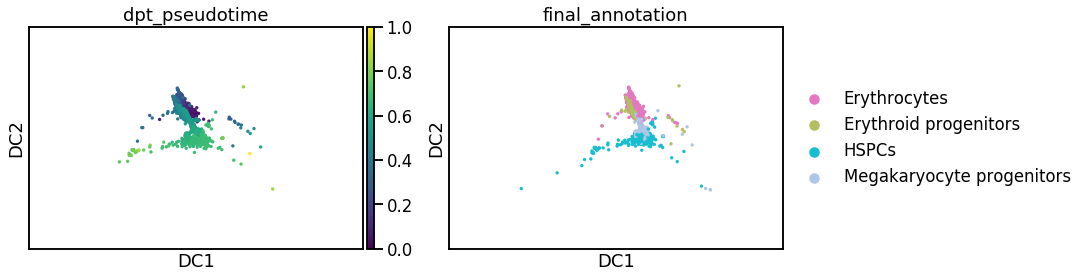

In [214]:
sc.pl.diffmap(adata_post_subset, color=['dpt_pseudotime', 'final_annotation'])

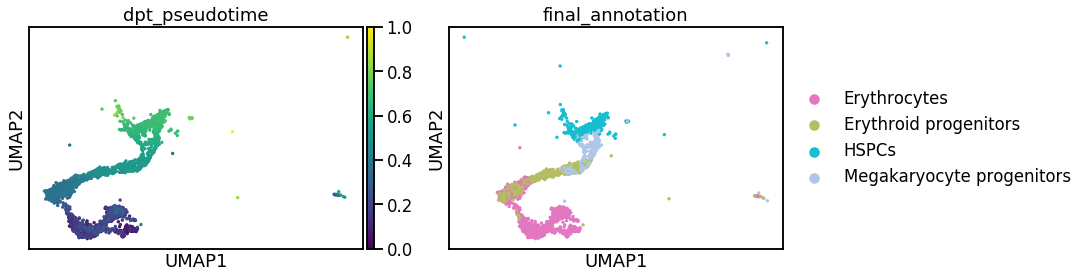

In [215]:
sc.pl.umap(adata_post_subset, color=['dpt_pseudotime', 'final_annotation'])

In [197]:
scIB.pp.reduce_data(adata_pre)
sc.tl.diffmap(adata_pre)

HVG
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Computed 2000 highly variable genes
PCA
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:06)
Nearest Neigbours
computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:11)
UMAP
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:46)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9999122  0.9997506  0.99888784 0.9985491
     0.9984735  0.9981988  0.99806386 0.99769807 0.99543893 0.99490744
     0.99444777 0.9943289  0.9933019 ]
    finished: ad

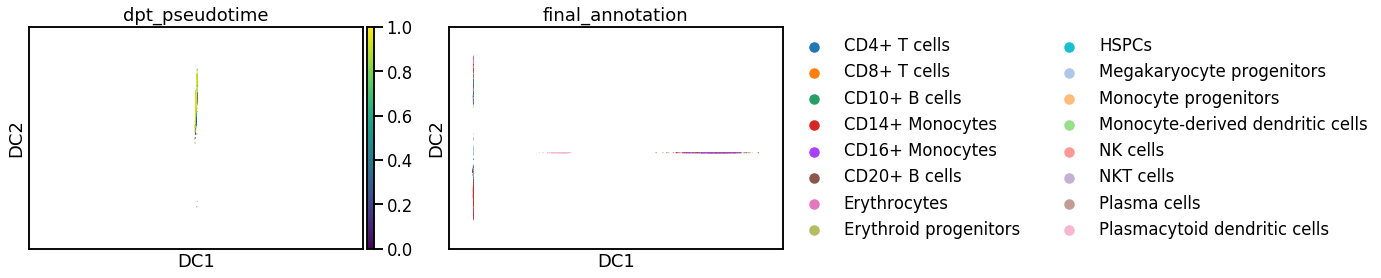

In [198]:
sc.pl.diffmap(adata_pre, color=['dpt_pseudotime', 'final_annotation'])